**Scraping rejest.io data**

https://github.com/Awersang/Housing_cooperatives.git

---

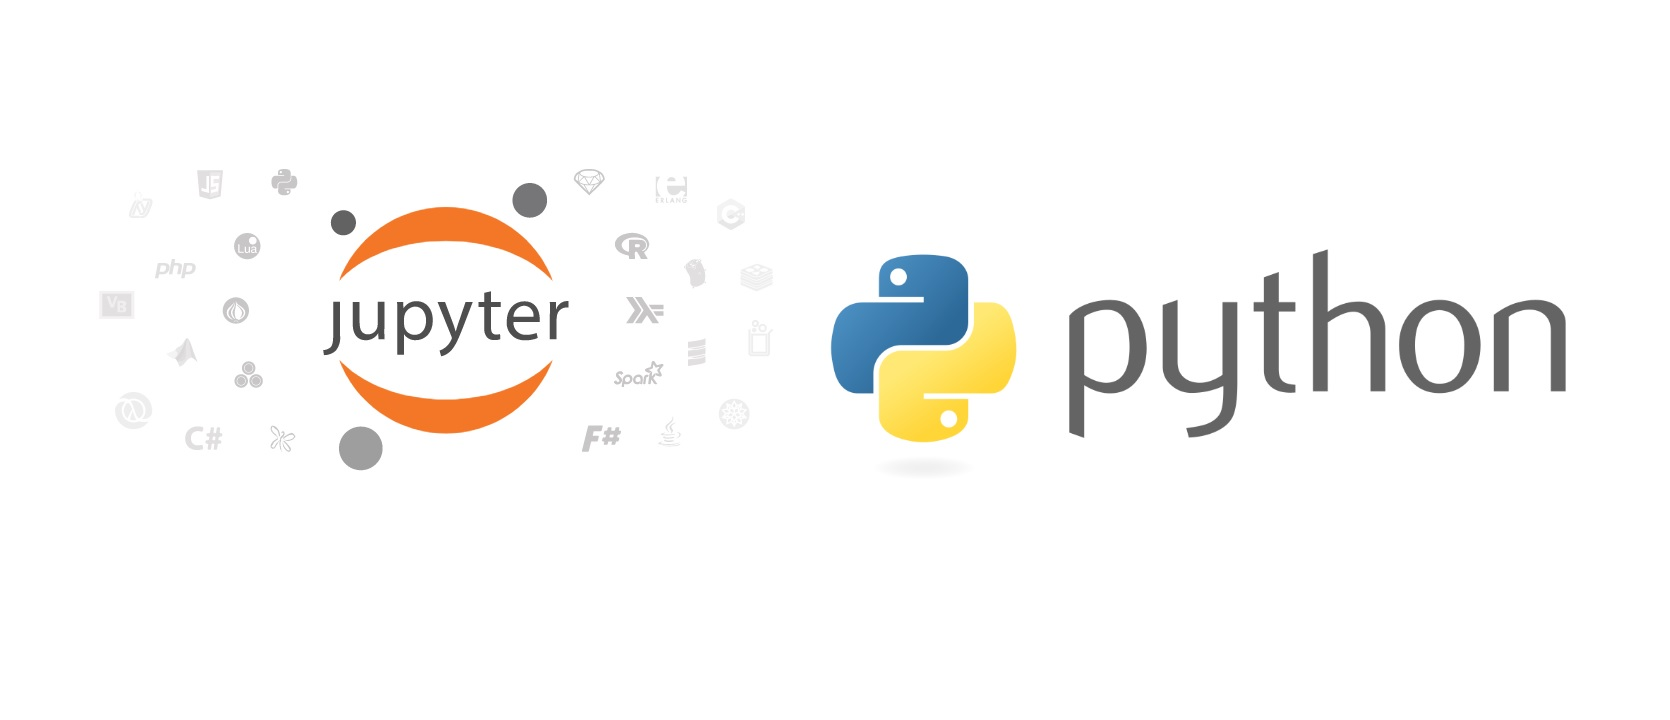

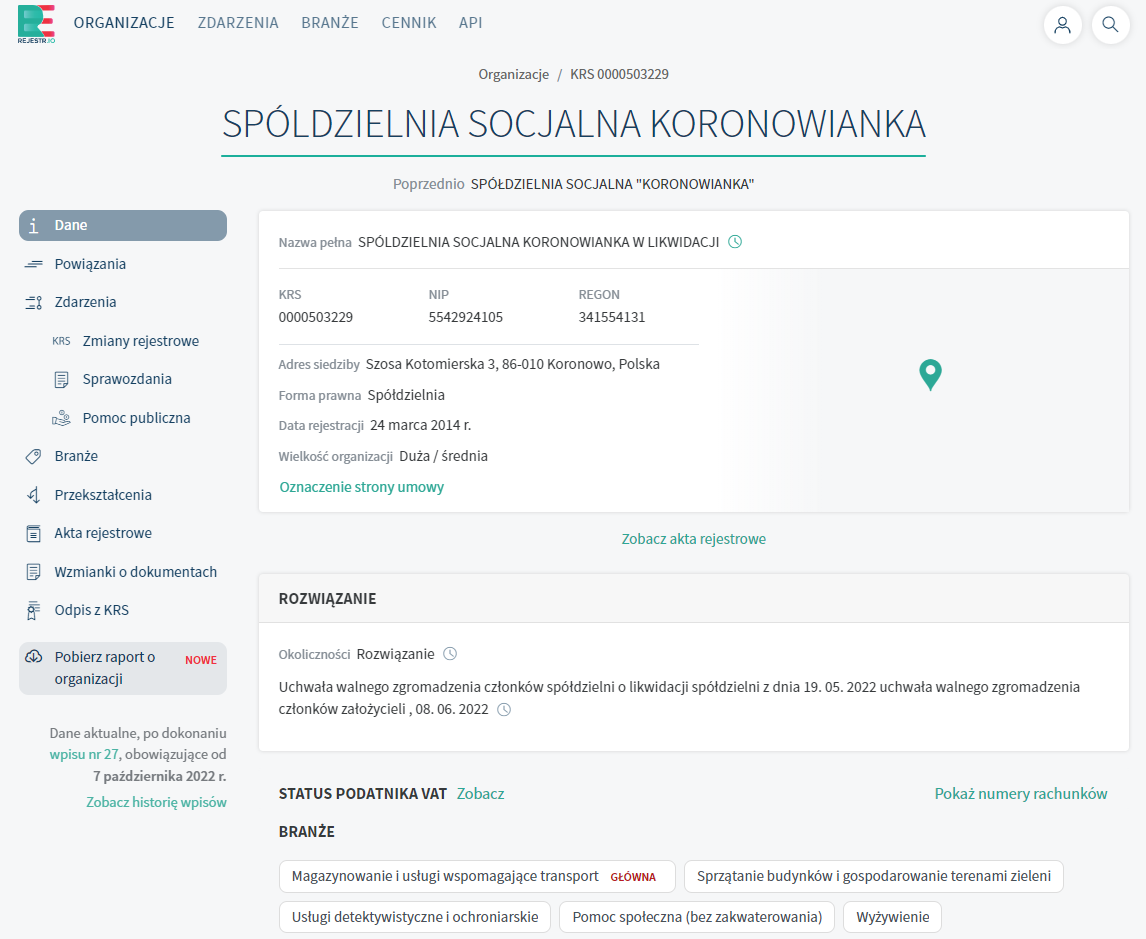

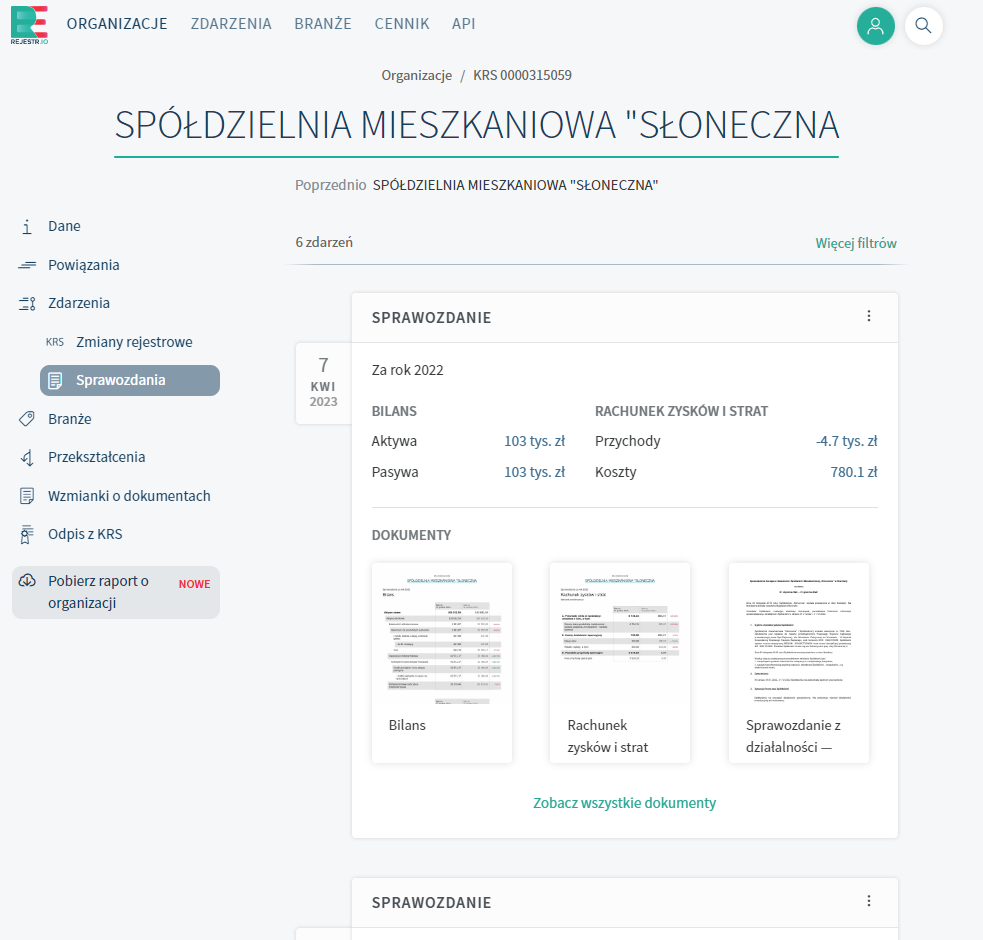

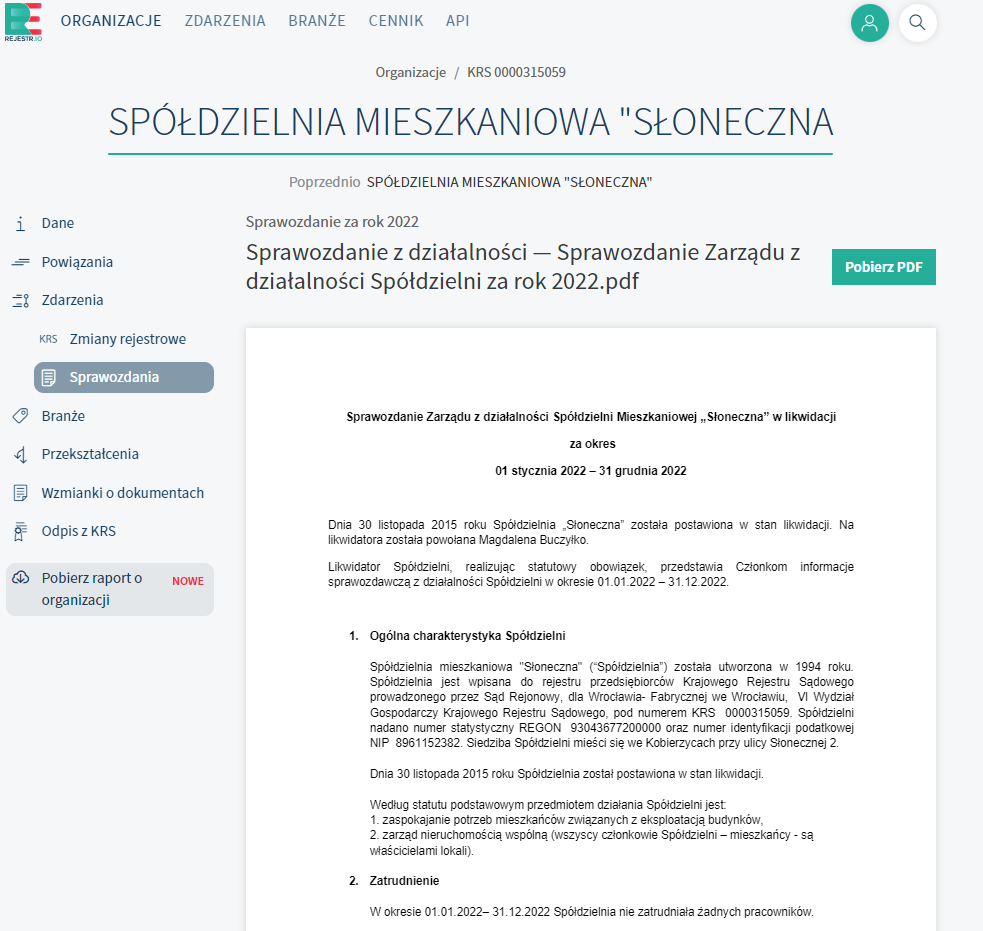

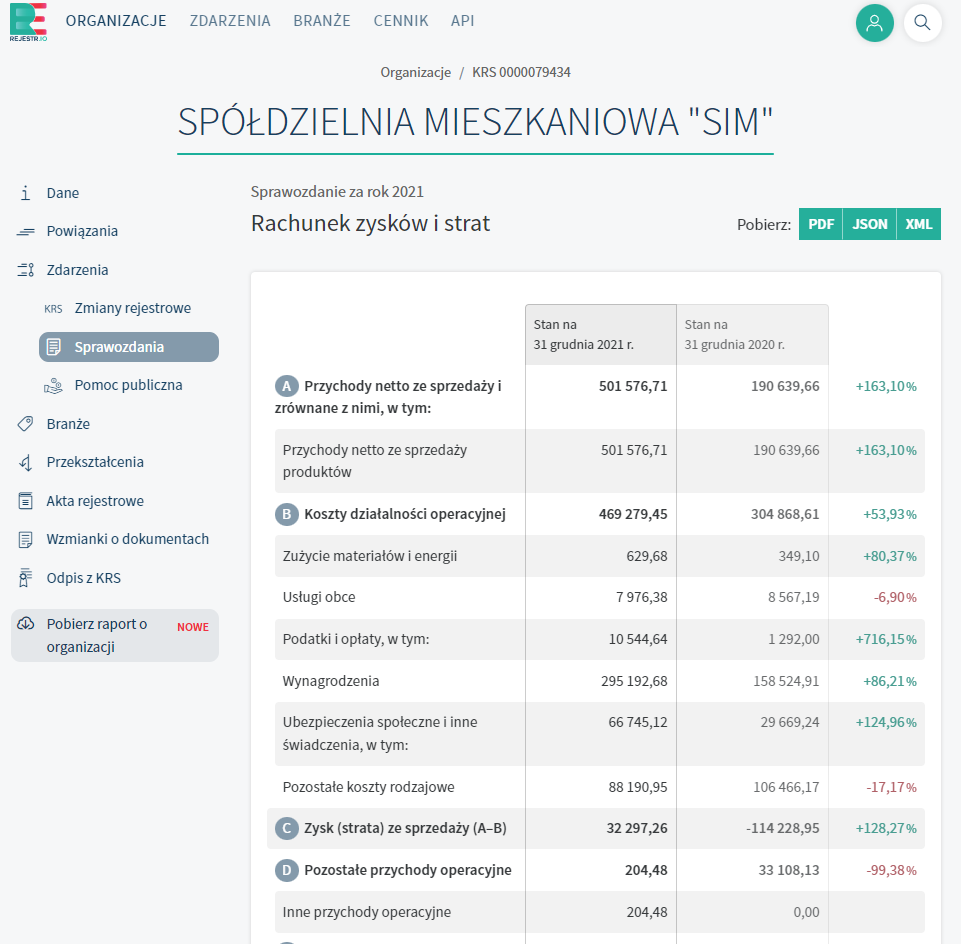

 Manual tools

In [11]:
api_key = 

url = 'https://rejestr.io/api/v2/org'
headers = {'Authorization' : api_key}
r = requests.get(url, headers=headers)

r = requests.get('https://rejestr.io/api/v2/org/0000503229', headers={'Authorization':'api_ke'})

# Libraries

In [1]:
import os
import pandas as pd
import requests
from requests import Session
from pprint import pprint as pp
import json
from glom import glom
import shutil # to copy files
import re #string comparison
from PIL import Image
import numpy as np
import pytesseract
from PyPDF2 import PdfReader
from pdf2image import convert_from_path
# from rapidfuzz import fuzz
import rapidfuzz as fuzz
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
import time
import math
import scipy

# Functions

In [10]:
def dispall(data):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    display(data)
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', 10)
    
def dispwide(data):
    
    pd.set_option('display.max_columns', None)
    display(data)
    pd.set_option('display.max_columns', 10)

def number_of_csv_files(dir):
    only_files = [f for f in os.listdir(dir) if f[-4:]=='.csv']
    return len(only_files)


def list_of_csv_files(dir):
    only_files = [dir + f for f in os.listdir(dir) if f[-4:]=='.csv']
    return only_files

def isNaN(num):
    return num != num

Tools

In [2]:
id = "0000503229"

In [164]:
class TC:
    def __init__(self,token,id):
        self.apiurl = 'https://rejestr.io/api/v2/org'
        self.headers = {'Authorization' : token}
        self.session = Session()
        self.session.headers.update(self.headers)
        
    def podstawowe_info(self):
        url = self.apiurl+"/"+id
        print(url)
        r = self.session.get(url, headers = self.headers)
        return r
    
tc=TC(api_key,id )

In [102]:
d = tc.podstawowe_info()

https://rejestr.io/api/v2/org/0000503229


# Searching for all cooperatives from the data set, retrieving basic information, saving paginated JSONs

wyniki prostego wyszukiwania

paginacja

pkd -  Polska Klasyfikacja Działalności

JSON - struktura drzewa

In [151]:
# Getting single page
pkd = 68
forma_prawna = 'SPÓŁDZIELNIA'
api_key = 

params_all_coop={'przewazajacy_pkd':'68', 'forma_prawna':forma_prawna,'ile_na_strone':10,'strona':1}

r = requests.get('https://rejestr.io/api/v2/org', headers={'Authorization':api_key}, params=params_all_coop)
pp(r.json())

{'liczba_wszystkich_wynikow': 3538,
 'wyniki': [{'adres': {'kod': '04-036',
                       'miejscowosc': 'Warszawa',
                       'nr_domu': '72',
                       'nr_mieszkania': 'Uż. 32',
                       'panstwo': 'Polska',
                       'poczta': 'Warszawa',
                       'teryt': {'gmina': '146501',
                                 'powiat': '1465',
                                 'wojewodztwo': '14'},
                       'ulica': 'Aleja Stanów Zjednoczonych'},
             'glowna_osoba': {'id': '2247855',
                              'imiona_i_nazwisko': 'Tomasz Piotr Marjański'},
             'id': 1006590,
             'krs_powiazania_liczby': {'aktualne': 6, 'przeszle': 0},
             'krs_rejestry': {'rejestr_przedsiebiorcow_data_wpisu': '2022-12-06'},
             'krs_wpisy': {'najnowszy_data': '2022-12-07',
                           'najnowszy_numer': 3,
                           'pierwszy_data': '2022-12-06'},
 

In [196]:
# loop over database save every page as separate file

for strona in range(0,37):
    print(strona)

    params_all_coop={'przewazajacy_pkd':'68', 'forma_prawna':forma_prawna,'ile_na_strone':100,'strona':strona}

    r_strona = requests.get('https://rejestr.io/api/v2/org', headers={'Authorization':api_key}, params=params_all_coop)
    # pp(r_strona.json())

    with open(f"Data from rejestr.io/Cooperatives_basic_data_{strona}.json", "w") as outfile:
        json.dump(r_strona.json(), outfile)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


# Adding misplaced cooperatives to as JSONs

In [50]:
# Loading misplaced cooperatives list
misplaced_file = pd.read_excel('NCN_spółdzielnie_poza_sekcja_L.xlsx')

misplaced_nip_list = misplaced_file.NIP.apply(lambda x: 'nip'+str(x))

In [55]:
print(misplaced_nip_list.to_markdown())

|     | NIP           |
|----:|:--------------|
|   0 | nip9110008763 |
|   1 | nip8751228044 |
|   2 | nip6710014138 |
|   3 | nip7171541261 |
|   4 | nip7431409306 |
|   5 | nip6991706571 |
|   6 | nip6650004218 |
|   7 | nip9512193691 |
|   8 | nip8551008378 |
|   9 | nip7391308294 |
|  10 | nip7642118072 |
|  11 | nip6750005861 |
|  12 | nip9461813183 |
|  13 | nip6730005964 |
|  14 | nip8861004340 |
|  15 | nip6111008976 |
|  16 | nip5250011102 |
|  17 | nip5932272219 |
|  18 | nip6711005584 |
|  19 | nip7712878180 |
|  20 | nip8610007654 |
|  21 | nip5650002495 |
|  22 | nip7431615247 |
|  23 | nip7711084756 |
|  24 | nip8882687947 |
|  25 | nip5651251728 |
|  26 | nip6721121369 |
|  27 | nip8411357104 |
|  28 | nip7761698779 |
|  29 | nip8272304617 |
|  30 | nip7743216267 |
|  31 | nip8272305054 |
|  32 | nip7761699218 |
|  33 | nip8272309626 |
|  34 | nip8781800276 |
|  35 | nip8540022446 |
|  36 | nip6990005435 |
|  37 | nip6751000127 |
|  38 | nip7971000957 |
|  39 | nip82617

In [29]:
# Retrieving basic info about misplaced cooperatives and saving is a JSONs
for nip in misplaced_nip_list:
    print(nip)
    misplaced_temp = requests.get('https://rejestr.io/api/v2/org/'+nip, headers={'Authorization':api_key})
    
    with open(f"Data from rejestr.io/Cooperatives basic data in pieces/Cooperatives_basic_data_misplaced_{nip}.json", "w") as outfile:
        json.dump(misplaced_temp.json(), outfile)

nip9110008763
nip8751228044
nip6710014138
nip7171541261
nip7431409306
nip6991706571
nip6650004218
nip9512193691
nip8551008378
nip7391308294
nip7642118072
nip6750005861
nip9461813183
nip6730005964
nip8861004340
nip6111008976
nip5250011102
nip5932272219
nip6711005584
nip7712878180
nip8610007654
nip5650002495
nip7431615247
nip7711084756
nip8882687947
nip5651251728
nip6721121369
nip8411357104
nip7761698779
nip8272304617
nip7743216267
nip8272305054
nip7761699218
nip8272309626
nip8781800276
nip8540022446
nip6990005435
nip6751000127
nip7971000957
nip8261756209
nip5272468145
nip5542929120
nip1230004580
nip6991166784
nip9451920109
nip7241000666
nip5782085360
nip5782597120
nip7740016668
nip1230486490
nip7371725586
nip7582370045
nip7781031506
nip8941551647
nip5262870495
nip5340001745
nip5250006934
nip8641634814
nip8230002308
nip6572920816
nip1130506715
nip9581250713
nip5841919253
nip5932169697
nip1131877129
nip5251570045
nip5252780425
nip5261709929
nip1130115972
nip8221917037
nip5252261843
nip526

# Basic data JSON to pd DataFrame

In [238]:
# Transform all JSON files to Panda DataFrame and join them together, save the resoults.

CoopData = pd.DataFrame()

for strona in range(1,37):
#     print(strona)

    with open(f"Data from rejestr.io/Cooperatives_basic_data_{strona}.json", "r") as f:
        data = json.loads(f.read())
        datapd = pd.json_normalize(data, record_path =['wyniki'])
#         display(datapd)
        CoopData = pd.concat([CoopData, datapd], ignore_index=True)

CoopData.to_csv('Data from rejestr.io/CoopData.csv', index=False)
# CoopData

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


id          typ adres.kod adres.miejscowosc adres.nr_domu  \
0     1006590  organizacja    04-036          Warszawa            72   
1      990360  organizacja    96-200             Niwna            48   
2      989448  organizacja    01-934          Warszawa            76   
3      958748  organizacja    02-695          Warszawa             4   
4      916521  organizacja    03-566          Warszawa            46   
...       ...          ...       ...               ...           ...   
3533     4296  organizacja    40-596          Katowice            2D   
3534     1779  organizacja    55-200             Oława            22   
3535     1777  organizacja    54-152           Wrocław            11   
3536     1711  organizacja    54-237           Wrocław            28   
3537     1292  organizacja    20-863            Lublin             5   

     adres.nr_mieszkania adres.panstwo     adres.poczta adres.teryt.gmina  \
0                 Uż. 32        Polska         Warszawa            146501   
1                    NaN        Polska  Rawa Mazowiecka            101304   
2                     17        Polska         Warszawa            146501   
3                    NaN        Polska         Warszawa            146501   
4                     46        Polska         Warszawa            146501   
...                  ...           ...              ...               ...   
3533                 NaN        Polska         Katowice            246901   
3534                 NaN        Polska            Oława            021501   
3535                 NaN        Polska          Wrocław            026401   
3536                 NaN        Polska          Wrocław            026401   
3537                 NaN        Polska           Lublin            066301   

     adres.teryt.powiat  ... stan.w_upadlosci stan.w_zawieszeniu  \
0                  1465  ...            False              False   
1                  1013  ...            False              False   
2                  1465  ...            False              False   
3                  1465  ...            False              False   
4                  1465  ...            False              False   
...                 ...  ...              ...                ...   
3533               2469  ...            False              False   
3534               0215  ...            False              False   
3535               0264  ...            False              False   
3536               0264  ...            False              False   
3537               0663  ...            False              False   

     stan.wielkosc                kontakt.www               kontakt.emaile  \
0              NaN                        NaN                          NaN   
1              NaN                        NaN                          NaN   
2              NaN                        NaN                          NaN   
3              NaN                        NaN                          NaN   
4              NaN                        NaN                          NaN   
...            ...                        ...                          ...   
3533  duza_srednia                        NaN                          NaN   
3534  duza_srednia                        NaN                          NaN   
3535           NaN                        NaN                          NaN   
3536  duza_srednia  https://www.smpopowice.pl  [sekretariat@smpopowice.pl]   
3537          mala                        NaN                          NaN   

      krs_rejestry.rejestr_przedsiebiorcow_data_wykreslenia  \
0                                                   NaN       
1                                                   NaN       
2                                                   NaN       
3                                                   NaN       
4                                                   NaN       
...                                                 ...       
3533                      

In [75]:
# Adding misplaced cooperatives to the DataFrame
MisplacedCoopData = pd.DataFrame()

for nip in  misplaced_nip_list:
#     print(strona)
    # print(nip)
    with open(f"Data from rejestr.io/Cooperatives basic data in pieces/Cooperatives_basic_data_misplaced_{nip}.json", "r") as f:
        data = json.loads(f.read())
        datapd = pd.json_normalize(data)
#         datapd = pd.read_json(data)
# #         datapd = pd.json_normalize(data, record_path =['wyniki'])
#         display(datapd)
    MisplacedCoopData = pd.concat([MisplacedCoopData, datapd], ignore_index=True)
#     display(MisplacedCoopData)
#     break
# removing missing data
MisplacedCoopData.dropna(inplace=True, axis=0,subset=['id'])
# Saving
MisplacedCoopData.to_csv('Data from rejestr.io/MisplacedCoopData.csv', index=False)

MisplacedCoopData

id          typ adres.kod adres.miejscowosc adres.nr_domu  ...  \
0     58871.0  organizacja    56-400         Boguszyce           118  ...   
1    156826.0  organizacja    86-260         Raciniewo             2  ...   
2    167475.0  organizacja    78-133          Drzonowo            60  ...   
3    538101.0  organizacja    24-204   Palikije Drugie           104  ...   
4    155044.0  organizacja    11-210     Dzietrzychowo            22  ...   
..        ...          ...       ...               ...           ...  ...   
173  194329.0  organizacja    83-041         Domachowo            15  ...   
174  165653.0  organizacja    00-769          Warszawa             2  ...   
175  153261.0  organizacja    75-363          Koszalin            5C  ...   
176  126635.0  organizacja    02-320          Warszawa            40  ...   
177  130991.0  organizacja    38-315         Gładyszów           113  ...   

    adres.nr_mieszkania kontakt.emaile kontakt.www kod info  
0                   NaN            NaN         NaN NaN  NaN  
1                   NaN            NaN         NaN NaN  NaN  
2                   NaN            NaN         NaN NaN  NaN  
3                   NaN            NaN         NaN NaN  NaN  
4                   NaN            NaN         NaN NaN  NaN  
..                  ...            ...         ...  ..  ...  
173                 NaN            NaN         NaN NaN  NaN  
174                 NaN            NaN         NaN NaN  NaN  
175                 NaN            NaN         NaN NaN  NaN  
176                 NaN            NaN         NaN NaN  NaN  
177                   7            NaN         NaN NaN  NaN  

[175 rows x 48 columns]

In [94]:
# Joining misplced coop data to the main coop data
CoopData = pd.read_csv('Data from rejestr.io/CoopData.csv')
MisplacedCoopData = pd.read_csv('Data from rejestr.io/MisplacedCoopData.csv')
CoopData = pd.concat([CoopData, MisplacedCoopData], ignore_index=True)
# changing id to int
CoopData['id'] = CoopData['id'].astype(int)
CoopData.to_csv('Data from rejestr.io/AllCoopData.csv', index=False)

In [150]:
AllCoopData = pd.read_csv('Data from rejestr.io/AllCoopData.csv')
AllCoopData = AllCoopData.drop_duplicates('id')
AllCoopData.to_csv('Data from rejestr.io/AllCoopData.csv', index=False)

In [2]:
AllCoopData = pd.read_csv('Data from rejestr.io/AllCoopData.csv')
AllCoopData

id          typ adres.kod adres.miejscowosc adres.nr_domu   
0     1006590  organizacja    04-036          Warszawa            72  \
1      990360  organizacja    96-200             Niwna            48   
2      989448  organizacja    01-934          Warszawa            76   
3      958748  organizacja    02-695          Warszawa             4   
4      916521  organizacja    03-566          Warszawa            46   
...       ...          ...       ...               ...           ...   
3706   194329  organizacja    83-041         Domachowo            15   
3707   165653  organizacja    00-769          Warszawa             2   
3708   153261  organizacja    75-363          Koszalin            5C   
3709   126635  organizacja    02-320          Warszawa            40   
3710   130991  organizacja    38-315         Gładyszów           113   

     adres.nr_mieszkania adres.panstwo     adres.poczta  adres.teryt.gmina   
0                 Uż. 32        Polska         Warszawa           146501.0  \
1                    NaN        Polska  Rawa Mazowiecka           101304.0   
2                     17        Polska         Warszawa           146501.0   
3                    NaN        Polska         Warszawa           146501.0   
4                     46        Polska         Warszawa           146501.0   
...                  ...           ...              ...                ...   
3706                 NaN        Polska       Mierzeszyn           220408.0   
3707                 NaN        Polska         Warszawa           146501.0   
3708                 NaN        Polska         Koszalin           326101.0   
3709                 NaN        Polska         Warszawa                NaN   
3710                   7        Polska  Uście Gorlickie           120510.0   

      adres.teryt.powiat  ...  kontakt.www kontakt.emaile   
0                 1465.0  ...          NaN            NaN  \
1                 1013.0  ...          NaN            NaN   
2                 1465.0  ...          NaN            NaN   
3                 1465.0  ...          NaN            NaN   
4                 1465.0  ...          NaN            NaN   
...                  ...  ...          ...            ...   
3706              2204.0  ...          NaN            NaN   
3707              1465.0  ...          NaN            NaN   
3708              3261.0  ...          NaN            NaN   
3709                 NaN  ...          NaN            NaN   
3710              1205.0  ...          NaN            NaN   

      krs_rejestry.rejestr_przedsiebiorcow_data_wykreslenia   
0                                                   NaN      \
1                                                   NaN       
2                                                   NaN       
3                                                   NaN       
4                                                   NaN       
...                                                 ...       
3706                                                NaN       
3707                                                NaN       
3708                                                NaN       
3709                                                NaN       
3710                                                NaN       

     krs_wpisy.najnowszy_przed_wykresleniem_data   
0                                            NaN  \
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
3706                                         NaN   
3707                                         NaN   
3708                                         NaN   
3709                                         NaN   
3710                                         NaN   

      krs_wpisy.najnowszy_przed_wykresleniem_numer   
0                                       

# Advanced information

In [4]:
id='0000644401'

basiec_url='https://rejestr.io/api/v2/org/'

# 'krs-rozdzialy/'

# ogolny
# oddzialy
# finanse
# zobowiazania
# przeksztalcenia


target_url = basiec_url+id+'/krs-rozdzialy/'+'finanse'
print(target_url)
r_ai = requests.get(target_url,headers={'Authorization':api_key})
pp(r_ai.json())

https://rejestr.io/api/v2/org/0000644401/krs-rozdzialy/finanse
{'dokumenty_wzmianka_o_zlozeniu_rocznego_sprawozdania_finansowego': {'_obiekty': {'1': {'_wartosc': {'data': '05.12.2018',
                                                                                                     'okres': 'Od '
                                                                                                              '01. '
                                                                                                              '01. '
                                                                                                              '2017 '
                                                                                                              'do '
                                                                                                              '31. '
                                                                                                              '12

# Financial documents lists, one off

zapytanie o listę dokumentów

ale nazwy nie sa oczywiste

In [409]:
# https://rejestr.io/api/v2/org/{id}/krs-dokumenty/{doc_id}    
r_ai = requests.get('https://rejestr.io/api/v2/org/0000644401/krs-dokumenty', headers={'Authorization':api_key})
r_ai.json()

[{'data_start': '2018-01-01',
  'data_koniec': '2018-12-31',
  'dokumenty': [{'czy_ma_json': True, 'id': 2824437, 'nazwa': 'Bilans'},
   {'czy_ma_json': True, 'id': 2824438, 'nazwa': 'Rachunek zysków i strat'},
   {'czy_ma_json': False,
    'id': 2824283,
    'nazwa': 'Braci-Zaluskich-11-informacja-dodatkowa-spr2018.pdf'}]},
 {'data_start': '2017-01-01',
  'data_koniec': '2017-12-31',
  'dokumenty': [{'czy_ma_json': False,
    'id': 2824284,
    'nazwa': 'Bilans — Bilans na dzień 31.12.2017 SM Przy Sadach.pdf'},
   {'czy_ma_json': False,
    'id': 2824286,
    'nazwa': 'Rachunek zysków i strat — Rachunek Zysków i Strat na dzień 31.12.2018 SM Przy Sadach.pdf'},
   {'czy_ma_json': False,
    'id': 2824290,
    'nazwa': 'Sprawozdanie z działalności — Uchwała w sprawie sprawozdania Zarządu na 31.12.2017.pdf'},
   {'czy_ma_json': False,
    'id': 2824288,
    'nazwa': 'Informacja dodatkowa — Informacja dodatkowa do sprawozdania finansowego na dzień 31.12.2018 SM Przy Sadach.pdf'},
   {'czy_

In [122]:
# save json data to the file
with open("sample.json", "w") as outfile:
    json.dump(r_ai.json(), outfile)

In [344]:
# load json file
with open('sample.json','r') as dat:
    findoc = json.load(dat)

In [345]:
findoc

[{'data_start': '2018-01-01',
  'data_koniec': '2018-12-31',
  'dokumenty': [{'czy_ma_json': True, 'id': 2824437, 'nazwa': 'Bilans'},
   {'czy_ma_json': True, 'id': 2824438, 'nazwa': 'Rachunek zysków i strat'},
   {'czy_ma_json': False,
    'id': 2824283,
    'nazwa': 'Braci-Zaluskich-11-informacja-dodatkowa-spr2018.pdf'}]},
 {'data_start': '2017-01-01',
  'data_koniec': '2017-12-31',
  'dokumenty': [{'czy_ma_json': False,
    'id': 2824284,
    'nazwa': 'Bilans — Bilans na dzień 31.12.2017 SM Przy Sadach.pdf'},
   {'czy_ma_json': False,
    'id': 2824286,
    'nazwa': 'Rachunek zysków i strat — Rachunek Zysków i Strat na dzień 31.12.2018 SM Przy Sadach.pdf'},
   {'czy_ma_json': False,
    'id': 2824290,
    'nazwa': 'Sprawozdanie z działalności — Uchwała w sprawie sprawozdania Zarządu na 31.12.2017.pdf'},
   {'czy_ma_json': False,
    'id': 2824288,
    'nazwa': 'Informacja dodatkowa — Informacja dodatkowa do sprawozdania finansowego na dzień 31.12.2018 SM Przy Sadach.pdf'},
   {'czy_

Retrieving doc ID

In [346]:
display(pd.json_normalize(findoc))

# Normalised FinData
findocdf = pd.json_normalize(findoc, record_path =['dokumenty'], meta=['data_start', 'data_koniec'])
findocdf

data_start data_koniec                                          dokumenty
0  2018-01-01  2018-12-31  [{'czy_ma_json': True, 'id': 2824437, 'nazwa':...
1  2017-01-01  2017-12-31  [{'czy_ma_json': False, 'id': 2824284, 'nazwa'...

czy_ma_json       id                                              nazwa  \
0         True  2824437                                             Bilans   
1         True  2824438                            Rachunek zysków i strat   
2        False  2824283  Braci-Zaluskich-11-informacja-dodatkowa-spr201...   
3        False  2824284  Bilans — Bilans na dzień 31.12.2017 SM Przy Sa...   
4        False  2824286  Rachunek zysków i strat — Rachunek Zysków i St...   
5        False  2824290  Sprawozdanie z działalności — Uchwała w sprawi...   
6        False  2824288  Informacja dodatkowa — Informacja dodatkowa do...   
7        False  2824291  Uchwała o podziale zysku bądź pokryciu straty ...   
8        False  2824294  Uchwała lub postanowienie o zatwierdzeniu rocz...   

   data_start data_koniec  
0  2018-01-01  2018-12-31  
1  2018-01-01  2018-12-31  
2  2018-01-01  2018-12-31  
3  2017-01-01  2017-12-31  
4  2017-01-01  2017-12-31  
5  2017-01-01  2017-12-31  
6  2017-01-01  2017-12-31  
7  2017-01-01  2017-12-31  
8  2017-01-01  2017-12-31

# Financial documents lists, ALL

In [5]:
AllCoopData = pd.read_csv('Data from rejestr.io/AllCoopData.csv')
ids = AllCoopData['id'].iloc[::-1]
ids

3712     130991
3711     126635
3710     153261
3709     165653
3708     194329
         ...   
4        916521
3        958748
2        989448
1        990360
0       1006590
Name: id, Length: 3713, dtype: int64

In [ ]:
FinDocList_temp = pd.DataFrame()

counter=0
file_counter=0

for i in ids: # request doc list for evry cooperative
    counter+=1
    # print(i)
    fdl = requests.get(f'https://rejestr.io/api/v2/org/{i}/krsprintumenty', headers={'Authorization':api_key})
    try:
        # print(fdl.json())
        findocdf = pd.json_normalize(fdl.json(), record_path =['dokumenty'], meta=['data_start', 'data_koniec'])
        findocdf.rename(columns={'id':'doc_id'}, inplace=True)
        findocdf['id']=i
        FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)
        print(i,end=' ')
        # print(counter)
    except:
        print('No documents')
    
    if counter % 5 == 0 or counter==len(ids): #save file every X-th cooperative or at the end
        file_counter+=1
        print(f'\nsaving file, last id:{i}, index:{counter}, file:{file_counter}')
        FinDocList_temp.to_csv(f'Data from rejestr.io/Cooperatives financial documents list/FinDocList{file_counter}.csv', index=False)
        FinDocList_temp = pd.DataFrame()
    # Breaker for testing
    # if counter == 15:
    #     break

# FinDocList.to_csv('Data from rejestr.io/FinDocList.csv', index=False)
# FinDocList

130991 126635 153261 165653 194329 
saving file, last id:194329, index:5, file:1
201697 696164 313018 590600 599570 
saving file, last id:599570, index:10, file:2
201691 103775 150269 173277 130823 
saving file, last id:130823, index:15, file:3
233858 168777 656469 189665 39687 
saving file, last id:39687, index:20, file:4
470437 155397 583362 207342 156107 
saving file, last id:156107, index:25, file:5
103173 144973 251705 11060 206201 
saving file, last id:206201, index:30, file:6
93725 169832 236302 154722 174445 
saving file, last id:174445, index:35, file:7
115334 87285 64549 291202 559706 
saving file, last id:559706, index:40, file:8
310465 589445 162351 183199 138188 
saving file, last id:138188, index:45, file:9
173397 596023 153440 64908 133876 
saving file, last id:133876, index:50, file:10
28909 44010 277714 556850 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


87027 
saving file, last id:87027, index:55, file:11
102503 220115 148820 86464 179802 
saving file, last id:179802, index:60, file:12
26607 78998 223392 389373 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


225031 
saving file, last id:225031, index:65, file:13
9513 268841 814532 231473 156734 
saving file, last id:156734, index:70, file:14
156648 131577 295511 179466 192406 
saving file, last id:192406, index:75, file:15
23630 90721 110236 49767 169051 
saving file, last id:169051, index:80, file:16
91005 794962 114759 123172 40086 
saving file, last id:40086, index:85, file:17
177483 422315 799404 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


147970 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


231030 
saving file, last id:231030, index:90, file:18
51083 110641 417340 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


92715 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


26607 
saving file, last id:26607, index:95, file:19
112068 383690 113091 140160 68380 
saving file, last id:68380, index:100, file:20
38688 188459 136307 610075 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


840145 
saving file, last id:840145, index:105, file:21
140777 121880 113021 143704 188534 
saving file, last id:188534, index:110, file:22
771170 126396 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


198184 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


152903 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


60004 
saving file, last id:60004, index:115, file:23
609231 591049 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


107426 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


186701 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


248035 
saving file, last id:248035, index:120, file:24
174280 234840 259837 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


71520 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


198663 
saving file, last id:198663, index:125, file:25
77620 189382 112076 198234 136491 
saving file, last id:136491, index:130, file:26
147130 149744 164000 53928 552798 
saving file, last id:552798, index:135, file:27
232320 187601 178168 102838 67526 
saving file, last id:67526, index:140, file:28
187528 584824 612676 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


473393 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


472322 
saving file, last id:472322, index:145, file:29
470449 452906 448226 378172 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


297143 
saving file, last id:297143, index:150, file:30
56405 147587 187049 186228 200794 
saving file, last id:200794, index:155, file:31
472132 131348 63744 79647 133350 
saving file, last id:133350, index:160, file:32
69409 49173 146810 151016 241958 
saving file, last id:241958, index:165, file:33
328151 526456 263739 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


196937 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


151043 
saving file, last id:151043, index:170, file:34
155044 538101 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


167475 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


156826 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


58871 
saving file, last id:58871, index:175, file:35
1292 1711 1777 1779 4296 
saving file, last id:4296, index:180, file:36
4518 4783 5231 5346 5530 
saving file, last id:5530, index:185, file:37
5774 5864 5994 6022 6346 
saving file, last id:6346, index:190, file:38
6811 6969 7056 7387 7463 
saving file, last id:7463, index:195, file:39
7726 8029 8032 8041 8645 
saving file, last id:8645, index:200, file:40
8684 8954 9082 9133 9164 
saving file, last id:9164, index:205, file:41
9377 10033 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


10235 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


10365 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


10798 
saving file, last id:10798, index:210, file:42
10839 11091 11330 11347 11375 
saving file, last id:11375, index:215, file:43
11455 11731 11811 11826 12299 
saving file, last id:12299, index:220, file:44
12860 12927 13073 13091 13373 
saving file, last id:13373, index:225, file:45
14304 14606 14693 15294 15329 
saving file, last id:15329, index:230, file:46
15990 16198 16647 16725 16736 
saving file, last id:16736, index:235, file:47
17140 17250 17484 17795 17915 
saving file, last id:17915, index:240, file:48
18178 18690 19519 19891 20100 
saving file, last id:20100, index:245, file:49
20103 20307 20460 20535 20699 
saving file, last id:20699, index:250, file:50
20800 20890 21152 21185 21320 
saving file, last id:21320, index:255, file:51
21735 22569 23171 23244 23347 
saving file, last id:23347, index:260, file:52
23352 23417 23882 23957 24160 
saving file, last id:24160, index:265, file:53
24169 24196 24309 24328 24461 
saving file, last id:24461, index:270, file:54
24495 2454

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


39401 
saving file, last id:39401, index:355, file:71
39464 39504 39592 39909 40200 
saving file, last id:40200, index:360, file:72
40471 40535 40914 40932 41402 
saving file, last id:41402, index:365, file:73
41517 41636 41671 41698 41710 
saving file, last id:41710, index:370, file:74
41729 41813 41859 41896 41916 
saving file, last id:41916, index:375, file:75
42525 43183 43240 43668 43688 
saving file, last id:43688, index:380, file:76
43698 43702 43769 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


43774 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


43857 
saving file, last id:43857, index:385, file:77
43898 43991 44254 44320 44370 
saving file, last id:44370, index:390, file:78
44411 44428 44492 44729 44956 
saving file, last id:44956, index:395, file:79
45081 45581 45639 45720 45803 
saving file, last id:45803, index:400, file:80
45844 46051 46231 46738 46788 
saving file, last id:46788, index:405, file:81
46815 46836 46957 47045 47079 
saving file, last id:47079, index:410, file:82
47129 47186 47340 47382 47439 
saving file, last id:47439, index:415, file:83
47473 47548 47678 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


47707 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


47740 
saving file, last id:47740, index:420, file:84
47862 47948 48035 48100 48288 
saving file, last id:48288, index:425, file:85
48348 48470 48594 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


48629 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


48636 
saving file, last id:48636, index:430, file:86
48813 48956 48980 49009 49037 
saving file, last id:49037, index:435, file:87
49242 49440 49664 49762 49814 
saving file, last id:49814, index:440, file:88
50013 50080 50128 50201 50211 
saving file, last id:50211, index:445, file:89
50255 50313 50448 50490 50635 
saving file, last id:50635, index:450, file:90
50671 50845 51054 51248 51263 
saving file, last id:51263, index:455, file:91
51281 51542 51619 51624 51712 
saving file, last id:51712, index:460, file:92
51820 51927 52040 52047 52232 
saving file, last id:52232, index:465, file:93
52446 52511 52524 52529 52618 
saving file, last id:52618, index:470, file:94
52628 52681 52721 52912 52914 
saving file, last id:52914, index:475, file:95
52958 52988 53046 53056 53107 
saving file, last id:53107, index:480, file:96
53555 53640 53738 53884 53903 
saving file, last id:53903, index:485, file:97
54191 54272 54342 54371 54521 
saving file, last id:54521, index:490, file:98
55027 5513

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


55965 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


56000 
saving file, last id:56000, index:500, file:100
56158 56223 56254 56262 56280 
saving file, last id:56280, index:505, file:101
56285 56304 56475 56514 56744 
saving file, last id:56744, index:510, file:102
56888 57092 57121 57287 57411 
saving file, last id:57411, index:515, file:103
57453 57461 57465 57540 57697 
saving file, last id:57697, index:520, file:104
57901 57937 58088 58112 58618 
saving file, last id:58618, index:525, file:105
58621 58758 58783 58812 58856 
saving file, last id:58856, index:530, file:106
59028 59107 59135 59138 59153 
saving file, last id:59153, index:535, file:107
59421 59564 59595 59610 59654 
saving file, last id:59654, index:540, file:108
59746 59936 59945 60057 60176 
saving file, last id:60176, index:545, file:109
60624 60625 60686 60689 60810 
saving file, last id:60810, index:550, file:110
60817 60864 60866 60895 60916 
saving file, last id:60916, index:555, file:111
60933 60947 61085 61104 61327 
saving file, last id:61327, index:560, file:1

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


62441 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


62455 
saving file, last id:62455, index:575, file:115
62550 62555 62596 62621 62852 
saving file, last id:62852, index:580, file:116
62857 63020 63049 63091 63227 
saving file, last id:63227, index:585, file:117
63285 63350 63489 63500 63550 
saving file, last id:63550, index:590, file:118
63561 63568 63625 63956 64267 
saving file, last id:64267, index:595, file:119
64335 64406 64540 64658 64685 
saving file, last id:64685, index:600, file:120
64799 64854 65289 65319 65331 
saving file, last id:65331, index:605, file:121
65344 65425 65632 65843 65898 
saving file, last id:65898, index:610, file:122
65904 65997 66097 66138 66206 
saving file, last id:66206, index:615, file:123
66293 66519 66698 66718 66991 
saving file, last id:66991, index:620, file:124
67027 67054 67289 67541 67848 
saving file, last id:67848, index:625, file:125
67942 68020 68175 68369 68445 
saving file, last id:68445, index:630, file:126
68478 68619 68975 69208 69312 
saving file, last id:69312, index:635, file:1

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


70833 
saving file, last id:70833, index:650, file:130
70922 70952 71135 71558 71678 
saving file, last id:71678, index:655, file:131
71793 71821 71895 71899 71910 
saving file, last id:71910, index:660, file:132
72345 72466 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


72723 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


72770 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


72785 
saving file, last id:72785, index:665, file:133
73064 73149 73177 73222 73265 
saving file, last id:73265, index:670, file:134
73408 73417 73442 73485 73532 
saving file, last id:73532, index:675, file:135
73542 73693 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


73725 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


73969 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


73971 
saving file, last id:73971, index:680, file:136
74014 74134 74203 74476 74605 
saving file, last id:74605, index:685, file:137
74636 74655 74846 74874 74887 
saving file, last id:74887, index:690, file:138
74918 75168 75206 75229 75266 
saving file, last id:75266, index:695, file:139
75412 75529 75558 75597 75645 
saving file, last id:75645, index:700, file:140
75678 76160 76168 76229 76338 
saving file, last id:76338, index:705, file:141
76413 76535 76573 76577 76785 
saving file, last id:76785, index:710, file:142
76840 76980 77002 77006 77115 
saving file, last id:77115, index:715, file:143
77383 77427 77573 77893 77941 
saving file, last id:77941, index:720, file:144
78123 78251 78259 78319 78357 
saving file, last id:78357, index:725, file:145
78433 78513 78521 78773 79069 
saving file, last id:79069, index:730, file:146
79086 79298 79333 79505 79616 
saving file, last id:79616, index:735, file:147
79632 79638 79817 80152 80534 
saving file, last id:80534, index:740, file:1

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


82853 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


82939 
saving file, last id:82939, index:765, file:153
82980 83441 83494 83515 83518 
saving file, last id:83518, index:770, file:154
83614 83780 83946 83985 84022 
saving file, last id:84022, index:775, file:155
84088 84267 84325 84384 84584 
saving file, last id:84584, index:780, file:156
84632 85072 85177 85204 85212 
saving file, last id:85212, index:785, file:157
85428 85641 85880 85896 86089 
saving file, last id:86089, index:790, file:158
86275 86299 86422 86445 86494 
saving file, last id:86494, index:795, file:159
86562 86661 86813 86839 87235 
saving file, last id:87235, index:800, file:160
87307 87362 87700 87904 87932 
saving file, last id:87932, index:805, file:161
88003 88154 88207 88367 88531 
saving file, last id:88531, index:810, file:162
88562 88696 88718 88869 89055 
saving file, last id:89055, index:815, file:163
89086 89101 89122 89134 89167 
saving file, last id:89167, index:820, file:164
89612 89655 89716 89752 89975 
saving file, last id:89975, index:825, file:1

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


99821 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


99837 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


99862 
saving file, last id:99862, index:930, file:186
99929 99973 100048 100075 100309 
saving file, last id:100309, index:935, file:187
100364 100422 101120 101163 101371 
saving file, last id:101371, index:940, file:188
101469 101636 101763 101859 101911 
saving file, last id:101911, index:945, file:189
102054 102474 102704 102705 102709 
saving file, last id:102709, index:950, file:190
102835 102858 102920 102922 102970 
saving file, last id:102970, index:955, file:191
103039 103147 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


103366 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


103440 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


103515 
saving file, last id:103515, index:960, file:192
103556 103561 103884 104012 104070 
saving file, last id:104070, index:965, file:193
104155 104183 104186 104315 104373 
saving file, last id:104373, index:970, file:194
104426 104479 104506 104714 104895 
saving file, last id:104895, index:975, file:195
104960 105272 105336 105418 105457 
saving file, last id:105457, index:980, file:196
105534 105591 105603 105688 105796 
saving file, last id:105796, index:985, file:197
105810 105831 106230 106260 106408 
saving file, last id:106408, index:990, file:198
106435 106453 106558 106787 106794 
saving file, last id:106794, index:995, file:199
107001 107045 107113 107213 107318 
saving file, last id:107318, index:1000, file:200
107332 107552 107556 107578 107627 
saving file, last id:107627, index:1005, file:201
107770 107784 107790 107812 107841 
saving file, last id:107841, index:1010, file:202
107886 107899 107918 107929 107963 
saving file, last id:107963, index:1015, file:203
1079

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


114177 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


114194 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


114224 
saving file, last id:114224, index:1090, file:218
114248 114376 114391 114438 114469 
saving file, last id:114469, index:1095, file:219
114530 114581 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


114687 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


114808 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


114889 
saving file, last id:114889, index:1100, file:220
115107 115183 115230 115251 115258 
saving file, last id:115258, index:1105, file:221
115266 115446 115459 115486 115623 
saving file, last id:115623, index:1110, file:222
115626 115660 115755 115808 115877 
saving file, last id:115877, index:1115, file:223
115924 115930 116041 116303 116479 
saving file, last id:116479, index:1120, file:224
116566 116652 116705 116782 116913 
saving file, last id:116913, index:1125, file:225
116950 117078 117114 117137 117149 
saving file, last id:117149, index:1130, file:226
117170 117239 117433 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


117449 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


117544 
saving file, last id:117544, index:1135, file:227
117578 117620 117672 117828 117873 
saving file, last id:117873, index:1140, file:228
117877 118001 118122 118181 118183 
saving file, last id:118183, index:1145, file:229
118199 118200 118276 118285 118500 
saving file, last id:118500, index:1150, file:230
118531 118934 118945 119084 119107 
saving file, last id:119107, index:1155, file:231
119215 119264 119324 119325 119365 
saving file, last id:119365, index:1160, file:232
119395 119396 119438 119513 119614 
saving file, last id:119614, index:1165, file:233
119658 119694 119793 119858 119878 
saving file, last id:119878, index:1170, file:234
119886 120163 120209 120216 120393 
saving file, last id:120393, index:1175, file:235
120454 120542 120549 120644 120703 
saving file, last id:120703, index:1180, file:236
120770 120779 120781 120798 120882 
saving file, last id:120882, index:1185, file:237
120934 121012 121120 121334 121369 
saving file, last id:121369, index:1190, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


122950 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


122975 
saving file, last id:122975, index:1225, file:245
123006 123175 123187 123220 123289 
saving file, last id:123289, index:1230, file:246
123370 123418 123463 123558 123618 
saving file, last id:123618, index:1235, file:247
123633 123680 123849 123942 123984 
saving file, last id:123984, index:1240, file:248
123987 124006 124070 124308 124334 
saving file, last id:124334, index:1245, file:249
124361 124370 124378 124427 124448 
saving file, last id:124448, index:1250, file:250
124452 124487 124502 124518 124528 
saving file, last id:124528, index:1255, file:251
124542 124579 124630 124643 124648 
saving file, last id:124648, index:1260, file:252
124753 124767 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


124807 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


124843 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


124894 
saving file, last id:124894, index:1265, file:253
125033 125035 125168 125169 125278 
saving file, last id:125278, index:1270, file:254
125394 125406 125542 125693 125721 
saving file, last id:125721, index:1275, file:255
125724 125752 125795 125887 125912 
saving file, last id:125912, index:1280, file:256
125920 125928 125946 126004 126039 
saving file, last id:126039, index:1285, file:257
126203 126251 126383 126384 126385 
saving file, last id:126385, index:1290, file:258
126389 126426 126507 126579 126626 
saving file, last id:126626, index:1295, file:259
126684 126691 126738 126781 126809 
saving file, last id:126809, index:1300, file:260
126901 126979 127144 127188 127229 
saving file, last id:127229, index:1305, file:261
127240 127241 127243 127253 127262 
saving file, last id:127262, index:1310, file:262
127302 127319 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


127330 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


127358 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


127386 
saving file, last id:127386, index:1315, file:263
127430 127466 127499 127591 127685 
saving file, last id:127685, index:1320, file:264
127742 127786 127829 127841 127851 
saving file, last id:127851, index:1325, file:265
127874 127887 127959 128003 128119 
saving file, last id:128119, index:1330, file:266
128134 128282 128399 128445 128508 
saving file, last id:128508, index:1335, file:267
128528 128536 128602 128623 128688 
saving file, last id:128688, index:1340, file:268
128728 128973 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


129001 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


129052 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


129056 
saving file, last id:129056, index:1345, file:269
129116 129267 129343 129434 129435 
saving file, last id:129435, index:1350, file:270
129489 129504 129521 129553 129554 
saving file, last id:129554, index:1355, file:271
129559 129571 129596 129600 129640 
saving file, last id:129640, index:1360, file:272
129763 129831 129840 129866 129890 
saving file, last id:129890, index:1365, file:273
129945 130128 130132 130136 130232 
saving file, last id:130232, index:1370, file:274
130254 130259 130261 130281 130288 
saving file, last id:130288, index:1375, file:275
130308 130327 130340 130352 130372 
saving file, last id:130372, index:1380, file:276
130380 130440 130479 130503 130596 
saving file, last id:130596, index:1385, file:277
130630 130767 130859 130869 130908 
saving file, last id:130908, index:1390, file:278
131018 131173 131267 131271 131359 
saving file, last id:131359, index:1395, file:279
131389 131429 131458 131495 131550 
saving file, last id:131550, index:1400, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


134154 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


134185 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


134238 
saving file, last id:134238, index:1465, file:293
134264 134299 134364 134430 134449 
saving file, last id:134449, index:1470, file:294
134458 134611 134657 134688 134693 
saving file, last id:134693, index:1475, file:295
134738 134765 134770 134775 134788 
saving file, last id:134788, index:1480, file:296
134847 134850 134874 134904 135076 
saving file, last id:135076, index:1485, file:297
135094 135101 135149 135154 135163 
saving file, last id:135163, index:1490, file:298
135170 135181 135193 135249 135350 
saving file, last id:135350, index:1495, file:299
135408 135423 135517 135624 135636 
saving file, last id:135636, index:1500, file:300
135669 135736 135810 135926 135930 
saving file, last id:135930, index:1505, file:301
136125 136147 136152 136276 136328 
saving file, last id:136328, index:1510, file:302
136333 136376 136386 136428 136511 
saving file, last id:136511, index:1515, file:303
136530 136537 136558 136586 136673 
saving file, last id:136673, index:1520, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


140988 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


141038 
saving file, last id:141038, index:1610, file:322
141060 141115 141238 141257 141354 
saving file, last id:141354, index:1615, file:323
141414 141418 141421 141442 141455 
saving file, last id:141455, index:1620, file:324
141497 141622 141716 141739 141802 
saving file, last id:141802, index:1625, file:325
141813 141830 141912 142016 142034 
saving file, last id:142034, index:1630, file:326
142067 142071 142127 142233 142313 
saving file, last id:142313, index:1635, file:327
142325 142356 142471 142522 142593 
saving file, last id:142593, index:1640, file:328
142608 142657 142666 142687 142715 
saving file, last id:142715, index:1645, file:329
142718 142762 142798 142822 142833 
saving file, last id:142833, index:1650, file:330
142843 142891 142892 142950 142960 
saving file, last id:142960, index:1655, file:331
143121 143268 143404 143458 143479 
saving file, last id:143479, index:1660, file:332
143570 143595 143616 143634 143710 
saving file, last id:143710, index:1665, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


145792 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


145834 
saving file, last id:145834, index:1705, file:341
145862 145875 145923 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


146018 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


146036 
saving file, last id:146036, index:1710, file:342
146115 146150 146169 146189 146201 
saving file, last id:146201, index:1715, file:343
146298 146372 146399 146494 146533 
saving file, last id:146533, index:1720, file:344
146639 146680 146707 146751 146772 
saving file, last id:146772, index:1725, file:345
146854 146876 146987 147020 147160 
saving file, last id:147160, index:1730, file:346
147310 147336 147341 147363 147432 
saving file, last id:147432, index:1735, file:347
147450 147487 147507 147568 147592 
saving file, last id:147592, index:1740, file:348
147651 147733 147793 147796 147828 
saving file, last id:147828, index:1745, file:349
147856 147890 147961 148044 148127 
saving file, last id:148127, index:1750, file:350
148208 148253 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


148268 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


148280 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


148675 
saving file, last id:148675, index:1755, file:351
148702 148761 148771 148824 148889 
saving file, last id:148889, index:1760, file:352
148912 148981 148996 149024 149097 
saving file, last id:149097, index:1765, file:353
149320 149331 149336 149358 149362 
saving file, last id:149362, index:1770, file:354
149399 149474 149476 149486 149492 
saving file, last id:149492, index:1775, file:355
149540 149614 149618 149635 149730 
saving file, last id:149730, index:1780, file:356
149758 149800 149818 149840 149862 
saving file, last id:149862, index:1785, file:357
149870 149963 150026 150117 150153 
saving file, last id:150153, index:1790, file:358
150178 150261 150298 150318 150321 
saving file, last id:150321, index:1795, file:359
150333 150357 150385 150488 150618 
saving file, last id:150618, index:1800, file:360
150643 150744 150765 150791 150863 
saving file, last id:150863, index:1805, file:361
150876 150917 150949 150996 151015 
saving file, last id:151015, index:1810, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


162550 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


162646 
saving file, last id:162646, index:1975, file:395
162703 162784 162820 162836 162876 
saving file, last id:162876, index:1980, file:396
162993 163034 163119 163135 163214 
saving file, last id:163214, index:1985, file:397
163252 163278 163393 163497 163532 
saving file, last id:163532, index:1990, file:398
163718 163916 163996 164043 164064 
saving file, last id:164064, index:1995, file:399
164108 164181 164196 164292 164300 
saving file, last id:164300, index:2000, file:400
164434 164466 164698 164885 164936 
saving file, last id:164936, index:2005, file:401
164942 164944 164959 165059 165108 
saving file, last id:165108, index:2010, file:402
165256 165306 165387 165549 165562 
saving file, last id:165562, index:2015, file:403
165604 165788 165923 165981 166096 
saving file, last id:166096, index:2020, file:404
166151 166742 166759 166891 167060 
saving file, last id:167060, index:2025, file:405
167153 167206 167507 167511 167542 
saving file, last id:167542, index:2030, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


168617 
saving file, last id:168617, index:2050, file:410
168637 168652 168680 168727 168756 
saving file, last id:168756, index:2055, file:411
168798 168817 168822 168838 168842 
saving file, last id:168842, index:2060, file:412
168857 168905 168926 168930 168999 
saving file, last id:168999, index:2065, file:413
169066 169072 169073 169099 169143 
saving file, last id:169143, index:2070, file:414
169147 169172 169175 169248 169332 
saving file, last id:169332, index:2075, file:415
169392 169397 169450 169451 169518 
saving file, last id:169518, index:2080, file:416
169535 169592 169599 169610 169613 
saving file, last id:169613, index:2085, file:417
169630 169640 169645 169774 169790 
saving file, last id:169790, index:2090, file:418
169797 169799 169850 169853 169864 
saving file, last id:169864, index:2095, file:419
169867 169873 169882 169907 169909 
saving file, last id:169909, index:2100, file:420
169910 169944 169989 170001 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


170003 
saving file, last id:170003, index:2105, file:421
170015 170053 170054 170092 170098 
saving file, last id:170098, index:2110, file:422
170132 170148 170155 170213 170253 
saving file, last id:170253, index:2115, file:423
170269 170286 170341 170414 170474 
saving file, last id:170474, index:2120, file:424
170521 170530 170541 170676 170747 
saving file, last id:170747, index:2125, file:425
170778 170783 170799 170806 170884 
saving file, last id:170884, index:2130, file:426
170885 170888 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


170911 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


170979 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


171003 
saving file, last id:171003, index:2135, file:427
171009 171108 171135 171165 171209 
saving file, last id:171209, index:2140, file:428
171279 171302 171309 171313 171433 
saving file, last id:171433, index:2145, file:429
171462 171492 171498 171616 171623 
saving file, last id:171623, index:2150, file:430
171708 171768 171774 171778 171805 
saving file, last id:171805, index:2155, file:431
171823 171829 171858 171871 171898 
saving file, last id:171898, index:2160, file:432
171901 171977 171983 172017 172128 
saving file, last id:172128, index:2165, file:433
172155 172162 172164 172168 172176 
saving file, last id:172176, index:2170, file:434
172185 172196 172358 172361 172373 
saving file, last id:172373, index:2175, file:435
172396 172421 172422 172449 172470 
saving file, last id:172470, index:2180, file:436
172502 172554 172567 172607 172678 
saving file, last id:172678, index:2185, file:437
172757 172807 172813 172884 172921 
saving file, last id:172921, index:2190, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


174423 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


174513 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


174525 
saving file, last id:174525, index:2255, file:451
174624 174692 174696 174739 174769 
saving file, last id:174769, index:2260, file:452
174785 174816 174821 174826 174848 
saving file, last id:174848, index:2265, file:453
174907 174949 174950 175043 175102 
saving file, last id:175102, index:2270, file:454
175137 175143 175159 175162 175205 
saving file, last id:175205, index:2275, file:455
175227 175250 175292 175327 175347 
saving file, last id:175347, index:2280, file:456
175381 175392 175396 175416 175479 
saving file, last id:175479, index:2285, file:457
175507 175514 175522 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


175532 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


175592 
saving file, last id:175592, index:2290, file:458
175612 175672 175674 175678 175684 
saving file, last id:175684, index:2295, file:459
175687 175705 175706 175712 175747 
saving file, last id:175747, index:2300, file:460
175835 175866 175905 175918 175933 
saving file, last id:175933, index:2305, file:461
175938 175978 175980 176016 176044 
saving file, last id:176044, index:2310, file:462
176064 176115 176122 176147 176219 
saving file, last id:176219, index:2315, file:463
176220 176235 176330 176347 176382 
saving file, last id:176382, index:2320, file:464
176425 176442 176454 176587 176688 
saving file, last id:176688, index:2325, file:465
176812 176824 176844 176847 176921 
saving file, last id:176921, index:2330, file:466
176942 176952 176975 176985 177018 
saving file, last id:177018, index:2335, file:467
177021 177056 177184 177224 177233 
saving file, last id:177233, index:2340, file:468
177312 177351 177364 177397 177400 
saving file, last id:177400, index:2345, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


180904 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


180923 
saving file, last id:180923, index:2435, file:487
180959 180994 181216 181292 181293 
saving file, last id:181293, index:2440, file:488
181339 181353 181354 181388 181432 
saving file, last id:181432, index:2445, file:489
181453 181462 181520 181532 181533 
saving file, last id:181533, index:2450, file:490
181570 181572 181683 181693 181712 
saving file, last id:181712, index:2455, file:491
181746 181756 181772 181831 181849 
saving file, last id:181849, index:2460, file:492
181853 181857 181861 181950 182006 
saving file, last id:182006, index:2465, file:493
182031 182036 182085 182105 182136 
saving file, last id:182136, index:2470, file:494
182197 182241 182308 182325 182384 
saving file, last id:182384, index:2475, file:495
182422 182485 182543 182549 182555 
saving file, last id:182555, index:2480, file:496
182572 182604 182613 182620 182623 
saving file, last id:182623, index:2485, file:497
182641 182669 182704 182748 182766 
saving file, last id:182766, index:2490, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


185698 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


185790 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


185889 
saving file, last id:185889, index:2550, file:510
186009 186044 186089 186168 186254 
saving file, last id:186254, index:2555, file:511
186255 186328 186414 186430 186549 
saving file, last id:186549, index:2560, file:512
186558 186598 186639 186707 186732 
saving file, last id:186732, index:2565, file:513
186784 186810 186930 187001 187087 
saving file, last id:187087, index:2570, file:514
187088 187097 187174 187194 187199 
saving file, last id:187199, index:2575, file:515
187203 187244 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


187327 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


187348 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


187392 
saving file, last id:187392, index:2580, file:516
187471 187476 187480 187543 187666 
saving file, last id:187666, index:2585, file:517
187684 187685 187731 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


187815 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


187853 
saving file, last id:187853, index:2590, file:518
187887 187929 187959 187975 188002 
saving file, last id:188002, index:2595, file:519
188012 188066 188111 188125 188226 
saving file, last id:188226, index:2600, file:520
188344 188346 188484 188487 188495 
saving file, last id:188495, index:2605, file:521
188641 188642 188723 188727 188790 
saving file, last id:188790, index:2610, file:522
188797 188804 188813 188821 188839 
saving file, last id:188839, index:2615, file:523
188849 188893 188951 188975 188977 
saving file, last id:188977, index:2620, file:524
188990 189008 189074 189107 189109 
saving file, last id:189109, index:2625, file:525
189124 189154 189161 189211 189242 
saving file, last id:189242, index:2630, file:526
189285 189376 189394 189445 189480 
saving file, last id:189480, index:2635, file:527
189483 189512 189531 189544 189631 
saving file, last id:189631, index:2640, file:528
189729 189807 189815 189818 189858 
saving file, last id:189858, index:2645, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


192228 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


192289 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


192395 
saving file, last id:192395, index:2700, file:540
192504 192545 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


192558 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


192624 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


192691 
saving file, last id:192691, index:2705, file:541
192774 192908 192942 192947 193031 
saving file, last id:193031, index:2710, file:542
193035 193057 193106 193142 193190 
saving file, last id:193190, index:2715, file:543
193243 193276 193284 193310 193336 
saving file, last id:193336, index:2720, file:544
193351 193370 193407 193414 193437 
saving file, last id:193437, index:2725, file:545
193500 193501 193513 193518 193564 
saving file, last id:193564, index:2730, file:546
193565 193597 193599 193609 193658 
saving file, last id:193658, index:2735, file:547
193767 193774 193783 193890 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


193900 
saving file, last id:193900, index:2740, file:548
193923 193935 193976 193994 194034 
saving file, last id:194034, index:2745, file:549
194058 194086 194139 194254 194385 
saving file, last id:194385, index:2750, file:550
194436 194446 194495 194509 194724 
saving file, last id:194724, index:2755, file:551
194816 194880 194892 194934 194981 
saving file, last id:194981, index:2760, file:552
194984 195042 195113 195251 195311 
saving file, last id:195311, index:2765, file:553
195328 195332 195354 195361 195374 
saving file, last id:195374, index:2770, file:554
195481 195495 195497 195512 195549 
saving file, last id:195549, index:2775, file:555
195564 195582 195626 195633 195821 
saving file, last id:195821, index:2780, file:556
195894 195902 195985 196040 196044 
saving file, last id:196044, index:2785, file:557
196068 196140 196221 196252 196260 
saving file, last id:196260, index:2790, file:558
196285 196286 196295 196299 196334 
saving file, last id:196334, index:2795, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


198224 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


198254 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


198262 
saving file, last id:198262, index:2830, file:566
198323 198332 198403 198406 198411 
saving file, last id:198411, index:2835, file:567
198457 198483 198494 198571 198572 
saving file, last id:198572, index:2840, file:568
198599 198656 198722 198771 198793 
saving file, last id:198793, index:2845, file:569
198794 198798 198901 198996 199068 
saving file, last id:199068, index:2850, file:570
199115 199116 199132 199159 199238 
saving file, last id:199238, index:2855, file:571
199260 199315 199323 199324 199428 
saving file, last id:199428, index:2860, file:572
199466 199549 199631 199703 199734 
saving file, last id:199734, index:2865, file:573
199766 199783 199798 199886 199888 
saving file, last id:199888, index:2870, file:574
199958 199984 200022 200035 200051 
saving file, last id:200051, index:2875, file:575
200101 200192 200238 200375 200437 
saving file, last id:200437, index:2880, file:576
200479 200574 200656 200688 200734 
saving file, last id:200734, index:2885, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


205514 
saving file, last id:205514, index:2970, file:594
205614 205635 205710 205863 205936 
saving file, last id:205936, index:2975, file:595
206138 206184 206345 206564 206656 
saving file, last id:206656, index:2980, file:596
206661 206710 206722 206808 206887 
saving file, last id:206887, index:2985, file:597
206985 207020 207041 207052 207228 
saving file, last id:207228, index:2990, file:598
207266 207289 207360 207361 207397 
saving file, last id:207397, index:2995, file:599
207617 207690 207885 208121 208195 
saving file, last id:208195, index:3000, file:600
208244 208351 208513 208683 208713 
saving file, last id:208713, index:3005, file:601
208729 208745 208754 208830 209072 
saving file, last id:209072, index:3010, file:602
209120 209218 209320 209370 209456 
saving file, last id:209456, index:3015, file:603
209557 209631 209737 210023 210043 
saving file, last id:210043, index:3020, file:604
210224 210425 210434 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


210484 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


210593 
saving file, last id:210593, index:3025, file:605
210660 210675 210828 210842 210872 
saving file, last id:210872, index:3030, file:606
210896 210904 210962 210965 210996 
saving file, last id:210996, index:3035, file:607
210997 210998 211006 211025 211048 
saving file, last id:211048, index:3040, file:608
211189 211268 211277 211319 211331 
saving file, last id:211331, index:3045, file:609
211537 211579 211589 211641 211674 
saving file, last id:211674, index:3050, file:610
211842 212051 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


212241 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


212416 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


212445 
saving file, last id:212445, index:3055, file:611
212649 212657 212691 212835 212851 
saving file, last id:212851, index:3060, file:612
213035 213079 213099 213101 213109 
saving file, last id:213109, index:3065, file:613
213340 213402 213580 213607 213616 
saving file, last id:213616, index:3070, file:614
213858 214638 214739 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


214816 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


214881 
saving file, last id:214881, index:3075, file:615
214987 215140 215358 215420 215447 
saving file, last id:215447, index:3080, file:616
215502 215621 215640 215705 215706 
saving file, last id:215706, index:3085, file:617
215911 215928 215995 216133 216276 
saving file, last id:216276, index:3090, file:618
216368 216460 216473 216545 216574 
saving file, last id:216574, index:3095, file:619
216665 216691 216708 216755 216841 
saving file, last id:216841, index:3100, file:620
216858 216879 216952 216956 217079 
saving file, last id:217079, index:3105, file:621
217304 217359 217417 217446 217672 
saving file, last id:217672, index:3110, file:622
217738 217905 217955 218060 218093 
saving file, last id:218093, index:3115, file:623
218180 218509 218544 218564 218568 
saving file, last id:218568, index:3120, file:624
218756 218763 218845 218857 218909 
saving file, last id:218909, index:3125, file:625
218947 218962 218970 219099 219108 
saving file, last id:219108, index:3130, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


219341 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


219348 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


219389 
saving file, last id:219389, index:3135, file:627
219427 219807 219889 220253 220265 
saving file, last id:220265, index:3140, file:628
220328 220382 220466 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


220499 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


220528 
saving file, last id:220528, index:3145, file:629
220587 220793 220824 221041 221082 
saving file, last id:221082, index:3150, file:630
221164 221204 221246 221259 221262 
saving file, last id:221262, index:3155, file:631
221292 221415 221834 221935 222211 
saving file, last id:222211, index:3160, file:632
222326 222586 222592 222632 222718 
saving file, last id:222718, index:3165, file:633
222800 222909 223007 223194 223423 
saving file, last id:223423, index:3170, file:634
223439 223519 223599 223831 223861 
saving file, last id:223861, index:3175, file:635
223924 223935 223969 224105 224184 
saving file, last id:224184, index:3180, file:636
224292 224384 224489 224511 224595 
saving file, last id:224595, index:3185, file:637
224628 224853 224968 225014 225045 
saving file, last id:225045, index:3190, file:638
225064 225398 225651 225665 225716 
saving file, last id:225716, index:3195, file:639
225759 225796 226248 226262 226851 
saving file, last id:226851, index:3200, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


227946 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


228130 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


228184 
saving file, last id:228184, index:3210, file:642
228261 228327 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


228374 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


228483 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


228814 
saving file, last id:228814, index:3215, file:643
228864 229115 229128 229202 229305 
saving file, last id:229305, index:3220, file:644
229419 229451 229480 229690 229740 
saving file, last id:229740, index:3225, file:645
229913 230025 230074 230503 230555 
saving file, last id:230555, index:3230, file:646
230579 230698 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


230715 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


230728 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


230736 
saving file, last id:230736, index:3235, file:647
230928 231074 231198 231350 231762 
saving file, last id:231762, index:3240, file:648
231899 232642 232944 232999 233058 
saving file, last id:233058, index:3245, file:649
233071 233130 233171 233626 233984 
saving file, last id:233984, index:3250, file:650
234465 234807 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


235019 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


235045 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


235153 
saving file, last id:235153, index:3255, file:651
235263 235279 235577 235870 236142 
saving file, last id:236142, index:3260, file:652
236145 236294 236548 236826 236839 
saving file, last id:236839, index:3265, file:653
237401 237481 237529 237735 238448 
saving file, last id:238448, index:3270, file:654
238578 238669 238740 238813 239024 
saving file, last id:239024, index:3275, file:655
239440 239590 239821 239872 239873 
saving file, last id:239873, index:3280, file:656
239965 240288 240647 240651 240824 
saving file, last id:240824, index:3285, file:657
241154 241214 241529 241603 241614 
saving file, last id:241614, index:3290, file:658
241636 241858 242193 242204 242319 
saving file, last id:242319, index:3295, file:659
242346 242601 242673 242674 243118 
saving file, last id:243118, index:3300, file:660
243133 243790 243824 243836 244187 
saving file, last id:244187, index:3305, file:661
244416 245471 246165 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


246174 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


246627 
saving file, last id:246627, index:3310, file:662
247009 247287 247385 247616 247795 
saving file, last id:247795, index:3315, file:663
248104 248125 248298 248585 248730 
saving file, last id:248730, index:3320, file:664
248916 249046 249181 249850 250379 
saving file, last id:250379, index:3325, file:665
250524 250653 251100 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


251147 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


251219 
saving file, last id:251219, index:3330, file:666
251730 252202 254211 254331 254423 
saving file, last id:254423, index:3335, file:667
254961 256153 256217 256844 257791 
saving file, last id:257791, index:3340, file:668
257835 258523 259131 259306 259321 
saving file, last id:259321, index:3345, file:669
259648 260178 260415 260876 261168 
saving file, last id:261168, index:3350, file:670
261624 261670 261906 261951 261976 
saving file, last id:261976, index:3355, file:671
262541 263035 263510 263553 263739 
saving file, last id:263739, index:3360, file:672
263742 263785 263802 264702 264774 
saving file, last id:264774, index:3365, file:673
264970 265945 266160 266268 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


266589 
saving file, last id:266589, index:3370, file:674
266765 267095 267340 267385 268456 
saving file, last id:268456, index:3375, file:675
268602 269483 269583 269602 269938 
saving file, last id:269938, index:3380, file:676
270380 270611 271533 271604 271706 
saving file, last id:271706, index:3385, file:677
272793 273300 273348 273396 273846 
saving file, last id:273846, index:3390, file:678
275306 275466 276200 276983 277030 
saving file, last id:277030, index:3395, file:679
277321 277965 278076 278310 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


278386 
saving file, last id:278386, index:3400, file:680
278711 279277 279414 279853 280181 
saving file, last id:280181, index:3405, file:681
280456 280607 280742 281616 281633 
saving file, last id:281633, index:3410, file:682
281859 282230 282324 282789 283160 
saving file, last id:283160, index:3415, file:683
283922 285829 287421 288093 288281 
saving file, last id:288281, index:3420, file:684
288403 289061 289833 290578 291470 
saving file, last id:291470, index:3425, file:685
291676 291867 292181 292633 293117 
saving file, last id:293117, index:3430, file:686
294265 294543 294814 295192 295623 
saving file, last id:295623, index:3435, file:687
296347 296743 296746 296987 297410 
saving file, last id:297410, index:3440, file:688
298633 298782 299118 299877 299939 
saving file, last id:299939, index:3445, file:689
300589 300782 300815 301288 302102 
saving file, last id:302102, index:3450, file:690
302415 302791 302870 303797 304429 
saving file, last id:304429, index:3455, file:

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


327171 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


327572 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


328655 
saving file, last id:328655, index:3505, file:701
329540 329833 329877 330483 330634 
saving file, last id:330634, index:3510, file:702
331999 332134 332215 332826 332836 
saving file, last id:332836, index:3515, file:703
333978 334935 335139 335394 335548 
saving file, last id:335548, index:3520, file:704
335721 336772 337540 338100 338268 
saving file, last id:338268, index:3525, file:705
338436 338438 338615 339360 339560 
saving file, last id:339560, index:3530, file:706
340285 340519 341436 341468 341569 
saving file, last id:341569, index:3535, file:707
342197 343390 343836 345623 345724 
saving file, last id:345724, index:3540, file:708
346433 347590 348442 350062 350485 
saving file, last id:350485, index:3545, file:709
353515 353790 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


353984 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


354402 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


358242 
saving file, last id:358242, index:3550, file:710
360698 361426 363110 365307 366578 
saving file, last id:366578, index:3555, file:711
368220 368480 369255 369600 371751 
saving file, last id:371751, index:3560, file:712
372662 374214 375041 375750 376665 
saving file, last id:376665, index:3565, file:713
377483 377773 378890 379594 380092 
saving file, last id:380092, index:3570, file:714
380724 382149 382578 382838 386065 
saving file, last id:386065, index:3575, file:715
386384 387240 391009 392103 394351 
saving file, last id:394351, index:3580, file:716
394357 395665 398040 399568 400481 
saving file, last id:400481, index:3585, file:717
401324 401658 403615 405249 410697 
saving file, last id:410697, index:3590, file:718
410983 411486 419181 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


421405 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


426528 
saving file, last id:426528, index:3595, file:719
433544 435681 436167 440300 440400 
saving file, last id:440400, index:3600, file:720
441358 445171 447270 447422 450542 
saving file, last id:450542, index:3605, file:721
451702 454274 455801 458308 463624 
saving file, last id:463624, index:3610, file:722
464048 468090 468863 473667 475806 
saving file, last id:475806, index:3615, file:723
482692 484822 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


485245 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


486588 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


486990 
saving file, last id:486990, index:3620, file:724
487754 492397 495550 496426 496668 
saving file, last id:496668, index:3625, file:725
498706 500871 501491 503420 510491 
saving file, last id:510491, index:3630, file:726
511080 514993 515189 520368 520799 
saving file, last id:520799, index:3635, file:727
521652 526417 531822 534432 535159 
saving file, last id:535159, index:3640, file:728
535679 537301 538622 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


540939 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


542499 
saving file, last id:542499, index:3645, file:729
542769 546791 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


547199 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


547315 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


550091 
saving file, last id:550091, index:3650, file:730
550218 551450 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


552147 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


552700 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


556480 
saving file, last id:556480, index:3655, file:731
559663 564271 565453 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


566289 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


571910 
saving file, last id:571910, index:3660, file:732
575850 578389 578508 578600 580939 
saving file, last id:580939, index:3665, file:733
581340 583479 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


584463 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


590583 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


594652 
saving file, last id:594652, index:3670, file:734
595799 597910 598625 599122 600031 
saving file, last id:600031, index:3675, file:735
600125 602176 611650 612024 612196 
saving file, last id:612196, index:3680, file:736
614774 621355 644401 656595 657544 
saving file, last id:657544, index:3685, file:737
657776 658927 681431 681524 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


688034 
saving file, last id:688034, index:3690, file:738
708132 709088 732250 740785 749306 
saving file, last id:749306, index:3695, file:739
750694 752037 764290 770667 782029 
saving file, last id:782029, index:3700, file:740
791840 809596 810224 833529 834911 
saving file, last id:834911, index:3705, file:741
845274 854503 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


900230 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


916521 

C:\Users\awersang\AppData\Local\Temp\ipykernel_2256\1942582857.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  FinDocList_temp = pd.concat([FinDocList_temp, findocdf], ignore_index=True)


958748 
saving file, last id:958748, index:3710, file:742
989448 990360 1006590 
saving file, last id:1006590, index:3713, file:743


In [4]:
# function to give a number of files in a folder
def number_of_csv_files(dir):
    only_files = [f for f in os.listdir(dir) if f[-4:]=='.csv']
    return len(only_files)

In [38]:
csv_file_number('Data from rejestr.io/Cooperatives financial documents list/')

743

In [80]:
# Joining FinDocList# files and saving
findocdir = 'Data from rejestr.io/Cooperatives financial documents list/'

FinDocList = pd.DataFrame()

for file_counter in range(1,number_of_csv_files(findocdir)+1):
    print(file_counter,end=' ')
    data = pd.read_csv(f'Data from rejestr.io/Cooperatives financial documents list/FinDocList{file_counter}.csv')
    FinDocList = pd.concat([FinDocList, data], ignore_index=True)

# Changing doc id to int
FinDocList.doc_id = FinDocList.doc_id.astype(int)

FinDocList.to_csv(f'Data from rejestr.io/FinDocList.csv', index=False)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

# Filtering fin doc list

## Manual fin doc filtering

In [131]:
FinDocList = pd.read_csv(f'Data from rejestr.io/FinDocList.csv')
FinDocList

czy_ma_json   doc_id                                              nazwa  \
0           True  9700298                                             Bilans   
1           True  9700299                            Rachunek zysków i strat   
2          False  9700297  Uchwała lub postanowienie o zatwierdzeniu rocz...   
3           True  7361954                                             Bilans   
4           True  7361947                            Rachunek zysków i strat   
..           ...      ...                                                ...   
285        False  6035339  Rachunek zysków i strat — rachunek zyskow stra...   
286        False  6035343  Sprawozdanie z działalności — sprawozdanie z d...   
287        False  6035338  Uchwała lub postanowienie o zatwierdzeniu rocz...   
288        False  6035340           Informacja dodatkowa — inf dodatkowa.pdf   
289        False  6035342  Uchwała o podziale zysku bądź pokryciu straty ...   

     data_start data_koniec      id  
0    2021-01-01  2021-12-31  130991  
1    2021-01-01  2021-12-31  130991  
2    2021-01-01  2021-12-31  130991  
3    2020-01-01  2020-12-31  130991  
4    2020-01-01  2020-12-31  130991  
..          ...         ...     ...  
285  2017-01-01  2017-12-31  130823  
286  2017-01-01  2017-12-31  130823  
287  2017-01-01  2017-12-31  130823  
288  2017-01-01  2017-12-31  130823  
289  2017-01-01  2017-12-31  130823  

[290 rows x 6 columns]

In [476]:
# Filter tools

# Files with a word bilans in name
name_key = 'bilans'
FinDocList['nazwa'].str.contains(name_key, case=False)

# Files with a phrase rachunek zysków i strat in name
name_key = 'rachunek zysków i strat'
FinDocList['nazwa'].str.contains(name_key, case=False)

# Files in JSON format
FinDocList['czy_ma_json']==True

czy_ma_json    doc_id                                            nazwa  \
0           True  11090213                                           Bilans   
1           True  11090211                          Rachunek zysków i strat   
10          True   9152840                                           Bilans   
11          True   9152841                          Rachunek zysków i strat   
20          True   6256197                                           Bilans   
..           ...       ...                                              ...   
325         True   6831012                          Rachunek zysków i strat   
329         True   6831013  Zestawienie zmian w kapitale (funduszu) własnym   
330         True   6831015                  Rachunek przepływów pieniężnych   
333         True   5556686                                           Bilans   
334         True   5556687                          Rachunek zysków i strat   

     data_start data_koniec    id  
0    2021-01-01  2021-12-31  1292  
1    2021-01-01  2021-12-31  1292  
10   2020-01-01  2020-12-31  1292  
11   2020-01-01  2020-12-31  1292  
20   2019-01-01  2019-12-31  1292  
..          ...         ...   ...  
325  2019-01-01  2019-12-31  5530  
329  2019-01-01  2019-12-31  5530  
330  2019-01-01  2019-12-31  5530  
333  2018-01-01  2018-12-31  5530  
334  2018-01-01  2018-12-31  5530  

[82 rows x 6 columns]

In [496]:
# Retrieve table of JSON rachunek zysków i strat files
rzis = FinDocList.loc[(FinDocList['czy_ma_json']==True) & (FinDocList['nazwa'].str.contains('rachunek zysków i strat', case=False))]

rzis_id_list = rzis[['id','doc_id']]

display(rzis)
# Retrieve table of JSON rachunek zysków i strat files
bil = FinDocList.loc[(FinDocList['czy_ma_json']==True) & (FinDocList['nazwa'].str.contains('bilans', case=False))]

bil_id_list = bil[['doc_id','id']]

display(bil)

czy_ma_json    doc_id                    nazwa  data_start data_koniec  \
1           True  11090211  Rachunek zysków i strat  2021-01-01  2021-12-31   
11          True   9152841  Rachunek zysków i strat  2020-01-01  2020-12-31   
21          True   6256198  Rachunek zysków i strat  2019-01-01  2019-12-31   
30          True   5078218  Rachunek zysków i strat  2018-01-01  2018-12-31   
46          True   9841436  Rachunek zysków i strat  2021-01-01  2021-12-31   
54          True   9157979  Rachunek zysków i strat  2020-01-01  2020-12-31   
63          True   7439578  Rachunek zysków i strat  2019-01-01  2019-12-31   
72          True   1961529  Rachunek zysków i strat  2018-01-01  2018-12-31   
93          True   2035793  Rachunek zysków i strat  2018-01-01  2018-12-31   
112         True   9775911  Rachunek zysków i strat  2021-01-01  2021-12-31   
122         True   9775917  Rachunek zysków i strat  2020-01-01  2020-12-31   
132         True   6879278  Rachunek zysków i strat  2019-01-01  2019-12-31   
158         True   9763873  Rachunek zysków i strat  2021-01-01  2021-12-31   
176         True   7725288  Rachunek zysków i strat  2020-01-01  2020-12-31   
193         True   6834919  Rachunek zysków i strat  2019-01-01  2019-12-31   
198         True   1961646  Rachunek zysków i strat  2018-01-01  2018-12-31   
207         True   8239673  Rachunek zysków i strat  2020-01-01  2020-12-31   
217         True  10178250  Rachunek zysków i strat  2021-01-01  2021-12-31   
222         True   8239681  Rachunek zysków i strat  2020-01-01  2020-12-31   
228         True   6826532  Rachunek zysków i strat  2019-01-01  2019-12-31   
234         True   1961787  Rachunek zysków i strat  2018-01-01  2018-12-31   
244         True   8178600  Rachunek zysków i strat  2020-01-01  2020-12-31   
255         True   7710604  Rachunek zysków i strat  2019-01-01  2019-12-31   
260         True   2148114  Rachunek zysków i strat  2018-01-01  2018-12-31   
280         True   8373975  Rachunek zysków i strat  2020-01-01  2020-12-31   
289         True   6538059  Rachunek zysków i strat  2019-01-01  2019-12-31   
311         True  10478043  Rachunek zysków i strat  2021-01-01  2021-12-31   
318         True   7710917  Rachunek zysków i strat  2020-01-01  2020-12-31   
325         True   6831012  Rachunek zysków i strat  2019-01-01  2019-12-31   
334         True   5556687  Rachunek zysków i strat  2018-01-01  2018-12-31   

       id  
1    1292  
11   1292  
21   1292  
30   1292  
46   1711  
54   1711  
63   1711  
72   1711  
93   1777  
112  1779  
122  1779  
132  1779  
158  4296  
176  4296  
193  4296  
198  4296  
207  4518  
217  4783  
222  4783  
228  4783  
234  4783  
244  5231  
255  5231  
260  5231  
280  5346  
289  5346  
311  5530  
318  5530  
325  5530  
334  5530

czy_ma_json    doc_id   nazwa  data_start data_koniec    id
0           True  11090213  Bilans  2021-01-01  2021-12-31  1292
10          True   9152840  Bilans  2020-01-01  2020-12-31  1292
20          True   6256197  Bilans  2019-01-01  2019-12-31  1292
29          True   5078215  Bilans  2018-01-01  2018-12-31  1292
45          True   9841476  Bilans  2021-01-01  2021-12-31  1711
53          True   9157983  Bilans  2020-01-01  2020-12-31  1711
62          True   7439584  Bilans  2019-01-01  2019-12-31  1711
71          True   2148304  Bilans  2018-01-01  2018-12-31  1711
92          True   2148307  Bilans  2018-01-01  2018-12-31  1777
111         True   9775915  Bilans  2021-01-01  2021-12-31  1779
121         True   9775923  Bilans  2020-01-01  2020-12-31  1779
131         True   6879280  Bilans  2019-01-01  2019-12-31  1779
157         True   9763878  Bilans  2021-01-01  2021-12-31  4296
175         True   7725291  Bilans  2020-01-01  2020-12-31  4296
192         True   6834924  Bilans  2019-01-01  2019-12-31  4296
197         True   1769276  Bilans  2018-01-01  2018-12-31  4296
206         True   8239674  Bilans  2020-01-01  2020-12-31  4518
216         True  10178252  Bilans  2021-01-01  2021-12-31  4783
221         True   8239682  Bilans  2020-01-01  2020-12-31  4783
227         True   6826533  Bilans  2019-01-01  2019-12-31  4783
233         True   1769302  Bilans  2018-01-01  2018-12-31  4783
243         True   8178601  Bilans  2020-01-01  2020-12-31  5231
254         True   7710603  Bilans  2019-01-01  2019-12-31  5231
259         True   2148115  Bilans  2018-01-01  2018-12-31  5231
279         True   8373991  Bilans  2020-01-01  2020-12-31  5346
288         True   6538060  Bilans  2019-01-01  2019-12-31  5346
310         True  10478049  Bilans  2021-01-01  2021-12-31  5530
317         True   7710924  Bilans  2020-01-01  2020-12-31  5530
324         True   6831022  Bilans  2019-01-01  2019-12-31  5530
333         True   5556686  Bilans  2018-01-01  2018-12-31  5530

## Fuzzy fin doc filtering

In [81]:
FinDocList = pd.read_csv(f'Data from rejestr.io/FinDocList.csv')

fuzzy search 

levenstein distance 

to za mało

frazy i anty frazy 

cut off

In [15]:
# Comparing file names to phrases function 
def fuzzy_names_filter(data, column, phrases=[], anti_phrases=[], cutoff=50, anti_cutoff=50, printing=True, printing_discarded=False):
    mask = pd.DataFrame(fuzz.process.cdist(phrases, data[column],scorer=fuzz.fuzz.partial_ratio))>cutoff
    anti_mask = pd.DataFrame(fuzz.process.cdist(anti_phrases, data[column],scorer=fuzz.fuzz.partial_ratio))>anti_cutoff
    final_mask = mask.any() & -anti_mask.any()
    target_list = data.loc[final_mask]
    # display(pd.DataFrame([mask.any() & -anti_mask.any(), mask.any(), -anti_mask.any()]))
    # display(data.loc[anti_mask.any()])
    # print(pd.shape(target_list, mask.any(), -anti_mask.any()))
    # print(target_list)
    if printing == True:
        print(len(target_list), ' of ', len(data))
        print('Odd names:')
        for i in target_list[column]:
            if i not in phrases:
                print(i)
    if printing_discarded == True:
        print('\nDiscarded names:')
        for i in data.loc[-final_mask][column]:
            if i not in phrases:
                print(i)            
    return target_list.copy()

## RZIS

In [83]:
# Looking for RZIS files
phrases = ['Rachunek zysków i strat','rzis']
anti_phrases = ['uchwała','przepływów']
cutoff = 60
anti_cutoff = 80
Rzis_list = fuzzy_names_filter(FinDocList, 'nazwa', phrases=phrases, anti_phrases=anti_phrases, cutoff=cutoff, anti_cutoff=anti_cutoff, printing=True)

16412  of  105249
Odd names:
RZIS — Rachunek_zyskow_i_strat_2020.pdf
Rachunek zysków i strat — Sprawozdanie finansowe.pdf
Rachunek zysków i strat — Sprawozdanie Finansowe - nasz Dom -2017r - Rachunek zysków i strat.pdf
Rachunek zysków i strat — wariant porownawczy.pdf
Rachunek zysków i strat — ScanRZiS2017.pdf
Rachunek zysków i strat — Scan1.pdf
Rachunek zysków i strat — rachunek zis.pdf
Rachunek zysków i strat — rzs.pdf
Rachunek zysków i strat — Rachunek zysków i strat.pdf
Rachunek zysków i strat — RZiS2017.pdf
Rachunek zysków i strat — RZiS rok 2017.pdf
Rachunek zysków i strat — Rachunek zyskow i strat.pdf
Rachunek zysków i strat — roczne sprawozd fin RACHUNEK ZYSKÓW I STRAT.pdf
Rachunek zysków i strat — rachunek zyskow strat.pdf
Rachunek zysków i strat — rachunek.pdf
Rachunek zysków i strat — rachunek zysków i strat 2016.pdf
Rachunek zysków i strat — rachunek.pdf
Rachunek zysków i strat — Rachunek.pdf
Rachunek zysków i strat — RachunekZyskowStrat.pdf
Rachunek zysków i strat — rachun

In [84]:
# Saving JSON and PDF Files
Rzis_list.loc[Rzis_list.czy_ma_json].to_csv('Data from rejestr.io/FinDocList_RZIS_JSON.csv')
Rzis_list.loc[-Rzis_list.czy_ma_json].to_csv('Data from rejestr.io/FinDocList_RZIS_PDF.csv')

## Sprawozdanie

In [85]:
# Looking for Sprawozdanie files
phrases = ['Sprawozdanie z działalności','działalności','Sprawozdanie Zarządu']
anti_phrases = ['finansowe']
cutoff = 60
anti_cutoff = 70
Sprawozdanie_list = fuzzy_names_filter(FinDocList, 'nazwa', phrases=phrases, anti_phrases=anti_phrases,cutoff=cutoff,anti_cutoff=anti_cutoff, printing=True)

15764  of  105249
Odd names:
Sprawozdanie z działalności — sprawozdanie zarządu i rady.pdf
Sprawozdanie Rady Nadzorczej — SprawozdanieRadyNadzorczej.pdf
Sprawozdanie Zarządu — SprawozdanieZarzadu.pdf
Uchwała 2 - przyjęcie sprawozdania zarządu — Uchwala2przyjeciesprawozdaniazarzadu.pdf
Sprawozdanie z działalności — sprawozdanie z dzialalnosci.pdf
Sprawozdanie z działalności — ScanSZ2017.pdf
Sprawozdanie z działalności — sprawozdanie20200630_16593769_0016.pdf
Sprawozdanie z działalności — sprawozdanie Zarządu.pdf
SprawozdanieZdzialalnosciZarzaduZa2021 — SprawozdanieDzialalnosciZarzadu_2021.pdf
Sprawozdanie z działalności Zarządu za rok 2020 — SprawozdanieZdzialalnosci.pdf
SprawozdanieZDzialalnosciZarzadu2019 — SprawozdanieZarzadu.pdf
Sprawozdanie zostało sporządzone za rok 2018. — SprawozdanieZDialalnosciZarzadu2018.pdf
Sprawozdanie z działalności — Sprawozdanie Zarządu za 2017.pdf
Sprawozdanie z działalności — sprawozdanie-z-dzialanosci.pdf
Wprowadzenie do sprawozdania — wprowadzenie-do

In [87]:
# Saving JSON and PDF Files
Sprawozdanie_list.loc[Sprawozdanie_list.czy_ma_json].to_csv('Data from rejestr.io/FinDocList_SPRAWOZDANIE_JSON.csv')
Sprawozdanie_list.loc[-Sprawozdanie_list.czy_ma_json].to_csv('Data from rejestr.io/FinDocList_SPRAWOZDANIE_PDF.csv')

# Single JSON Financial document

In [48]:
# Retrieving single financial docuemnt JSON file 
    
findoc_test_request = requests.get('https://rejestr.io/api/v2/org/130991/krs-dokumenty/7361947', headers={'Authorization':api_key},
                          params={'format':'json'})

levtest2 = findoc_test_request.json()


In [144]:
# saving single financial docuemnt JSON file 
with open("findoc_test_file.json", "w") as outfile:
    json.dump(findoc_test_request.json(), outfile)

In [145]:
# reading single financial docuemnt JSON file 
with open('findoc_test_file.json','r') as dat:
    findoc_json = json.load(dat)

In [584]:
# Reading and changing single JSON  file to DataFame

with open('Data from rejestr.io/Cooperatives financial documents/findoc_krsid_1292_doc_id_11090211.json','r') as dat:
    findoc_raw = dat
    findoc_json = json.loads(dat.read())
#     findoc_json = dat


# Basic data from profit and loss account
indoc_lev1=pd.json_normalize(findoc_json, record_path =['zawartosc','podobiekty','podobiekty'],
                             meta=['id_organizacji', 'id_dokumentu', 'okres_data_start']).drop('podobiekty', axis=1)

display(indoc_lev1)

indoc_lev2=pd.json_normalize(findoc_json, record_path =['zawartosc','podobiekty','podobiekty','podobiekty'],
                             meta=['id_organizacji', 'id_dokumentu', 'okres_data_start']).drop('podobiekty', axis=1)
display(indoc_lev2)

nazwa_wezla                                           etykieta podetykieta  \
0            A  Przychody netto ze sprzedaży i zrównane z nimi...        None   
1            B                    Koszty działalności operacyjnej        None   
2            C                   Zysk (strata) ze sprzedaży (A–B)        None   
3            D                     Pozostałe przychody operacyjne        None   
4            E                        Pozostałe koszty operacyjne        None   
5            F   Zysk (strata) z działalności operacyjnej (C+D–E)        None   
6            G                                Przychody finansowe        None   
7            H                                   Koszty finansowe        None   
8            I                       Zysk (strata) brutto (F+G–H)        None   
9            J                                  Podatek dochodowy        None   
10           L                        Zysk (strata) netto (I–J–K)        None   

    pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni id_organizacji  \
0                 4624981.09                  4403418.08           1292   
1                 4798205.62                  4473504.77           1292   
2                 -173224.53                   -70086.69           1292   
3                    2313.56                    43598.16           1292   
4                    5000.41                     1258.68           1292   
5                 -175911.38                   -27747.21           1292   
6                    9149.60                    13803.49           1292   
7                       0.00                       38.96           1292   
8                 -166761.78                   -13982.68           1292   
9                    5679.00                     5590.00           1292   
10                -172440.78                   -19572.68           1292   

   id_dokumentu okres_data_start  
0      11090211       2021-01-01  
1      11090211       2021-01-01  
2      11090211       2021-01-01  
3      11090211       2021-01-01  
4      11090211       2021-01-01  
5      11090211       2021-01-01  
6      11090211       2021-01-01  
7      11090211       2021-01-01  
8      11090211       2021-01-01  
9      11090211       2021-01-01  
10     11090211       2021-01-01

nazwa_wezla  \
0                          A_J   
1                          A_I   
2                         A_II   
3                        A_III   
4                         A_IV   
5                          B_I   
6                         B_II   
7                        B_III   
8                         B_IV   
9                          B_V   
10                        B_VI   
11                       B_VII   
12                      B_VIII   
13  PozycjaUszczegolawiajaca_9   
14    PozycjaUszczegolawiajaca   
15    PozycjaUszczegolawiajaca   
16                         D_I   
17                        D_II   
18                       D_III   
19                        D_IV   
20                         E_I   
21                        E_II   
22                       E_III   
23                         G_I   
24                        G_II   
25                       G_III   
26                        G_IV   
27                         G_V   
28                         H_I   
29                        H_II   
30                       H_III   
31                        H_IV   
32    PozycjaUszczegolawiajaca   
33    PozycjaUszczegolawiajaca   
34    PozycjaUszczegolawiajaca   
35    PozycjaUszczegolawiajaca   
36    PozycjaUszczegolawiajaca   

                                             etykieta  \
0                          – od jednostek powiązanych   
1              Przychody netto ze sprzedaży produktów   
2   Zmiana stanu produktów (zwiększenie – wartość ...   
3   Koszt wytworzenia produktów na własne potrzeby...   
4   Przychody netto ze sprzedaży towarów i materiałów   
5                                         Amortyzacja   
6                        Zużycie materiałów i energii   
7                                         Usługi obce   
8                            Podatki i opłaty, w tym:   
9                                       Wynagrodzenia   
10  Ubezpieczenia społeczne i inne świadczenia, w ...   
11                         Pozostałe koszty rodzajowe   
12           Wartość sprzedanych towarów i materiałów   
13  Informacja uszczegóławiająca, wynikająca z pot...   
14  Informacja uszczegóławiająca, wynikająca z pot...   
15  Informacja uszczegóławiająca, wynikająca z pot...   
16  Zysk z tytułu rozchodu niefinansowych aktywów ...   
17                                            Dotacje   
18       Aktualizacja wartości aktywów niefinansowych   
19                          Inne przychody operacyjne   
20  Strata z tytułu rozchodu niefinansowych aktywó...   
21       Aktualizacja wartości aktywów niefinansowych   
22                             Inne koszty operacyjne   
23              Dywidendy i udziały w zyskach, w tym:   
24                                    Odsetki, w tym:   
25  Zysk z tytułu rozchodu aktywów finansowych, w ...   
26          Aktualizacja wartości aktywów finansowych   
27                                               Inne   
28                                    Odsetki, w tym:   
29  Strata z tytułu rozchodu aktywów finansowych, ...   
30          Aktualizacja wartości aktywów finansowych   
31                                               Inne   
32  Informacja uszczegóławiająca, wynikająca z pot...   
33  Informacja uszczegóławiająca, wynikająca z pot...   
34  Informacja uszczegóławiająca, wynikająca z pot...   
35  Informacja uszczegóławiająca, wynikająca z pot...   
36  Informacja uszczegóławiająca, wynikająca z pot...   

                                          podetykieta  \
0                                                None   
1                                                None   
2                                                None   
3                                                None   
4                                                None   
5                                                None   
6                                                None   
7                                                None   
8                                             

In [61]:
# testing JSON fin doc files

with open('Data from rejestr.io/Cooperatives financial documents/findoc_krsid_126635_doc_id_5451885.json') as t1:
    test1 = json.loads(t1.read())
test1

with open('Data from rejestr.io/Cooperatives financial documents/findoc_krsid_130991_doc_id_7361947.json') as t2:
    test2 = json.loads(t2.read())
test2

len(test1['zawartosc']['podobiekty'])

len(test2['zawartosc']['podobiekty'])

# Retrieving All JSON Financial Documents

ściąganie jest kosztowne

dane są ściągane wieloktornie 

kod sprawdza czy nie ściągamy tego samego pliku dwa razy. 

In [109]:
krs_id =130991
doc_id = 9700299

True

In [88]:
Rzis_list = pd.read_csv('Data from rejestr.io/FinDocList_RZIS_JSON.csv')
# Rzis_list['doc_id'].astype('int64', copy=False)
Rzis_list

Unnamed: 0  czy_ma_json    doc_id                    nazwa  data_start  \
0               1         True   9700299  Rachunek zysków i strat  2021-01-01   
1               4         True   7361947  Rachunek zysków i strat  2020-01-01   
2               7         True   4652229  Rachunek zysków i strat  2019-01-01   
3              21         True   5451885  Rachunek zysków i strat  2018-01-01   
4              36         True  10484502  Rachunek zysków i strat  2021-01-01   
...           ...          ...       ...                      ...         ...   
12299      105224         True  11239843  Rachunek zysków i strat  2021-01-01   
12300      105230         True   8234584  Rachunek zysków i strat  2020-03-10   
12301      105235         True  11383285  Rachunek zysków i strat  2020-03-17   
12302      105240         True  10199153  Rachunek zysków i strat  2021-01-01   
12303      105245         True   8094922  Rachunek zysków i strat  2020-06-17   

      data_koniec      id  
0      2021-12-31  130991  
1      2020-12-31  130991  
2      2019-12-31  130991  
3      2018-12-31  126635  
4      2021-12-31  153261  
...           ...     ...  
12299  2021-12-31  833529  
12300  2020-12-31  833529  
12301  2020-12-31  834911  
12302  2021-12-31  845274  
12303  2020-12-31  845274  

[12304 rows x 7 columns]

In [8]:
# Retrieving and saving financial documents as JSON files 
Rzis_list = pd.read_csv('Data from rejestr.io/FinDocList_RZIS_JSON.csv')

counter = 0
for indx, address in Rzis_list.iterrows():
    doc_id = address.doc_id
    krs_id = address.id
    
    
    # checking if the file alrady exists
    if os.path.isfile(f'Data from rejestr.io/Cooperatives financial documents/findoc_krsid_{krs_id}_doc_id_{doc_id}.json'):
        
        # print(krs_id, doc_id, ' already exisits', end='  ')
        print('|', end=' ') 
            
    # if not download it
    else:
        findoc_request = requests.get(f'https://rejestr.io/api/v2/org/{krs_id}/krs-dokumenty/{doc_id}', headers={'Authorization':api_key},
                                      params={'format':'json'})

        with open(f"Data from rejestr.io/Cooperatives financial documents/findoc_krsid_{krs_id}_doc_id_{doc_id}.json", "w") as outfile:
            json.dump(findoc_request.json(), outfile)

        # print(krs_id, doc_id, ' downloaded', end='  ' )
        print('.', end=' ')        
        
    # counter+=1
    # if counter == 100:
    #     break

| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | 

# Merging JSON files into one DataFrame

pliki finansowe mają różną głębokość

### Levels separately

### Levels Together

In [9]:
# Reading financial documents JSON files transforming into pd DataFrames, joining, and saving.
Rzis_list = pd.read_csv('Data from rejestr.io/FinDocList_RZIS_JSON.csv')

FinDocData_RZIS = pd.DataFrame()
level_0_nope=pd.DataFrame()
level_1_nope=pd.DataFrame()
level_2_nope=pd.DataFrame()

counter=0
insight=False #prints message for every document

for indx, address in Rzis_list.iterrows():
    doc_id = address.doc_id
    krs_id = address.id
    if insight: print('(',krs_id, doc_id, ')',end='  ')
    if insight == False: print('.',end='')
    level_of_nope = np.nan
    
    if os.path.isfile(f'Data from rejestr.io/Cooperatives financial documents/findoc_krsid_{krs_id}_doc_id_{doc_id}.json'):
        with open(f'Data from rejestr.io/Cooperatives financial documents/findoc_krsid_{krs_id}_doc_id_{doc_id}.json','r') as dat:
            # findoc_raw = dat?????
            findoc_json = json.loads(dat.read())


    # Fixing variable depth of fils
        if ('zawartosc' in findoc_json):
             # & ('podobiekty' in findoc_json['zawartosc'])
            if len(findoc_json['zawartosc']['podobiekty']) > 1:
                if insight: rint('głębokość 2  ', end='')
                record_path_level_1 = ['zawartosc','podobiekty']
                record_path_level_2 = ['zawartosc','podobiekty','podobiekty']    

            if len(findoc_json['zawartosc']['podobiekty']) == 1:
                if insight: print('głębokość 3  ', end='')
                record_path_level_1 = ['zawartosc','podobiekty','podobiekty']
                record_path_level_2 = ['zawartosc','podobiekty','podobiekty','podobiekty']
                
        else:
            # level_of_nope = 0
            level_0_nope = pd.concat([level_0_nope,address],axis=1)
            if insight: print('level 0 - NOPE ', end='')
            continue

    # LEVEL 1 data from profit and loss account
        try:
            indoc_lev1=pd.json_normalize(findoc_json, record_path = record_path_level_1,
                                         meta=['id_organizacji', 'id_dokumentu', 'okres_data_start']).drop('podobiekty', axis=1)

            if insight: print('level 1 - OK ', end='')
            # display(indoc_lev1)

            # Joining data
            FinDocData_RZIS = pd.concat([FinDocData_RZIS, indoc_lev1], ignore_index=True)
        except:
            # level_of_nope = 1
            level_1_nope = pd.concat([level_1_nope,address],axis=1) 
            if insight: print('level 1 - NOPE ', end='')
            continue

    # LEVEL 2 data from profit and loss account
        try:
            indoc_lev2=pd.json_normalize(findoc_json, record_path = record_path_level_2,
                                     meta=['id_organizacji', 'id_dokumentu', 'okres_data_start']).drop('podobiekty', axis=1)

            if insight: print('level 2 - OK')
            # display(indoc_lev2)

            # Joining data
            FinDocData_RZIS = pd.concat([FinDocData_RZIS, indoc_lev2], ignore_index=True)

        except:
            # level_of_nope = 2
            level_2_nope = pd.concat([level_2_nope,address],axis=1)
            if insight: print('level 2 - NOPE')
            continue 
        
        # counter+=1
        # if counter == 100:
        #     break
    else:
        if insight: print('no file', end='')

    # if level_of_nope == 0:
    #     level_0_nope = pd.concat([level_0_nope,address],axis=1)
    # elif level_of_nope == 1:
    #     level_1_nope = pd.concat([level_1_nope,address],axis=1)   
    # elif level_of_nope == 2:
    #     level_2_nope = pd.concat([level_2_nope,address],axis=1)
        
        
FinDocData_RZIS.to_csv('Data from rejestr.io/FinDocData_RZIS.csv', index=False)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [31]:
display(level_0_nope)
display(level_1_nope)
display(level_2_nope)

1635                     1664  \
Unnamed: 0                     14560                    14864   
czy_ma_json                     True                     True   
doc_id                       8240187                  2146285   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2020-01-01               2018-01-01   
data_koniec               2020-12-31               2018-12-31   
id                             56285                    57411   

                                2131                     4912  \
Unnamed: 0                     19224                    45573   
czy_ma_json                     True                     True   
doc_id                       6624591                  2080906   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2019-01-01               2018-01-01   
data_koniec               2019-12-31               2018-12-31   
id                             71135                   134765   

                                5891                     5892  \
Unnamed: 0                     54111                    54124   
czy_ma_json                     True                     True   
doc_id                       2066014                 11325089   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2018-01-01               2022-01-01   
data_koniec               2018-12-31               2022-12-31   
id                            148996                   149024   

                                5893                     5894  \
Unnamed: 0                     54133                    54138   
czy_ma_json                     True                     True   
doc_id                       9555517                  7360022   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2021-01-01               2020-01-01   
data_koniec               2021-02-14               2020-12-31   
id                            149024                   149024   

                                5895                     5896  ...  \
Unnamed: 0                     54143                    54156  ...   
czy_ma_json                     True                     True  ...   
doc_id                       6825619                 10466190  ...   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat  ...   
data_start                2019-01-01               2021-01-01  ...   
data_koniec               2019-12-31               2021-12-31  ...   
id                            149024                   149097  ...   

                                6627                     6628  \
Unnamed: 0                     60162                    60167   
czy_ma_json                     True                     True   
doc_id                       8104157                  6504111   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2020-01-01               2019-01-01   
data_koniec               2020-12-31               2019-12-31   
id                            162993                   162993   

                                6629                     6630  \
Unnamed: 0                     60173                    60185   
czy_ma_json                     True                     True   
doc_id                       2067574                  9830674   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2018-01-01               2021-01-01   
data_koniec               2018-12-31               2021-12-31   
id                            162993                   163034   

                                6631                     6632  \
Unnamed: 0                     60190                    60193   
czy_ma_json                     True                     True   
doc_id                       8530362                  6513884   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start          

120                      121   \
Unnamed: 0                       915                      919   
czy_ma_json                     True                     True   
doc_id                       9902014                  9121856   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2021-01-01               2020-01-01   
data_koniec               2021-12-31               2020-12-31   
id                             64549                    64549   

                                122                      464   \
Unnamed: 0                       925                     3725   
czy_ma_json                     True                     True   
doc_id                       9121858                  7967612   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2019-01-01               2020-01-01   
data_koniec               2019-12-31               2020-12-31   
id                             64549                   187049   

                                499                      1164  \
Unnamed: 0                      3969                    10336   
czy_ma_json                     True                     True   
doc_id                      10074909                 11219024   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2021-01-01               2021-01-01   
data_koniec               2021-12-31               2021-12-31   
id                             49173                    40932   

                                1165                     2365  \
Unnamed: 0                     10338                    21542   
czy_ma_json                     True                     True   
doc_id                       9202117                  9967651   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2020-01-01               2021-01-01   
data_koniec               2020-12-31               2021-12-31   
id                             40932                    78319   

                                2366  \
Unnamed: 0                     21547   
czy_ma_json                     True   
doc_id                       8846243   
nazwa        Rachunek zysków i strat   
data_start                2020-01-01   
data_koniec               2020-12-31   
id                             78319   

                                                          2437  ...  \
Unnamed: 0                                               22174  ...   
czy_ma_json                                               True  ...   
doc_id                                                 8281757  ...   
nazwa        Sprawozdanie z działalności — Rachunek zysków ...  ...   
data_start                                          2021-01-01  ...   
data_koniec                                         2021-06-22  ...   
id                                                       81298  ...   

                                5064                     5065  \
Unnamed: 0                     47003                    47005   
czy_ma_json                     True                     True   
doc_id                      10694273                 10693183   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2020-01-01               2019-01-01   
data_koniec               2020-12-31               2019-12-31   
id                            136586                   136586   

                                5137                     5468  \
Unnamed: 0                     47606                    50525   
czy_ma_json                     True                     True   
doc_id                       1841785                  9813384   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2018-01-01               2021-01-01   
data_koniec               2018-12-31               2021-12-31   
id                            137675                   142356   

                

2                        57    \
Unnamed: 0                         7                      458   
czy_ma_json                     True                     True   
doc_id                       4652229                  9625177   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2019-01-01               2021-01-01   
data_koniec               2019-12-31               2021-12-31   
id                            130991                   470437   

                                58                       59    \
Unnamed: 0                       464                      470   
czy_ma_json                     True                     True   
doc_id                       8480132                  7410486   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2020-01-01               2019-01-01   
data_koniec               2020-12-31               2019-12-31   
id                            470437                   470437   

                                60                       70    \
Unnamed: 0                       476                      559   
czy_ma_json                     True                     True   
doc_id                       7410539                  9470311   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2018-01-01               2021-01-01   
data_koniec               2018-12-31               2021-12-31   
id                            470437                   156107   

                                71                       72    \
Unnamed: 0                       565                      571   
czy_ma_json                     True                     True   
doc_id                       9211077                  9211073   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2020-01-01               2019-01-01   
data_koniec               2020-12-31               2019-12-31   
id                            156107                   156107   

                                129                      130   ...  \
Unnamed: 0                       959                      961  ...   
czy_ma_json                     True                     True  ...   
doc_id                       8884230                  8884232  ...   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat  ...   
data_start                2019-01-01               2018-01-01  ...   
data_koniec               2019-12-31               2018-12-31  ...   
id                            291202                   291202  ...   

                                5774                     5785  \
Unnamed: 0                     53111                    53207   
czy_ma_json                     True                     True   
doc_id                       1866721                  6286833   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2018-01-01               2019-01-01   
data_koniec               2018-12-31               2019-12-31   
id                            146876                   147160   

                                5786                     5808  \
Unnamed: 0                     53215                    53395   
czy_ma_json                     True                     True   
doc_id                       3439545                  5381795   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start                2018-01-01               2018-01-01   
data_koniec               2018-12-31               2018-12-31   
id                            147160                   147487   

                                5813                     5814  \
Unnamed: 0                     53441                    53445   
czy_ma_json                     True                     True   
doc_id                       7287883                  7287884   
nazwa        Rachunek zysków i strat  Rachunek zysków i strat   
data_start          

# Cleaning and modifying inancial Data

In [10]:
FinDocData_RZIS = pd.read_csv('Data from rejestr.io/FinDocData_RZIS.csv')


# Adding variable year 
FinDocData_RZIS['rok'] = FinDocData_RZIS['okres_data_start'].apply(lambda x : x[:4])




FinDocData_RZIS.to_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv', index=False)

# dispall(FinDocData_RZIS)

In [33]:
FinDocData_RZIS.id_organizacji.unique()

array([130991, 126635, 153261, ..., 148981, 148996, 149336], dtype=int64)

# Evaluating content of labels in financial documents

fuzzy search jeszcze raz

nie pokazuje wszystkich zmiennych

## simple test search

In [644]:
search_in_names_and(test,'etykieta',['przychody','netto'],True,None)

1

nazwa_wezla                                           etykieta podetykieta  \
0           A  Przychody netto ze sprzedaży i zrównane z nimi...        None   

   pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni id_organizacji  \
0                4624981.09                  4403418.08           1292   

  id_dokumentu okres_data_start  
0     11090211       2021-01-01

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: etykieta, dtype: boolean

## Developing corect phrases for sieve

### Przychody netto

In [18]:
# Taking in all RZIS data
FinDocDataModif_RZIS = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv')

# Looking for przychody netto variable
phrases = ['przychody netto']
anti_phrases = ['finansowe', 'Inne', 'Pozostałe','Nadwyżka']
cutoff = 60
anti_cutoff = 95
Rzis_przychody_netto = fuzzy_names_filter(FinDocDataModif_RZIS, 
                                               'etykieta', 
                                               phrases=phrases, 
                                               anti_phrases=anti_phrases, 
                                               cutoff=cutoff, 
                                               anti_cutoff=anti_cutoff, 
                                               printing=True, # insight into chosen labels
                                               printing_discarded=False)
# display(Rzis_przychody_netto)
# Cleaning:
# removing rows with 0 at pln_rok_obrotowy_biezacy
Rzis_przychody_netto.drop(Rzis_przychody_netto.loc[Rzis_przychody_netto.pln_rok_obrotowy_biezacy == 0].index, inplace=True)
# sorting pln_rok_obrotowy_poprzedni to prioritize rows with full data, and dropping duplicates.
Rzis_przychody_netto.sort_values(['pln_rok_obrotowy_poprzedni'],ascending=False, inplace=True)
Rzis_przychody_netto.drop_duplicates(subset=['pln_rok_obrotowy_biezacy', 'rok', 'id_organizacji'], inplace=True)
# Saving to file
Rzis_przychody_netto.to_csv('Data from rejestr.io/FinDocDataModif_RZIS_przychody_netto.csv', index=False)

display(Rzis_przychody_netto)

24946  of  330795
Odd names:
Przychody netto ze sprzedaży i zrównane z nimi, w tym:
Przychody netto ze sprzedaży produktów
Przychody netto ze sprzedaży towarów i materiałów
Przychody netto ze sprzedaży i zrównane z nimi, w tym:
Przychody netto ze sprzedaży produktów
Przychody netto ze sprzedaży towarów i materiałów
Przychody netto ze sprzedaży produktów, towarów i materiałów
Przychody podstawowej działalności operacyjnej i zrównane z nimi, w tym:
Przychody podstawowej działalności operacyjnej i zrównane z nimi, w tym:
Przychody podstawowej działalności operacyjnej i zrównane z nimi, w tym:
Przychody podstawowej działalności operacyjnej i zrównane z nimi, w tym:
Przychody podstawowej działalności operacyjnej i zrównane z nimi, w tym:
Przychody netto ze sprzedaży i zrównane z nimi
Przychody netto ze sprzedaży
Przychody netto ze sprzedaży i zrównane z nimi
Przychody netto ze sprzedaży
Przychody netto ze sprzedaży i zrównane z nimi, w tym:
Przychody netto ze sprzedaży produktów
Przychody n

nazwa_wezla                                           etykieta  \
160511           A  Przychody netto ze sprzedaży i zrównane z nimi...   
62469            A  Przychody podstawowej działalności operacyjnej...   
99730          A_I                       Przychody netto ze sprzedaży   
99723            A     Przychody netto ze sprzedaży i zrównane z nimi   
123704           A  Przychody netto ze sprzedaży i zrównane z nimi...   
...            ...                                                ...   
277909           A     Przychody netto ze sprzedaży i zrównane z nimi   
93218          A_I             Przychody netto ze sprzedaży produktów   
93205            A  Przychody netto ze sprzedaży i zrównane z nimi...   
20120         A_IV  Przychody netto ze sprzedaży towarów i materiałów   
273955        A_II  Przychody netto ze sprzedaży towarów i materiałów   

       podetykieta  pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni  \
160511         NaN              4.289041e+09                4.122212e+09   
62469          NaN              8.031800e+08                8.150570e+08   
99730          NaN              7.627530e+08                7.467400e+08   
99723          NaN              7.644120e+08                5.797280e+08   
123704         NaN              4.611610e+08                5.240410e+08   
...            ...                       ...                         ...   
277909         NaN              8.000000e+03                0.000000e+00   
93218          NaN              1.845095e+06                0.000000e+00   
93205          NaN              1.678969e+06                0.000000e+00   
20120          NaN              3.512560e+05                0.000000e+00   
273955         NaN             -1.666919e+04               -2.565817e+04   

        id_organizacji  id_dokumentu okres_data_start   rok  
160511          138345       9329770       2019-01-01  2019  
62469            66519       5706972       2019-01-01  2019  
99730           104960       1841766       2018-01-01  2018  
99723           104960       1841766       2018-01-01  2018  
123704          121852      11054127       2021-01-01  2021  
...                ...           ...              ...   ...  
277909          209320       5556092       2018-01-01  2018  
93218            98677       9483119       2021-01-01  2021  
93205            98677       9483119       2021-01-01  2021  
20120            15294       9274396       2021-01-01  2021  
273955          204946       2068794       2018-01-01  2018  

[16370 rows x 9 columns]

### Materiały

In [19]:
# Taking in all RZIS data
FinDocDataModif_RZIS = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv')

# Looking for zuzycie_materialow_i_energii variable
phrases = ['Zużycie materiałów i energii','energii']
anti_phrases = ['towarów']
cutoff = 60
anti_cutoff = 95
Rzis_zuzycie_materialow_i_energii = fuzzy_names_filter(FinDocDataModif_RZIS, 
                                               'etykieta', 
                                               phrases=phrases, 
                                               anti_phrases=anti_phrases, 
                                               cutoff=cutoff, 
                                               anti_cutoff=anti_cutoff, 
                                               printing=True, # insight into chosen labels
                                               printing_discarded=False)
# display(zuzycie_materialow_i_energii)
# Cleaning:
# removing rows with 0 at pln_rok_obrotowy_biezacy
Rzis_zuzycie_materialow_i_energii.drop(Rzis_zuzycie_materialow_i_energii.loc[Rzis_zuzycie_materialow_i_energii.pln_rok_obrotowy_biezacy == 0].index, inplace=True)
# sorting pln_rok_obrotowy_poprzedni to prioritize rows with full data, and dropping duplicates.
Rzis_zuzycie_materialow_i_energii.sort_values(['pln_rok_obrotowy_poprzedni'],ascending=False, inplace=True)
Rzis_zuzycie_materialow_i_energii.drop_duplicates(subset=['pln_rok_obrotowy_biezacy', 'rok', 'id_organizacji'], inplace=True)
# Saving to file
Rzis_zuzycie_materialow_i_energii.to_csv('Data from rejestr.io/FinDocDataModif_RZIS_zuzycie_materialow_i_energii.csv', index=False)

display(Rzis_zuzycie_materialow_i_energii)


10108  of  330795
Odd names:


nazwa_wezla                      etykieta podetykieta  \
160527        B_II  Zużycie materiałów i energii         NaN   
99732         B_II  Zużycie materiałów i energii         NaN   
140203        B_II  Zużycie materiałów i energii         NaN   
69096         B_II  Zużycie materiałów i energii         NaN   
68958         B_II  Zużycie materiałów i energii         NaN   
...            ...                           ...         ...   
98856         B_II  Zużycie materiałów i energii         NaN   
98815         B_II  Zużycie materiałów i energii         NaN   
98774         B_II  Zużycie materiałów i energii         NaN   
330781        B_II  Zużycie materiałów i energii         NaN   
307117        B_II  Zużycie materiałów i energii         NaN   

        pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni  id_organizacji  \
160527              2.489092e+09                2.444032e+09          138345   
99732               3.629020e+08                2.909130e+08          104960   
140203              1.220800e+08                1.221690e+08          129763   
69096               6.941878e+07                7.279705e+07           74605   
68958               7.809493e+07                7.079786e+07           74605   
...                          ...                         ...             ...   
98856               6.918000e+02                0.000000e+00          104186   
98815               3.832800e+02                0.000000e+00          104186   
98774               2.650400e+02                0.000000e+00          104186   
330781              1.601887e+04                0.000000e+00          845274   
307117             -1.050771e+05               -1.057712e+05          269483   

        id_dokumentu okres_data_start   rok  
160527       9329770       2019-01-01  2019  
99732        1841766       2018-01-01  2018  
140203       7834839       2020-01-01  2020  
69096        2145879       2018-01-01  2018  
68958       10873681       2021-01-01  2021  
...              ...              ...   ...  
98856        1955939       2018-01-01  2018  
98815        7119465       2019-01-01  2019  
98774        9362587       2020-01-01  2020  
330781       8094922       2020-06-17  2020  
307117       5314189       2019-01-01  2019  

[9871 rows x 9 columns]

### Wynagrodzenia

#### Wynagrodzenia i ubezpieczenia

In [20]:
# Taking in all RZIS data
FinDocDataModif_RZIS = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv')

# Looking for zuzycie_materialow_i_energii variable
phrases = ['Wynagrodzenia, ubezpieczenia społeczne']
anti_phrases = []
cutoff = 95
anti_cutoff = 95
Rzis_wynagrodzenia_i_ubezpieczenia = fuzzy_names_filter(FinDocDataModif_RZIS, 
                                               'etykieta', 
                                               phrases=phrases, 
                                               anti_phrases=anti_phrases, 
                                               cutoff=cutoff, 
                                               anti_cutoff=anti_cutoff, 
                                               printing=True, # insight into chosen labels
                                               printing_discarded=False)
# display(zuzycie_materialow_i_energii)
# Cleaning:
# removing rows with 0 at pln_rok_obrotowy_biezacy
Rzis_wynagrodzenia_i_ubezpieczenia.drop(Rzis_wynagrodzenia_i_ubezpieczenia.loc[Rzis_wynagrodzenia_i_ubezpieczenia.pln_rok_obrotowy_biezacy == 0].index, inplace=True)
# sorting pln_rok_obrotowy_poprzedni to prioritize rows with full data, and dropping duplicates.
Rzis_wynagrodzenia_i_ubezpieczenia.sort_values(['pln_rok_obrotowy_poprzedni'],ascending=False, inplace=True)
Rzis_wynagrodzenia_i_ubezpieczenia.drop_duplicates(subset=['pln_rok_obrotowy_biezacy', 'rok', 'id_organizacji'], inplace=True)
# Saving to file
Rzis_wynagrodzenia_i_ubezpieczenia.to_csv('Data from rejestr.io/FinDocDataModif_RZIS_wynagrodzenia_i_ubezpieczenia.csv', index=False)

display(Rzis_wynagrodzenia_i_ubezpieczenia)

9994  of  330795
Odd names:
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia, ubezpieczenia społeczne i inne świadczenia
Wynagrodzenia, ubezpieczenia społeczne i inne świadczenia
Wynagrodzenia, ubezpieczenia społeczne i inne świadczenia
Wynagrodzenia, ubezpieczenia społeczne i inne świadczenia
Wynagrodzenia, ubezpieczenia społeczne i inne świadczenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodzenia
Wynagrodze

nazwa_wezla                                           etykieta  \
160530         B_V                                      Wynagrodzenia   
99734         B_IV                                      Wynagrodzenia   
140204       B_III  Wynagrodzenia, ubezpieczenia społeczne i inne ...   
48108          B_V                                      Wynagrodzenia   
48153          B_V                                      Wynagrodzenia   
...            ...                                                ...   
102296         B_V                                      Wynagrodzenia   
102337         B_V                                      Wynagrodzenia   
281283        B_IV                                      Wynagrodzenia   
330783        B_IV                                      Wynagrodzenia   
307120         B_V                                      Wynagrodzenia   

       podetykieta  pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni  \
160530         NaN              6.754810e+08                6.546460e+08   
99734          NaN              7.725300e+07                5.626200e+07   
140204         NaN              3.237000e+07                3.162600e+07   
48108          NaN              3.232177e+07                3.076658e+07   
48153          NaN              3.076658e+07                2.779669e+07   
...            ...                       ...                         ...   
102296         NaN              2.530468e+04                0.000000e+00   
102337         NaN              2.010189e+04                0.000000e+00   
281283         NaN              6.813880e+03                0.000000e+00   
330783         NaN              4.221961e+04                0.000000e+00   
307120         NaN             -4.800000e+03               -4.800000e+03   

        id_organizacji  id_dokumentu okres_data_start   rok  
160530          138345       9329770       2019-01-01  2019  
99734           104960       1841766       2018-01-01  2018  
140204          129763       7834839       2020-01-01  2020  
48108            53738       9967431       2021-01-01  2021  
48153            53738       7806865       2020-01-01  2020  
...                ...           ...              ...   ...  
102296          107318       6664050       2019-01-01  2019  
102337          107318       1955472       2018-01-01  2018  
281283          212416       8601784       2020-01-01  2020  
330783          845274       8094922       2020-06-17  2020  
307120          269483       5314189       2019-01-01  2019  

[9634 rows x 9 columns]

#### Ubezpieczenia

In [21]:
# Taking in all RZIS data
FinDocDataModif_RZIS = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv')

# Looking for zuzycie_materialow_i_energii variable
phrases = ['ubezpieczenia',]
anti_phrases = ['Wynagrodzenia','zysku']
cutoff = 60
anti_cutoff = 95
Rzis_ubezpieczenia = fuzzy_names_filter(FinDocDataModif_RZIS, 
                                               'etykieta', 
                                               phrases=phrases, 
                                               anti_phrases=anti_phrases, 
                                               cutoff=cutoff, 
                                               anti_cutoff=anti_cutoff, 
                                               printing=True, # insight into chosen labels
                                               printing_discarded=False)
# display(zuzycie_materialow_i_energii)
# Cleaning:
# removing rows with 0 at pln_rok_obrotowy_biezacy
Rzis_ubezpieczenia.drop(Rzis_ubezpieczenia.loc[Rzis_ubezpieczenia.pln_rok_obrotowy_biezacy == 0].index, inplace=True)
# sorting pln_rok_obrotowy_poprzedni to prioritize rows with full data, and dropping duplicates.
Rzis_ubezpieczenia.sort_values(['pln_rok_obrotowy_poprzedni'],ascending=False, inplace=True)
Rzis_ubezpieczenia.drop_duplicates(subset=['pln_rok_obrotowy_biezacy', 'rok', 'id_organizacji'], inplace=True)
# Saving to file
Rzis_ubezpieczenia.to_csv('Data from rejestr.io/FinDocDataModif_RZIS_tylko_ubezpieczenia.csv', index=False)

display(Rzis_ubezpieczenia)

8843  of  330795
Odd names:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ubezpieczenia społeczne i inne świadczenia, w tym:
Ube

nazwa_wezla                                           etykieta  \
160531        B_VI  Ubezpieczenia społeczne i inne świadczenia, w ...   
99735          B_V  Ubezpieczenia społeczne i inne świadczenia, w ...   
48109         B_VI  Ubezpieczenia społeczne i inne świadczenia, w ...   
68962         B_VI  Ubezpieczenia społeczne i inne świadczenia, w ...   
103740        B_VI  Ubezpieczenia społeczne i inne świadczenia, w ...   
...            ...                                                ...   
276550        B_VI  Ubezpieczenia społeczne i inne świadczenia, w ...   
280374        B_VI  Ubezpieczenia społeczne i inne świadczenia, w ...   
281284         B_V  Ubezpieczenia społeczne i inne świadczenia, w ...   
281300         B_V  Ubezpieczenia społeczne i inne świadczenia, w ...   
330784         B_V  Ubezpieczenia społeczne i inne świadczenia, w ...   

       podetykieta  pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni  \
160531         NaN              1.466270e+08                1.426900e+08   
99735          NaN              1.482800e+07                1.077100e+07   
48109          NaN              5.615828e+06                5.632553e+06   
68962          NaN              5.455208e+06                4.999466e+06   
103740         NaN              5.046372e+06                4.949327e+06   
...            ...                       ...                         ...   
276550         NaN              1.834430e+03                0.000000e+00   
280374         NaN              2.240030e+03                0.000000e+00   
281284         NaN              9.009500e+02                0.000000e+00   
281300         NaN              2.551260e+03                0.000000e+00   
330784         NaN              8.452300e+02                0.000000e+00   

        id_organizacji  id_dokumentu okres_data_start   rok  
160531          138345       9329770       2019-01-01  2019  
99735           104960       1841766       2018-01-01  2018  
48109            53738       9967431       2021-01-01  2021  
68962            74605      10873681       2021-01-01  2021  
103740          108125      10411609       2021-01-01  2021  
...                ...           ...              ...   ...  
276550          207690       3792570       2019-01-01  2019  
280374          211268       7217931       2019-01-01  2019  
281284          212416       8601784       2020-01-01  2020  
281300          212416       7076770       2019-01-01  2019  
330784          845274       8094922       2020-06-17  2020  

[8319 rows x 9 columns]

### Koszty działalności operacyjnej

In [22]:
# koszty_dzialalnosci_operacyjnej

# Taking in all RZIS data
FinDocDataModif_RZIS = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv')

# Looking for zuzycie_materialow_i_energii variable
phrases = ['Koszty działalności operacyjnej',]
anti_phrases = ['Inne','Koszty finansowe', 'zysk','Zysk','sprzedaży','Przychody','nieodpłatnej','odpłatnej','pozostałej']
cutoff = 60
anti_cutoff = 95
Rzis_koszty_dzialalnosci_operacyjnej = fuzzy_names_filter(FinDocDataModif_RZIS, 
                                               'etykieta', 
                                               phrases=phrases, 
                                               anti_phrases=anti_phrases, 
                                               cutoff=cutoff, 
                                               anti_cutoff=anti_cutoff, 
                                               printing=True, # insight into chosen labels
                                               printing_discarded=False)

# display(Rzis_koszty_dzialalnosci_operacyjnej)
# Cleaning:
# removing rows with 0 at pln_rok_obrotowy_biezacy
Rzis_koszty_dzialalnosci_operacyjnej.drop(Rzis_koszty_dzialalnosci_operacyjnej.loc[Rzis_koszty_dzialalnosci_operacyjnej.pln_rok_obrotowy_biezacy == 0].index, inplace=True)
# sorting pln_rok_obrotowy_poprzedni to prioritize rows with full data, and dropping duplicates.
Rzis_koszty_dzialalnosci_operacyjnej.sort_values(['pln_rok_obrotowy_poprzedni'],ascending=False, inplace=True)
Rzis_koszty_dzialalnosci_operacyjnej.drop_duplicates(subset=['pln_rok_obrotowy_biezacy', 'rok', 'id_organizacji'], inplace=True)
# Saving to file
Rzis_koszty_dzialalnosci_operacyjnej.to_csv('Data from rejestr.io/FinDocDataModif_RZIS_koszty_dzialalnosci_operacyjnej.csv', index=False)

display(Rzis_koszty_dzialalnosci_operacyjnej)

10477  of  330795
Odd names:
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Koszty podstawowej działalności operacyjnej
Kos

nazwa_wezla                                     etykieta podetykieta  \
160512           B              Koszty działalności operacyjnej         NaN   
62470            B  Koszty podstawowej działalności operacyjnej         NaN   
99724            B              Koszty działalności operacyjnej         NaN   
123705           B              Koszty działalności operacyjnej         NaN   
123715           B              Koszty działalności operacyjnej         NaN   
...            ...                                          ...         ...   
98716            B              Koszty działalności operacyjnej         NaN   
98415            B              Koszty działalności operacyjnej         NaN   
326244           B              Koszty działalności operacyjnej         NaN   
328433           B              Koszty działalności operacyjnej         NaN   
307106           B              Koszty działalności operacyjnej         NaN   

        pln_rok_obrotowy_biezacy  pln_rok_obrotowy_poprzedni  id_organizacji  \
160512              4.275092e+09                4.185193e+09          138345   
62470               8.853820e+08                8.294760e+08           66519   
99724               7.735600e+08                5.884530e+08          104960   
123705              5.368720e+08                5.507150e+08          121852   
123715              5.507150e+08                5.372610e+08          121852   
...                          ...                         ...             ...   
98716               8.239948e+04                0.000000e+00          104186   
98415               2.310868e+05                0.000000e+00          104070   
326244             -2.926400e+03               -5.717260e+03          510491   
328433             -1.627000e+04               -1.627000e+04          595799   
307106             -1.702735e+05               -1.678636e+05          269483   

        id_dokumentu okres_data_start   rok  
160512       9329770       2019-01-01  2019  
62470        5706972       2019-01-01  2019  
99724        1841766       2018-01-01  2018  
123705      11054127       2021-01-01  2021  
123715       8572503       2020-01-01  2020  
...              ...              ...   ...  
98716       11243700       2021-01-01  2021  
98415        2144062       2018-01-01  2018  
326244      10729404       2021-01-01  2021  
328433       8226299       2020-01-01  2020  
307106       5314189       2019-01-01  2019  

[10336 rows x 9 columns]

### Usługi obce

In [23]:
# uslugi_obce

# Taking in all RZIS data
FinDocDataModif_RZIS = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS.csv')

# Looking for uslugi_obce variable
phrases = ['Usługi obce',]
anti_phrases = []
cutoff = 60
anti_cutoff = 70
Rzis_uslugi_obce = fuzzy_names_filter(FinDocDataModif_RZIS, 
                                               'etykieta', 
                                               phrases=phrases, 
                                               anti_phrases=anti_phrases, 
                                               cutoff=cutoff, 
                                               anti_cutoff=anti_cutoff, 
                                               printing=True, # insight into chosen labels
                                               printing_discarded=False)

# display(uslugi_obce)
# Cleaning:
# removing rows with 0 at pln_rok_obrotowy_biezacy
Rzis_uslugi_obce.drop(Rzis_uslugi_obce.loc[Rzis_uslugi_obce.pln_rok_obrotowy_biezacy == 0].index, inplace=True)
# sorting pln_rok_obrotowy_poprzedni to prioritize rows with full data, and dropping duplicates.
Rzis_uslugi_obce.sort_values(['pln_rok_obrotowy_poprzedni'],ascending=False, inplace=True)
Rzis_uslugi_obce.drop_duplicates(subset=['pln_rok_obrotowy_biezacy', 'rok', 'id_organizacji'], inplace=True)
# Saving to file
Rzis_uslugi_obce.to_csv('Data from rejestr.io/FinDocDataModif_RZIS_uslugi_obce.csv', index=False)

display(Rzis_uslugi_obce)

9285  of  330795
Odd names:


nazwa_wezla     etykieta podetykieta  pln_rok_obrotowy_biezacy  \
160528       B_III  Usługi obce         NaN               95550000.00   
99733        B_III  Usługi obce         NaN               53508000.00   
87498        B_III  Usługi obce         NaN               30610954.96   
87544        B_III  Usługi obce         NaN               40571943.65   
129675       B_III  Usługi obce         NaN               25226979.64   
...            ...          ...         ...                       ...   
325053       B_III  Usługi obce         NaN                  51783.14   
187520       B_III  Usługi obce         NaN                 775446.29   
330782       B_III  Usługi obce         NaN                 109217.70   
326258       B_III  Usługi obce         NaN                  -2390.00   
307118       B_III  Usługi obce         NaN                 -13235.98   

        pln_rok_obrotowy_poprzedni  id_organizacji  id_dokumentu  \
160528                1.084550e+08          138345       9329770   
99733                 4.877200e+07          104960       1841766   
87498                 4.057194e+07           93107      10614486   
87544                 3.742889e+07           93107      11305946   
129675                3.085097e+07          124767       7534547   
...                            ...             ...           ...   
325053                0.000000e+00          468863       1963195   
187520                0.000000e+00          168822       5446199   
330782                0.000000e+00          845274       8094922   
326258               -4.893660e+03          510491      10729404   
307118               -1.230775e+04          269483       5314189   

       okres_data_start   rok  
160528       2019-01-01  2019  
99733        2018-01-01  2018  
87498        2021-01-01  2021  
87544        2020-01-01  2020  
129675       2020-01-01  2020  
...                 ...   ...  
325053       2018-01-01  2018  
187520       2018-01-01  2018  
330782       2020-06-17  2020  
326258       2021-01-01  2021  
307118       2019-01-01  2019  

[9150 rows x 9 columns]

### Odpis na Fundusz Remontowy

## Sieve for all variables to be extracted from RZIS

In [15]:
var_sive_1 = pd.DataFrame({
'name'          : 'przychody_netto',
'phrases'       : [['Przychody netto']],
'anti_phrases'  : [['finansowe', 'Inne', 'Pozostałe']],
'cutoff'        : 60,
'anti_cutoff'   : 95,})


var_sive_2 = pd.DataFrame({
'name'          : 'zuzycie_materialow_i_energii',
'phrases'       : [['zużycie materiałów i energii']],
'anti_phrases'  : [[]],
'cutoff'        : 70,
'anti_cutoff'   : 95,})



multi_sive = pd.concat([var_sive_1, var_sive_2], ignore_index=True)


multi_sive 

name            phrases                  anti_phrases  cutoff  \
0  przychody_netto  [Przychody netto]  [finansowe, Inne, Pozostałe]      60   
1           cośtam             [fdsf]     [finfdssowe, Ifsdne, Pos]      70   

   anti_cutoff  
0           95  
1           95

# Merging data from Fin Docs and AllCoopData 

dane z dokumentów finansowych do głownej bazy danych

flagi


## Mini test

In [64]:
dispall(minidata)

id          typ adres.kod adres.miejscowosc adres.nr_domu  \
3710  153261  organizacja    75-363          Koszalin            5C   
3711  126635  organizacja    02-320          Warszawa            40   
3712  130991  organizacja    38-315         Gładyszów           113   

     adres.nr_mieszkania adres.panstwo     adres.poczta  adres.teryt.gmina  \
3710                 NaN        Polska         Koszalin           326101.0   
3711                 NaN        Polska         Warszawa                NaN   
3712                   7        Polska  Uście Gorlickie           120510.0   

      adres.teryt.powiat  adres.teryt.wojewodztwo    adres.ulica  \
3710              3261.0                     32.0  Grochowskiego   
3711                 NaN                      NaN       Grójecka   
3712              1205.0                     12.0            NaN   

      glowna_osoba.id glowna_osoba.imiona_i_nazwisko  \
3710        1863466.0                 Tadeusz Dudzic   
3711         420493.0            Agnieszka Rembowska   
3712         562201.0            Ewelina Zofia Szufa   

      krs_powiazania_liczby.aktualne  krs_powiazania_liczby.przeszle  \
3710                             5.0                             9.0   
3711                             6.0                            40.0   
3712                             4.0                             4.0   

     krs_rejestry.rejestr_przedsiebiorcow_data_wpisu krs_wpisy.najnowszy_data  \
3710                                      2003-02-28               2022-09-28   
3711                                      2002-08-19               2023-01-18   
3712                                      2002-09-18               2022-06-18   

      krs_wpisy.najnowszy_numer krs_wpisy.pierwszy_data  \
3710                       28.0              2003-02-28   
3711                       34.0              2002-08-19   
3712                       29.0              2002-09-18   

     metadane.krs_odpis_synchronizacja_data_czas  \
3710                         2023-01-20 03:06:50   
3711                         2023-01-18 12:25:33   
3712                         2022-12-06 03:50:51   

                                            nazwy.pelna  \
3710     SPÓŁDZIELNIA BUDOWLANO-MIESZKANIOWA "BUKOWINA"   
3711  SPÓŁDZIELNIA MIESZKANIOWO-BUDOWLANA "NASZ DOM"...   
3712  SPÓŁDZIELNIA MIESZKANIOWA "WSPÓLNOTA" W GŁADYS...   

                                         nazwy.skrocona  numery.krs  \
3710     SPÓŁDZIELNIA BUDOWLANO-MIESZKANIOWA "BUKOWINA"      153261   
3711  SPÓŁDZIELNIA MIESZKANIOWO-BUDOWLANA "NASZ DOM"...      126635   
3712  SPÓŁDZIELNIA MIESZKANIOWA "WSPÓLNOTA" W GŁADYS...      130991   

        numery.nip  numery.regon  stan.czy_dofinansowana_przez_ue  \
3710  6.691886e+09        981305                            False   
3711  5.261298e+09        490524                            False   
3712  7.381782e+09     491867589                            False   

      stan.czy_jest_na_gpw  stan.czy_otrzymala_pomoc_publiczna  \
3710                 False                               False   
3711                 False                                True   
3712                 False                               False   

      stan.czy_pozytku_publicznego  stan.czy_spolka_skarbu_panstwa  \
3710                         False                           False   
3711                         False                           False   
3712                         False                           False   

      stan.czy_wykreslona stan.forma_prawna  \
3710                False      SPÓŁDZIELNIA   
3711                False      SPÓŁDZIELNIA   
3712                False      SPÓŁDZIELNIA   

                            stan.pkd_przewazajace_dzial  stan.w_likwidacji  \
3710  Działalność usługowa związana z utrzymaniem po...              False   
3711  Działalność usługowa związana z utrzymaniem po...              False   
3712  Działalność usługowa związana z utrzymaniem po...              False   

      s

## Reset

In [156]:
# Reset whole Composite data
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/AllCoopData.csv')
CompositeAllCoopData.to_csv('Data from rejestr.io/CompositeAllCoopData.csv', index=False) 
# dispwide(AllCoopData)

## Merge function

oryginal

copy

In [157]:
# FLAGS - description:

# '1-val'            - one matching value
# '{focus_y_len}_val'- multiple conflicting values
# 'prev_y_c'         - previous_year value confirmed
# 'prev_y_error'     - previous_year value and previous_year_field value dont match
# 'prev_y_f'         - data filled with value from previous_year_field
# 'prev_n'           - no value in previous_year_field

def merge_rizis (column_base_name,Rizis_single_variable,CompositeAllCoopData, prefered_node_name, insight=False):

    # making empty place for data
    for year in range (2014,2022):
        CompositeAllCoopData[f'{column_base_name}_{year}_flag'] = np.empty((len(CompositeAllCoopData), 0)).tolist()
        CompositeAllCoopData[f'{column_base_name}_{year}'] = np.nan

    # Looling over data
    for id in CompositeAllCoopData.id:
        if insight: print(f'Now working on cooperative number: {id}')

        # display(tt.loc[Rizis_single_variable.id_organizacji == id])
        focus = Rizis_single_variable.loc[Rizis_single_variable.id_organizacji == id]
        for year in range (2015,2022):
            val_to_pass  = np.nan
            courr_y_prev_value = np.nan
            focus_y_len = len(focus.loc[focus['rok']==year])
            # exactly one value
            if focus_y_len == 0: 
                flag1 = 'no_val'
                flag2 = 'no_val'         

            
            else: #focus_y_len > 0
                if focus_y_len == 1:    
                    flag1 = '1-val'

                    val_to_pass = focus.loc[focus['rok']==year,'pln_rok_obrotowy_biezacy'].iat[0]
                    # print(val_to_pass)
                    CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year}'] = val_to_pass
                    # print('whaaat? ',CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}.{year}'])
                    
                    ##### PREVIOUS YEAR ####
                    if focus.loc[focus['rok']==year,'pln_rok_obrotowy_poprzedni'].iat[0] > 0:

                        # do we already have value for the previous year?
                        courr_y_prev_value = CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year-1}'].iat[0]
                        # print(courr_y_prev_value)
                        if ~np.isnan(courr_y_prev_value):
                            # does this value match current year's previous_year_field value?
                            prev_y_value = focus.loc[focus['rok']==year, 'pln_rok_obrotowy_poprzedni'].iat[0]
                            if courr_y_prev_value == prev_y_value:
                                flag2 = 'prev_y_c'
                            # previous_year value and previous_year_field value dont match
                            else:
                                if (courr_y_prev_value-prev_y_value)/courr_y_prev_value <2:
                                    flag2 = f'prev_y_c-error'
                                else:
                                    flag2 = f'prev_y_error{courr_y_prev_value}-{prev_y_value}--{(courr_y_prev_value-prev_y_value)/courr_y_prev_value}'
                        # data filled with value from previous_year_field
                        else:
                            flag2 = 'prev_y_f'
                            CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year-1}'] = focus.loc[focus['rok']==year,'pln_rok_obrotowy_poprzedni'].iat[0]
                    # no value in previous_year_field
                    else:
                        flag2 = 'prev_n'

                    
                    
                    
                else: # focus_y_len > 1
                    potential_val = focus.loc[(focus.rok==year) & (focus.nazwa_wezla==prefered_node_name),'pln_rok_obrotowy_biezacy']
                    potential_val_len = len(potential_val)
                    flag1 = f'{focus_y_len}_val_{potential_val_len}'
                    if potential_val_len==1:
                        val_to_pass = potential_val.iat[0]
                        CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year}'] = val_to_pass

                        ##### PREVIOUS YEAR ####
                        if focus.loc[(focus.rok==year) & (focus.nazwa_wezla==prefered_node_name),'pln_rok_obrotowy_poprzedni'].iat[0] > 0:

                            # do we already have value for the previous year?
                            courr_y_prev_value = CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year-1}'].iat[0]
                            # print(courr_y_prev_value)
                            if ~np.isnan(courr_y_prev_value):
                                # does this value match current year's previous_year_field value?
                                prev_y_value = focus.loc[(focus.rok==year) & (focus.nazwa_wezla==prefered_node_name), 'pln_rok_obrotowy_poprzedni'].iat[0]
                                if courr_y_prev_value == prev_y_value:
                                    flag2 = 'prev_y_c'
                                # previous_year value and previous_year_field value dont match
                                else:
                                    if (courr_y_prev_value-prev_y_value)/courr_y_prev_value <2:
                                        flag2 = f'prev_y_c-error'
                                    else:
                                        flag2 = f'prev_y_error{courr_y_prev_value}-{prev_y_value}--{(courr_y_prev_value-prev_y_value)/courr_y_prev_value}'
                            # data filled with value from previous_year_field
                            else:
                                flag2 = 'prev_y_f'
                                CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year-1}'] = focus.loc[(focus.rok==year) & (focus.nazwa_wezla==prefered_node_name),'pln_rok_obrotowy_poprzedni'].iat[0]
                        # no value in previous_year_field
                        else:
                            flag2 = 'prev_n'
                    else:
                        # previous year vaue is ambigious as the current year value
                        flag2 = flag1

                    
                    
            # apply flags
            if insight: print(f'passing the value {CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f"{column_base_name}_{year-1}" ].iat[0]} and the flag {flag2} for year {year-1}')

            if insight: print(f'passing the value {val_to_pass} and the flag {flag1} for year {year}', '\n')

            CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year}_flag'].apply(lambda x: x.append(flag1))
            CompositeAllCoopData.loc[CompositeAllCoopData.id == id, f'{column_base_name}_{year-1}_flag'].apply(lambda x: x.append(flag2))
    return CompositeAllCoopData
   
        # tt'pln_rok_obrotowy_biezacy'
        # print(year)

## Merging by variables

### All together

In [6]:
import_variables =[
('przychody_netto','A'),
('zuzycie_materialow_i_energii','B_II'),
('wynagrodzenia_i_ubezpieczenia','B_V'),
('tylko_ubezpieczenia','B_VI'),
('koszty_dzialalnosci_operacyjnej','B'),
('uslugi_obce','B_III')]

In [159]:
for (column_base_name,prefered_node_name) in import_variables:
    print('Working on ', column_base_name)
    Rizis_single_variable = pd.read_csv(f'Data from rejestr.io/FinDocDataModif_RZIS_{column_base_name}.csv')
    insight=False #prints message for every document
    CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')

    CompositeAllCoopData = merge_rizis(column_base_name = column_base_name,
                                        Rizis_single_variable = Rizis_single_variable,
                                        CompositeAllCoopData = CompositeAllCoopData,
                                        prefered_node_name = prefered_node_name,
                                        insight=False)
    
    CompositeAllCoopData.to_csv('Data from rejestr.io/CompositeAllCoopData.csv', index=False)
    print('Done ')

Working on  przychody_netto
Done 
Working on  zuzycie_materialow_i_energii
Done 
Working on  wynagrodzenia_i_ubezpieczenia
Done 
Working on  tylko_ubezpieczenia
Done 
Working on  koszty_dzialalnosci_operacyjnej
Done 
Working on  uslugi_obce
Done 


### One by one

In [153]:
# przychody_netto
(column_base_name,prefered_node_name) = ('zuzycie_materialow_i_energii','B_II')
Rizis_single_variable = pd.read_csv(f'Data from rejestr.io/FinDocDataModif_RZIS_{column_base_name}.csv')
insight=False #prints message for every document
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')


CompositeAllCoopData = merge_rizis(column_base_name = column_base_name,
                                    Rizis_single_variable = Rizis_single_variable,
                                    CompositeAllCoopData = CompositeAllCoopData,
                                    prefered_node_name = prefered_node_name,
                                    insight=False)

CompositeAllCoopData.to_csv('Data from rejestr.io/CompositeAllCoopData.csv', index=False) 


# Overview

In [4]:
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')
CompositeAllCoopData[50:100]

id          typ adres.kod    adres.miejscowosc adres.nr_domu   
50  578508  organizacja    28-305            Korytnica             6  \
51  578389  organizacja    69-210           Lubniewice           32B   
52  575850  organizacja    32-860               Jurków           233   
53  571910  organizacja    72-400             Wrzosowo         62/63   
54  566289  organizacja    26-200         Modliszewice            30   
55  565453  organizacja    83-110                Tczew             8   
56  564271  organizacja    34-530  Bukowina Tatrzańska            36   
57  559663  organizacja    76-032               Mielno           15B   
58  556480  organizacja    94-035                 Łódź            6A   
59  552700  organizacja    63-860            Pogorzela            67   
60  552147  organizacja    08-112              Wiśniew            19   
61  551450  organizacja    00-132             Warszawa             9   
62  550218  organizacja    96-500            Sochaczew             7   
63  550091  organizacja    77-330         Krzemieniewo            52   
64  547315  organizacja    71-112             Szczecin            64   
65  547199  organizacja    26-600                Radom            12   
66  546791  organizacja    28-200            Kurozwęki             9   
67  542769  organizacja    06-100           Płocochowo           124   
68  542499  organizacja    46-300         Stare Olesno           23B   
69  540939  organizacja    46-113                Pągów            11   
70  538622  organizacja    61-502               Poznań            23   
71  537301  organizacja    20-023               Lublin            24   
72  535679  organizacja    91-324                 Łódź           65A   
73  535159  organizacja    00-765             Warszawa            45   
74  534432  organizacja    59-220              Legnica             6   
75  531822  organizacja    31-209               Kraków            37   
76  526417  organizacja    68-131             Wymiarki            2A   
77  521652  organizacja    70-514             Szczecin            9B   
78  520799  organizacja    98-240          Prusinowice            1B   
79  520368  organizacja    99-320              Żychlin             6   
80  515189  organizacja    02-566             Warszawa           12A   
81  514993  organizacja    99-232                Jeżew             7   
82  511080  organizacja    02-796             Warszawa             2   
83  510491  organizacja    31-150               Kraków            23   
84  503420  organizacja    99-400               Łowicz           43F   
85  501491  organizacja    63-200           Łuszczanów            14   
86  500871  organizacja    65-442         Zielona Góra            2B   
87  498706  organizacja    83-050              Kolbudy             1   
88  496668  organizacja    72-300              Gryfice             B   
89  496426  organizacja    67-100             Nowa Sól            24   
90  495550  organizacja    87-865      Izbica Kujawska             8   
91  492397  organizacja    90-431                 Łódź           1/3   
92  487754  organizacja    28-200              Staszów            50   
93  486990  organizacja    66-110             Babimost             3   
94  486588  organizacja    13-100             Napiwoda           NaN   
95  485245  organizacja    10-549              Olsztyn             4   
96  484822  organizacja    96-500            Sochaczew           65A   
97  482692  organizacja    22-244           Stary Brus            99   
98  475806  organizacja    10-515              Olsztyn            16   
99  473667  organizacja    98-200       Dąbrowa Wielka            12   

   adres.nr_mieszkania adres.panstwo         adres.poczta  adres.teryt.gmina   
50                 NaN        Polska               Sobków           260208.0  \
51                   1        Polska           Lubniewice            80702.0   
52                 NaN        Polska               Czchów           120203.0   
53             

# Checking Composite Coop Data

## Coverage overview

pokrycie danymi

po paru iteracjach pokrycie z 20% na 70%

np: różna głęgokość plików

### Single point coverage

In [7]:
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')


years = [*range(2014,2022)]
variable_coverage_comparison = pd.DataFrame(index=years)

for (variable_name,prefered_node_name) in import_variables:
    col_focus = [col for col in CompositeAllCoopData.columns if variable_name in col  and 'flag' not in col]
    
    temp = (CompositeAllCoopData[col_focus].count().rename(variable_name))
    temp.index = years
    variable_coverage_comparison = pd.concat([variable_coverage_comparison, temp], axis=1)

dispall((variable_coverage_comparison))
print('number of observations: ', len(CompositeAllCoopData))
dispall((variable_coverage_comparison/len(CompositeAllCoopData)).style.format('{:,.0%}'.format))

przychody_netto  zuzycie_materialow_i_energii  \
2014                3                             3   
2015                7                             7   
2016               41                            35   
2017             2628                          2405   
2018             2966                          2754   
2019             2914                          2689   
2020             2865                          2663   
2021             2563                          2363   

      wynagrodzenia_i_ubezpieczenia  tylko_ubezpieczenia  \
2014                              2                    0   
2015                              6                    4   
2016                             34                   27   
2017                           2346                 1983   
2018                           2697                 2319   
2019                           2623                 2278   
2020                           2601                 2262   
2021                           2311                 2006   

      koszty_dzialalnosci_operacyjnej  uslugi_obce  
2014                                3            3  
2015                                7            7  
2016                               39           34  
2017                             2510         2189  
2018                             2870         2548  
2019                             2819         2504  
2020                             2780         2478  
2021                             2469         2200

number of observations:  3711


### time consistent coverage

In [8]:
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')

years = [*range(2017,2022)]
exclude = ['2014','2015','2016']
variable_coverage_comparison = pd.DataFrame(index=years)

for (variable_name,prefered_node_name) in import_variables:
    col_focus = [col for col in CompositeAllCoopData.columns if variable_name in col  and 'flag' not in col and all (ex not in col for ex in exclude)]
    temp = (CompositeAllCoopData.loc[CompositeAllCoopData[col_focus].notna().all(axis=1),col_focus].count().rename(variable_name))
    temp.index = years
    variable_coverage_comparison = pd.concat([variable_coverage_comparison, temp], axis=1)

dispall((variable_coverage_comparison))
print('number of observations: ', len(CompositeAllCoopData))
dispall((variable_coverage_comparison/len(CompositeAllCoopData)).style.format('{:,.0%}'.format))

przychody_netto  zuzycie_materialow_i_energii  \
2017             2188                          1965   
2018             2188                          1965   
2019             2188                          1965   
2020             2188                          1965   
2021             2188                          1965   

      wynagrodzenia_i_ubezpieczenia  tylko_ubezpieczenia  \
2017                           1909                 1614   
2018                           1909                 1614   
2019                           1909                 1614   
2020                           1909                 1614   
2021                           1909                 1614   

      koszty_dzialalnosci_operacyjnej  uslugi_obce  
2017                             2068         1795  
2018                             2068         1795  
2019                             2068         1795  
2020                             2068         1795  
2021                             2068         1795

number of observations:  3711


## Flags coverage

In [133]:
def flag_coverage(CompositeAllCoopData, year, variable_name):
    col_focus = [col for col in CompositeAllCoopData.columns if variable_name in col  and 'flag' in col and year in col]
    # CompositeAllCoopData[col_focus].value_counts()
    
    return CompositeAllCoopData[col_focus]

In [4]:
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')
variable_name = 'zuzycie_materialow_i_energii'
dispall(flag_coverage(CompositeAllCoopData, '2021', variable_name).value_counts())

NameError: name 'flag_coverage' is not defined

### Creation dates

In [215]:
CompositeAllCoopData.columns.tolist()

['id',
 'typ',
 'adres.kod',
 'adres.miejscowosc',
 'adres.nr_domu',
 'adres.nr_mieszkania',
 'adres.panstwo',
 'adres.poczta',
 'adres.teryt.gmina',
 'adres.teryt.powiat',
 'adres.teryt.wojewodztwo',
 'adres.ulica',
 'glowna_osoba.id',
 'glowna_osoba.imiona_i_nazwisko',
 'krs_powiazania_liczby.aktualne',
 'krs_powiazania_liczby.przeszle',
 'krs_rejestry.rejestr_przedsiebiorcow_data_wpisu',
 'krs_wpisy.najnowszy_data',
 'krs_wpisy.najnowszy_numer',
 'krs_wpisy.pierwszy_data',
 'metadane.krs_odpis_synchronizacja_data_czas',
 'nazwy.pelna',
 'nazwy.skrocona',
 'numery.krs',
 'numery.nip',
 'numery.regon',
 'stan.czy_dofinansowana_przez_ue',
 'stan.czy_jest_na_gpw',
 'stan.czy_otrzymala_pomoc_publiczna',
 'stan.czy_pozytku_publicznego',
 'stan.czy_spolka_skarbu_panstwa',
 'stan.czy_wykreslona',
 'stan.forma_prawna',
 'stan.pkd_przewazajace_dzial',
 'stan.w_likwidacji',
 'stan.w_upadlosci',
 'stan.w_zawieszeniu',
 'stan.wielkosc',
 'kontakt.www',
 'kontakt.emaile',
 'krs_rejestry.rejestr_p

In [227]:
CompositeAllCoopData['krs_rejestry.rejestr_przedsiebiorcow_data_wpisu']

0       2022-12-06
1       2022-11-07
2       2022-08-29
3       2022-03-22
4       2021-08-26
           ...    
3706    2004-02-12
3707    2003-06-27
3708    2003-02-28
3709    2002-08-19
3710    2002-09-18
Name: krs_rejestry.rejestr_przedsiebiorcow_data_wpisu, Length: 3711, dtype: object

# NOW

## Registaration date

problem do rozwiązania przez bazę danych REGON z GUSu.

<Axes: xlabel='rok_wpisu'>

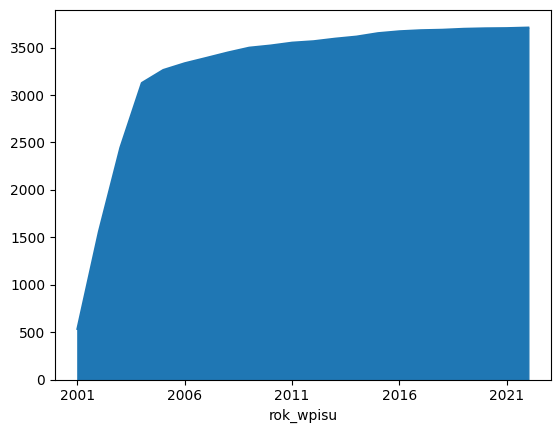

In [24]:
# number of cooperatives alive
CompositeAllCoopData['rok_wpisu'] = CompositeAllCoopData['krs_rejestry.rejestr_przedsiebiorcow_data_wpisu'].str[:4]


# dispall(CompositeAllCoopData['rok_wpisu'].value_counts())

CompositeAllCoopData.groupby('rok_wpisu')['id'].count().cumsum().plot(kind='area')

In [243]:
regon_sample = CompositeAllCoopData['numery.regon'][600:650].tolist()
print(regon_sample)

[388748, 491386, 491015, 330045464, 631516666, 110085310, 510815285, 1361102, 510858863, 917046, 1016150, 650897449, 531014376, 485457, 871234580, 1094210, 70544719, 170058542, 1326465, 550668775, 664645, 4714357, 970303471, 510610985, 950432882, 490613, 1011508, 1342671, 110262031, 390624787, 210219919, 1251862, 1320037, 578420, 532458968, 330244436, 790124256, 981512, 330020145, 171011761, 330233935, 790355620, 970372555, 484558, 330256209, 1244046, 1303369, 90514654, 485859, 990528]


In [ ]:
driver = uc.Chrome()
driver.get('https://chat.openai.com/chat')

time.sleep(5)

driver.find_element(By.CSS_SELECTOR, '#__next > div.flex.h-full.w-full.flex-col.items-center.justify-center.bg-gray-50.dark\:bg-gray-800 > div.w-96.flex.flex-col.flex-auto.justify-center.items-center > div.flex.flex-row.gap-3 > button:nth-child(1) > div').click()


driver.find_element(By.CSS_SELECTOR, 'username').send_keys()

## Callers and tools

In [170]:
dispall(CompositeAllCoopData[['id', 'zuzycie_materialow_i_energii_2021']][1500:1550])

dispall(CompositeAllCoopData.loc[CompositeAllCoopData.id==216858].T)

FinDocDataModif_RZIS_przychody_netto = pd.read_csv('Data from rejestr.io/FinDocDataModif_RZIS_przychody_netto.csv')
FinDocDataModif_RZIS_przychody_netto

to1 = FinDocDataModif_RZIS_przychody_netto.loc[FinDocDataModif_RZIS_przychody_netto.id_organizacji==280456]
dispall(FinDocDataModif_RZIS_przychody_netto.loc[FinDocDataModif_RZIS_przychody_netto.id_organizacji==280456])

FinDocDataModif_RZIS_przychody_netto.nazwa_wezla.value_counts()

for column_base_name in import_variables:
    Rizis_single_variable = pd.read_csv(f'Data from rejestr.io/FinDocDataModif_RZIS_{column_base_name}.csv')
    print('Working on ', column_base_name,)
    print(Rizis_single_variable.nazwa_wezla.value_counts())

to1.loc[(to1.rok==2021) & (to1.nazwa_wezla=='A') ]

focus.loc[focus['rok']==year,'nazwa_wezla'==prefered_node_name].iat[0]

CompositeAllCoopData['stan.czy_wykreslona'].value_counts()

CompositeAllCoopData.loc[:,CompositeAllCoopData.columns.str.contains("przychody_netto",'id')]



 CompositeAllCoopData.filter(regex='przychody_netto_....')

dispall(CompositeAllCoopData.count())

len(FinDocDataModif_RZIS.id_organizacji.unique())

len(CompositeAllCoopData['przychody_netto.2017'].dropna())

# dispwide(CompositeAllCoopData)
CompositeAllCoopData['przychody_netto.2021'].dropna().hist(bins=20)

# dispwide(CompositeAllCoopData)
CompositeAllCoopData['Przychody_netto.2021'].dropna().sort_values()[:-50].hist(bins=20)

# dispwide(CompositeAllCoopData)
CompositeAllCoopData.sort_values('Przychody_netto.2021').dropna(subset=('Przychody_netto.2021'))

dispwide(CompositeAllCoopData.dropna(subset=['Przychody_netto.2021','Przychody_netto.2020','Przychody_netto.2019']))

CompositeAllCoopData

id  zuzycie_materialow_i_energii_2021
1500  173424                          398318.29
1501  173411                         1217971.65
1502  173395                                NaN
1503  173349                            1541.94
1504  173308                          179730.17
1505  173298                          104474.17
1506  173279                          170518.86
1507  173273                          459089.45
1508  173269                        42162230.68
1509  173254                            5828.28
1510  173251                         3237146.41
1511  173231                                NaN
1512  173173                                NaN
1513  173137                          844854.23
1514  173122                         1678863.55
1515  173100                                NaN
1516  173095                          131518.95
1517  173049                          199680.92
1518  173046                         1751410.97
1519  172985                         1644212.43
1520  172958                         1489466.46
1521  172957                                NaN
1522  172926                         2262947.79
1523  172921                           12708.01
1524  172884                          890132.00
1525  172813                          150403.28
1526  172807                         2520278.03
1527  172757                         1592585.90
1528  172678                          484372.71
1529  172607                         7023234.22
1530  172567                          192981.77
1531  172554                         1443000.00
1532  172502                          794758.92
1533  172470                          165290.58
1534  172449                                NaN
1535  172422                          618462.51
1536  172421                            4697.46
1537  172396                         1526719.30
1538  172373                          106036.07
1539  172361                          385368.01
1540  172358                          201693.11
1541  172196                          571160.93
1542  172185                         3043844.32
1543  172176                           73842.60
1544  172168                         1145149.70
1545  172164                          283394.56
1546  172162                                NaN
1547  172155                         1454216.27
1548  172128                          956957.26
1549  172017                        15249519.98

In [102]:
CompositeAllCoopData

id          typ adres.kod adres.miejscowosc adres.nr_domu  ...  \
0     1006590  organizacja    04-036          Warszawa            72  ...   
1      990360  organizacja    96-200             Niwna            48  ...   
2      989448  organizacja    01-934          Warszawa            76  ...   
3      958748  organizacja    02-695          Warszawa             4  ...   
4      916521  organizacja    03-566          Warszawa            46  ...   
...       ...          ...       ...               ...           ...  ...   
3708   194329  organizacja    83-041         Domachowo            15  ...   
3709   165653  organizacja    00-769          Warszawa             2  ...   
3710   153261  organizacja    75-363          Koszalin            5C  ...   
3711   126635  organizacja    02-320          Warszawa            40  ...   
3712   130991  organizacja    38-315         Gładyszów           113  ...   

     Przychody_netto.2019 Przychody_netto.2020.flag Przychody_netto.2020  \
0                     NaN          [no_val, no_val]                  NaN   
1                     NaN          [no_val, no_val]                  NaN   
2                     NaN          [no_val, no_val]                  NaN   
3                     NaN          [no_val, no_val]                  NaN   
4                     NaN          [no_val, no_val]                  NaN   
...                   ...                       ...                  ...   
3708                  NaN          [no_val, no_val]                  NaN   
3709            165058.08         [1-val, prev_y_c]            153804.12   
3710             77848.19         [1-val, prev_y_c]             77156.52   
3711                  NaN          [no_val, no_val]                  NaN   
3712             77791.98         [1-val, prev_y_c]             92237.38   

      Przychody_netto.2021.flag  Przychody_netto.2021  
0                      [no_val]                   NaN  
1                      [no_val]                   NaN  
2                      [no_val]                   NaN  
3                      [no_val]                   NaN  
4                      [no_val]                   NaN  
...                         ...                   ...  
3708                   [no_val]                   NaN  
3709                    [1-val]             158388.82  
3710                    [1-val]              78179.51  
3711                   [no_val]                   NaN  
3712                    [1-val]              95425.45  

[3713 rows x 64 columns]

# GeoLocation

In [11]:
# Create searchable whole adress variable

CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')

CompositeAllCoopData['adres.nr_domu'] = CompositeAllCoopData['adres.nr_domu'].str.replace('[-].*','',regex=True).str.replace('[,].*','',regex=True).str.replace('\s','',regex=True).str.replace('"','',regex=True).str.replace('Kl.c','',regex=True).str.replace('/Of','',regex=True)

CompositeAllCoopData['adres.ulica'] = CompositeAllCoopData['adres.ulica'].astype(str).replace( 'nan', '')

CompositeAllCoopData['adres.cały'] = CompositeAllCoopData['adres.miejscowosc'].astype(str) +', '+CompositeAllCoopData['adres.kod'].astype(str) +', '+ CompositeAllCoopData['adres.ulica'].astype(str) +' '+ CompositeAllCoopData['adres.nr_domu'].astype(str)
CompositeAllCoopData['adres.cały']

0       Warszawa, 04-036, Aleja Stanów Zjednoczonych 72
1                                    Niwna, 96-200,  48
2                       Warszawa, 01-934, Księżycowa 76
3                            Warszawa, 02-695, Bełdan 4
4                       Warszawa, 03-566, Dalanowska 46
                             ...                       
3706                             Domachowo, 83-041,  15
3707                       Warszawa, 00-769, Węgrzyna 2
3708                 Koszalin, 75-363, Grochowskiego 5C
3709                      Warszawa, 02-320, Grójecka 40
3710                            Gładyszów, 38-315,  113
Name: adres.cały, Length: 3711, dtype: object

In [68]:
CompositeAllCoopData.loc[CompositeAllCoopData.id==41916]

id          typ adres.kod adres.miejscowosc adres.nr_domu  \
3338  41916  organizacja    02-674          Warszawa            14   

     adres.nr_mieszkania adres.panstwo adres.poczta  adres.teryt.gmina  \
3338                 NaN        Polska     Warszawa           146501.0   

      adres.teryt.powiat  ...  uslugi_obce_2017  uslugi_obce_2018_flag  \
3338              1465.0  ...          36324.44  ['1-val', 'prev_y_c']   

      uslugi_obce_2018  uslugi_obce_2019_flag  uslugi_obce_2019  \
3338          20517.28  ['1-val', 'prev_y_c']          17832.15   

      uslugi_obce_2020_flag uslugi_obce_2020 uslugi_obce_2021_flag  \
3338  ['1-val', 'prev_y_c']         30550.14             ['1-val']   

      uslugi_obce_2021                       adres.cały  
3338          21155.05  Warszawa, 02-674, Marynarska 14  

[1 rows x 145 columns]

In [47]:
data = CompositeAllCoopData.loc[CompositeAllCoopData.id == 486588]

id = data['id']
address = data['adres.cały'].astype(str)
city = data['adres.miejscowosc']
code = data['adres.kod']
street = data['adres.ulica']
nrd = data['adres.nr_domu']
get_coordinates(address)

nan

In [10]:
'''
get coordinates function - not used
'''
def get_coordinates(address):
    try:
        point = geolocator.geocode(address).point
        k = str(point.latitude) + ':'+str(pointnt.longitude)
        print('.',end="")
    except:
        k=np.nan
    return k

## Old

## New

### Donwnloader

In [ ]:
opensteetmap

In [11]:
start_from_file = 160
for index, data in CompositeAllCoopData[['id','adres.cały','adres.miejscowosc','adres.ulica','adres.kod']].iloc[start_from_file*20:].iterrows():
    print(index)

3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399


In [71]:
'''
Downloads coordinates for every cooparative, saves output in multiple csv files
'''
geolocator = Nominatim(user_agent="MyApp")

file = 0

if file !=0:
    counter = file*20
else:
    counter=0

coordinates=pd.DataFrame(columns=['id','adres.cały','latitude','longitude', 'address_accuracy'])
for index, data in CompositeAllCoopData[['id','adres.cały','adres.miejscowosc','adres.ulica','adres.kod']].iloc[counter:].iterrows():
    atempt = 0
    success = 0
    while (atempt<3) & (success < 1):
        id = str(data['id'])
        address = str(data['adres.cały'])
        city = str(data['adres.miejscowosc'])
        code = str(data['adres.kod'])
        street = str(data['adres.ulica'])
        print(id, address, end='   ')
        try:
            k = geolocator.geocode(address).point
            lat = k.latitude
            long = k.longitude
            if lat<48.9 or lat>55 or long<14 or long>24.3:
                print(__very_ar_away_error,end='')
                raise Exception('out of this world')
            new_row = pd.DataFrame.from_dict({'id':[id],'adres.cały':address, 'latitude':lat,'longitude':long,'address_accuracy':'address'})
            coordinates = pd.concat([coordinates,new_row], axis=0, ignore_index=True)
            print(new_row.iloc[0]['latitude'],' ', new_row.iloc[0]['latitude'],' ')
            success = 1
        except:
            try:
                if street==street:
                    k = geolocator.geocode(city +' '+ code +' '+ street).point
                else:
                    k = geolocator.geocode(city +' '+ code).point
                lat = k.latitude
                long = k.longitude
                if lat<48.9 or lat>55 or long<14 or long>24.3:
                    print(__very_ar_away_error,end='')
                    raise Exception('out of this world')
                new_row = pd.DataFrame.from_dict({'id':[id],'adres.cały':address, 'latitude':lat,'longitude':long,'address_accuracy':'city_code_street'})
                coordinates = pd.concat([coordinates,new_row], axis=0, ignore_index=True)
                print(new_row.iloc[0]['latitude'],' ', new_row.iloc[0]['latitude'],' __error1')
                success = 1
            except:
                try:
                    k = geolocator.geocode(city +' '+ street).point
                    lat = k.latitude
                    long = k.longitude
                    if lat<48.9 or lat>55 or long<14 or long>24.3:
                        print(__very_ar_away_error,end='')
                        raise Exception('out of this world')
                    new_row = pd.DataFrame.from_dict({'id':[id],'adres.cały':address, 'latitude':lat,'longitude':long,'address_accuracy':'city_street'})
                    coordinates = pd.concat([coordinates,new_row], axis=0, ignore_index=True)
                    print(new_row.iloc[0]['latitude'],' ', new_row.iloc[0]['latitude'],' __error2')
                    success = 1
                except:
                    try:
                        k = geolocator.geocode(code).point
                        lat = k.latitude
                        long = k.longitude
                        if lat<48.9 or lat>55 or long<14 or long>24.3:
                            print(__very_ar_away_error,end='')
                            raise Exception('out of this world')
                        new_row = pd.DataFrame.from_dict({'id':[id],'adres.cały':address, 'latitude':lat,'longitude':long,'address_accuracy':'code'})
                        coordinates = pd.concat([coordinates,new_row], axis=0, ignore_index=True)
                        print(new_row.iloc[0]['latitude'],' ', new_row.iloc[0]['latitude'],' __error3')
                        success = 1
                    except:
                        time.sleep(3)
                        print('yep')
                        if atempt == 2:
                            new_row = pd.DataFrame.from_dict({'id':[id],'adres.cały':address,'latitude':np.nan,'longitude':np.nan})
                            coordinates = pd.concat([coordinates,new_row], axis=0)
                            print('_____________________error4')
                            atempt+=1
                        else:
                            atempt+=1
    counter += 1
    print('.', end=' ')
    if counter % 20 == 0 or counter==len(CompositeAllCoopData['adres.cały']):
        file +=1
        coordinates.to_csv(f'Data from rejestr.io/Coordinates2/koordynaty{str(file).zfill(2)}.csv')
        print(f'saved {str(file).zfill(2)}')
        time.sleep(2)
        if coordinates['latitude'].isna().sum()>20:
            print("error")
            break
        coordinates=pd.DataFrame(columns=['id','latitude','longitude'])


1006590 Warszawa, 04-036, Aleja Stanów Zjednoczonych 72   52.2435635   52.2435635  
. 990360 Niwna, 96-200,  48   51.78849   51.78849  
. 989448 Warszawa, 01-934, Księżycowa 76   52.2751212   52.2751212  
. 958748 Warszawa, 02-695, Bełdan 4   52.1721236   52.1721236  
. 916521 Warszawa, 03-566, Dalanowska 46   52.2773606   52.2773606  
. 900230 Sochaczew, 96-500, Warszawska 65A   52.228984   52.228984  
. 854503 Lublin, 20-458, Mikołaja Reja 30   51.2108482   51.2108482  
. 845274 Poznań, 60-320, Bułgarska 59   52.4016878   52.4016878  
. 834911 Gdańsk, 80-386, Lęborska 3B   54.4046115   54.4046115  
. 833529 Białka, 22-300,  15   49.3821395   49.3821395  
. 810224 Poznań, 61-541, Przemysłowa 39   52.3955543   52.3955543  
. 809596 Poznań, 60-623, Mazowiecka 42   52.4257414   52.4257414  
. 791840 Krobów, 05-600, Zakładowa 13   51.860480949999996   51.860480949999996  
. 782029 Drwalew, 05-651, Grójecka 12   51.8951618   51.8951618  
. 770667 Łodygowice, 34-325, Postępu Rolniczego 1   

OSError: [Errno 28] No space left on device

### Joiner

In [50]:
'''
Joins all coop coordinates files
'''
path= 'Data from rejestr.io/Coordinates2/'
paths = list_of_csv_files(path)
coordinates=pd.DataFrame(columns=['id','latitude','longitude'])
for path in paths:
    part = pd.read_csv(path).drop('Unnamed: 0', axis=1)
    coordinates = pd.concat([coordinates,part], axis=0, ignore_index=True)
coordinates.to_csv(f'Data from rejestr.io/Coop_Coordinates.csv', index=False)
coordinates

id   latitude  longitude  \
0     1006590  52.243564  21.085238   
1      990360  51.788490  20.253890   
2      989448  52.275121  20.907431   
3      958748  52.172124  21.010887   
4      916521  52.277361  21.048672   
...       ...        ...        ...   
3706   147507  53.274267  18.963166   
3707   147487  51.606056  17.528692   
3708   147450  53.135431  18.009463   
3709   147432  52.128912  21.092523   
3710   147363  52.237016  21.024285   

                                           adres.cały address_accuracy  
0     Warszawa, 04-036, Aleja Stanów Zjednoczonych 72          address  
1                                  Niwna, 96-200,  48          address  
2                     Warszawa, 01-934, Księżycowa 76          address  
3                          Warszawa, 02-695, Bełdan 4          address  
4                     Warszawa, 03-566, Dalanowska 46          address  
...                                               ...              ...  
3706                    Wąbrzeźno, 87-200, Akacjowa 6          address  
3707                    Sulmierzyce, 63-750, Rynek 32          address  
3708                 Bydgoszcz, 85-079, Kościuszki 15          address  
3709                   Warszawa, 02-970, Zapłocie 42E          address  
3710                      Warszawa, 00-355, Tamka 34A          address  

[3711 rows x 5 columns]

In [12]:
Coop_Coordinates = pd.read_csv('Data from rejestr.io/Coop_Coordinates.csv')

In [51]:
Coop_Coordinates

id   latitude  longitude                         adres.cały  \
0      57121  52.228901  20.995881         Warszawa, 00-819, Złota 77   
1      57092  54.387257  18.570670   Gdańsk, 80-304, Rodakowskiego 3A   
2      56888  52.225784  20.945168          Warszawa, 01-249, Gizów 6   
3      56744  52.138157  21.013484         Warszawa, 02-830, Gawota 6   
4      56514  53.459859  14.537510  Szczecin, 71-471, Wiosny Ludów 46   
...      ...        ...        ...                                ...   
3706  147507  53.274267  18.963166      Wąbrzeźno, 87-200, Akacjowa 6   
3707  147487  51.606056  17.528692      Sulmierzyce, 63-750, Rynek 32   
3708  147450  53.135431  18.009463   Bydgoszcz, 85-079, Kościuszki 15   
3709  147432  52.128912  21.092523     Warszawa, 02-970, Zapłocie 42E   
3710  147363  52.237016  21.024285        Warszawa, 00-355, Tamka 34A   

      address_accuracy  
0              address  
1     city_code_street  
2              address  
3              address  
4              address  
...                ...  
3706           address  
3707           address  
3708           address  
3709           address  
3710           address  

[3711 rows x 5 columns]

In [52]:
len(Coop_Coordinates.id.unique())

3571

In [70]:
dispall(Coop_Coordinates.loc[Coop_Coordinates.duplicated('id')])

id   latitude  longitude  \
1540  57121  52.228901  20.995881   
1541  57092  54.387257  18.570670   
1542  56888  52.225784  20.945168   
1543  56744  52.138157  21.013484   
1544  56514  53.459859  14.537510   
1545  56475  53.779219  20.487428   
1546  56304  52.243154  20.944020   
1547  56285  52.235289  21.034661   
1548  56280  51.080092  17.062546   
1549  56262  52.133320  21.069147   
1550  56254  50.641242  20.291195   
1551  56223  49.421225  20.963953   
1552  56158  50.024228  19.986065   
1553  56000  51.770350  19.458610   
1554  55965  53.909667  14.250801   
1555  55890  51.615703  15.327752   
1556  55749  52.253107  20.988578   
1557  55720  50.046314  18.691484   
1558  55607  52.253416  21.041238   
1559  55188  51.214580  22.682450   
1560  55152  50.026404  19.914041   
1561  55132  52.384932  16.916070   
1562  55027  52.228786  20.961113   
1563  54521  54.202426  16.159012   
1564  54371  50.078159  19.979729   
1565  54342  54.088721  18.768347   
1566  54272  50.273348  19.579551   
1567  54191  51.427705  21.987215   
1568  53903  51.664390  19.351200   
1569  53884  51.720985  19.489102   
1570  53738  50.273208  19.029357   
1571  53640  53.102122  18.055570   
1572  53555  52.197904  20.872854   
1573  53107  52.902300  16.562950   
1574  53056  52.130603  21.061529   
1575  53046  52.228681  21.015370   
1576  52988  51.119339  17.013563   
1577  52958  52.539783  21.357530   
1578  52914  49.968746  18.943293   
1579  52912  53.820546  22.347683   
1580  52721  50.897840  16.747753   
1581  52681  50.863038  17.467378   
1582  52628  50.070118  20.038944   
1583  52618  53.480709  18.746283   
1584  52529  50.403368  18.622367   
1585  52524  50.319714  18.693905   
1586  52511  50.092362  19.989134   
1587  52446  51.221269  22.509726   
1588  52232  53.143751  23.177713   
1589  52047  51.751324  18.076890   
1590  52040  51.648166  17.848973   
1591  51927  51.049003  20.842947   
1592  51820  53.642124  15.622735   
1593  51712  53.628882  21.813313   
1594  51624  51.268935  16.704549   
1595  51619  52.239505  20.910210   
1596  51542  50.253223  18.905630   
1597  51281  49.974714  20.611988   
1598  51263  53.176813  22.072872   
1599  51248  51.957012  20.146547   
1600  51054  53.516193  19.086254   
1601  50845  53.934000  18.326400   
1602  50671  51.473243  16.909248   
1603  50635  51.109249  17.024255   
1604  50490  50.297767  18.659635   
1605  50448  54.470319  18.503121   
1606  50313  52.539655  19.763902   
1607  50255  51.986553  21.212751   
1608  50211  51.399460  22.062219   
1609  50201  51.427491  21.158584   
1610  50128  51.168853  19.484022   
1611  50080  51.725555  19.637989   
1612  50013  52.103016  19.938684   
1613  49814  49.836529  19.950290   
1614  49762  51.224681  22.609482   
1615  49664  52.316695  15.044424   
1616  49440  50.698182  20.461349   
1617  49242  52.272759  20.984204   
1618  49037  53.071715  21.577172   
1619  49009  54.212371  16.200087   
1620  48980  51.211643  17.388510   
1621  48956  51.808465  19.318126   
1622  48813  51.860843  19.394882   
1623  48636  52.220948  20.982027   
1624  48629  50.001877  20.915562   
1625  48594  52.544110  19.702257   
1626  48470  50.019160  20.958286   
1627  48348  51.091838  17.035753   
1628  48288  53.108069  23.124278   
1629  48100  53.538450  15.558160   
1630  48035  49.885101  22.099005   
1631  47948  50.705692  15.999225   
1632  47862  51.807531  15.704938   
1633  47740  52.238826  20.959518   
1634  47707  51.850740  16.582153   
1635  47678  51.838737  16.601363   
1636  47548  51.794808  19.373523   
1637  47473  53.096453  21.606600   
1638  47439  52.267465  20.982137   
1639  47382  52.992884  22.880132   
1640  47340  52.226987  20.999516   
1641  47186  54.188345  16.169907   
1642  47129  52.795935  17.201486   
1643  47079  50.900813  14.954130   
1644  47045  50.274292  19.037011   
1645  46957  52.590034  17.258167   
1646  46836  50.291838  21.437347   
1647  46815  

In [65]:
Coop_Coordinates.loc[Coop_Coordinates.id == 41916]

id   latitude  longitude                       adres.cały  \
138   41916  52.181676  20.990433  Warszawa, 02-674, Marynarska 14   
1678  41916  52.181676  20.990433  Warszawa, 02-674, Marynarska 14   

     address_accuracy  
138           address  
1678          address

In [42]:
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')

In [53]:
len(CompositeAllCoopData.id.unique())

3711

In [36]:
Coop_Coordinates.loc[coordinates.id=='989448']

Empty DataFrame
Columns: [id, latitude, longitude, adres.cały, address_accuracy]
Index: []

### Exception handler

In [63]:
coordinates.address_accuracy.value_counts()

address             3383
city_code_street     193
code                  87
city_street           48
Name: address_accuracy, dtype: int64

In [15]:
Coop_Coordinates = pd.read_csv('Data from rejestr.io/Coop_Coordinates.csv')
Coop_Coordinates
exceptions = Coop_Coordinates.loc[Coop_Coordinates['latitude'].isna()]
exceptions

Empty DataFrame
Columns: [id, latitude, longitude, adres.cały, address_accuracy]
Index: []

In [16]:
CompositeAllCoopData.loc[CompositeAllCoopData.id==129553,'adres.kod']

2359    21-211
Name: adres.kod, dtype: object

In [17]:
# fucked up coordinates

fucked_up_latitude = 46.314475
fucked_up_longitude = 11.048029

Coop_Coordinates.loc[
    (Coop_Coordinates['latitude']==46.314475) |
    (Coop_Coordinates['longitude']==11.048029)]

Empty DataFrame
Columns: [id, latitude, longitude, adres.cały, address_accuracy]
Index: []

In [18]:
Coop_Coordinates.loc[
    (Coop_Coordinates['longitude']<14) |
    (Coop_Coordinates['longitude']>24.3) |
    (Coop_Coordinates['latitude']>55)|
    (Coop_Coordinates['latitude']<48.9)]

Empty DataFrame
Columns: [id, latitude, longitude, adres.cały, address_accuracy]
Index: []

### Merger

In [20]:
'''
Inserting coordinates into main database
'''
Coop_Coordinates = pd.read_csv('Data from rejestr.io/Coop_Coordinates.csv')
CompositeAllCoopData = pd.merge(CompositeAllCoopData, Coop_Coordinates[['id','latitude','longitude']],left_on='id',right_on='id',how='left',sort=False)
CompositeAllCoopData.to_csv('Data from rejestr.io/CompositeAllCoopData.csv', index=False) 

In [21]:
CompositeAllCoopData.columns.tolist()

['id',
 'typ',
 'adres.kod',
 'adres.miejscowosc',
 'adres.nr_domu',
 'adres.nr_mieszkania',
 'adres.panstwo',
 'adres.poczta',
 'adres.teryt.gmina',
 'adres.teryt.powiat',
 'adres.teryt.wojewodztwo',
 'adres.ulica',
 'glowna_osoba.id',
 'glowna_osoba.imiona_i_nazwisko',
 'krs_powiazania_liczby.aktualne',
 'krs_powiazania_liczby.przeszle',
 'krs_rejestry.rejestr_przedsiebiorcow_data_wpisu',
 'krs_wpisy.najnowszy_data',
 'krs_wpisy.najnowszy_numer',
 'krs_wpisy.pierwszy_data',
 'metadane.krs_odpis_synchronizacja_data_czas',
 'nazwy.pelna',
 'nazwy.skrocona',
 'numery.krs',
 'numery.nip',
 'numery.regon',
 'stan.czy_dofinansowana_przez_ue',
 'stan.czy_jest_na_gpw',
 'stan.czy_otrzymala_pomoc_publiczna',
 'stan.czy_pozytku_publicznego',
 'stan.czy_spolka_skarbu_panstwa',
 'stan.czy_wykreslona',
 'stan.forma_prawna',
 'stan.pkd_przewazajace_dzial',
 'stan.w_likwidacji',
 'stan.w_upadlosci',
 'stan.w_zawieszeniu',
 'stan.wielkosc',
 'kontakt.www',
 'kontakt.emaile',
 'krs_rejestry.rejestr_p

In [224]:
dispwide(CompositeAllCoopData[[f for f in CompositeAllCoopData.columns if 'adres' in f]].head(50))

adres.kod adres.miejscowosc adres.nr_domu adres.nr_mieszkania  \
0     04-036          Warszawa            72              Uż. 32   
1     96-200             Niwna            48                 NaN   
2     01-934          Warszawa            76                  17   
3     02-695          Warszawa             4                 NaN   
4     03-566          Warszawa            46                  46   
5     96-500         Sochaczew           65A                 NaN   
6     20-458            Lublin            30                 NaN   
7     60-320            Poznań            59                  U3   
8     80-386            Gdańsk            3B                2.26   
9     22-300            Białka            15                   7   
10    61-541            Poznań            39                 NaN   
11    60-623            Poznań            42                 NaN   
12    05-600            Krobów            13                 NaN   
13    05-651           Drwalew            12                  2A   
14    34-325        Łodygowice             1                 NaN   
15    21-110   Ostrów Lubelski            3A                 NaN   
16    00-673          Warszawa         60/62                  39   
17    19-300               Ełk            27                 NaN   
18    02-922          Warszawa            60                 NaN   
19    02-735          Warszawa            29                 NaN   
20    03-126          Warszawa            11                 NaN   
21    72-400   Kamień Pomorski             4                 NaN   
22    02-796          Warszawa            5B                  51   
23    26-600             Radom            25                  5A   
24    81-356            Gdynia            13                  13   
25    61-345            Poznań             3                 NaN   
26    43-180           Orzesze             9                 NaN   
27    21-150              Kock            68                 NaN   
28    04-368          Warszawa          244A                 NaN   
29    00-895          Warszawa             4                 NaN   
30    01-773          Warszawa            11                 NaN   
31    69-100           Słubice             3                 NaN   
32    14-241          Szymbark            10                 NaN   
33    26-400         Przysucha             6                 NaN   
34    23-440         Radzięcin           200                 NaN   
35    02-792          Warszawa             7                  U1   
36    99-319         Dobrzelin            89                 NaN   
37    63-300           Marszew           18A                 NaN   
38    04-174          Warszawa             9                  1A   
39    42-436           Wierbka           122                 NaN   
40    54-130           Wrocław             4                   6   
41    00-837          Warszawa            98                  72   
42    21-518          Sosnówka            55                 NaN   
43    22-230      Wola Uhruska            8A                 NaN   
44    22-230            Uhrusk           133                 NaN   
45    09-300           Żuromin          7/19                 NaN   
46    66-530         Drezdenko            16                 NaN   
47    59-920         Bogatynia            12                 NaN   
48    71-696          Szczecin             3                 NaN   
49    07-410         Ostrołęka             4                 16A   

   adres.panstwo     adres.poczta  adres.teryt.gmina  adres.teryt.powiat  \
0         Polska         Warszawa           146501.0              1465.0   
1         Polska  Rawa Mazowiecka           101304.0              1013.0   
2         Polska         Warszawa           146501.0              1465.0   
3         Polska         Warszawa           146501.0              1465.0   
4         Polska         Warszawa           146501.0              1465.0   
5         Polska        Sochaczew           142801.0              1428.0   
6 

In [32]:
CompositeAllCoopData

id          typ adres.kod adres.miejscowosc adres.nr_domu  \
0     1006590  organizacja    04-036          Warszawa            72   
1      990360  organizacja    96-200             Niwna            48   
2      989448  organizacja    01-934          Warszawa            76   
3      958748  organizacja    02-695          Warszawa             4   
4      916521  organizacja    03-566          Warszawa            46   
...       ...          ...       ...               ...           ...   
3706   194329  organizacja    83-041         Domachowo            15   
3707   165653  organizacja    00-769          Warszawa             2   
3708   153261  organizacja    75-363          Koszalin            5C   
3709   126635  organizacja    02-320          Warszawa            40   
3710   130991  organizacja    38-315         Gładyszów           113   

     adres.nr_mieszkania adres.panstwo     adres.poczta  adres.teryt.gmina  \
0                 Uż. 32        Polska         Warszawa           146501.0   
1                    NaN        Polska  Rawa Mazowiecka           101304.0   
2                     17        Polska         Warszawa           146501.0   
3                    NaN        Polska         Warszawa           146501.0   
4                     46        Polska         Warszawa           146501.0   
...                  ...           ...              ...                ...   
3706                 NaN        Polska       Mierzeszyn           220408.0   
3707                 NaN        Polska         Warszawa           146501.0   
3708                 NaN        Polska         Koszalin           326101.0   
3709                 NaN        Polska         Warszawa                NaN   
3710                   7        Polska  Uście Gorlickie           120510.0   

      adres.teryt.powiat  ...  uslugi_obce_2017 uslugi_obce_2018_flag  \
0                 1465.0  ...               NaN  ['no_val', 'no_val']   
1                 1013.0  ...               NaN  ['no_val', 'no_val']   
2                 1465.0  ...               NaN  ['no_val', 'no_val']   
3                 1465.0  ...               NaN  ['no_val', 'no_val']   
4                 1465.0  ...               NaN  ['no_val', 'no_val']   
...                  ...  ...               ...                   ...   
3706              2204.0  ...               NaN  ['no_val', 'no_val']   
3707              1465.0  ...          57142.79   ['1-val', 'no_val']   
3708              3261.0  ...               NaN  ['no_val', 'no_val']   
3709                 NaN  ...               NaN  ['no_val', 'no_val']   
3710              1205.0  ...               NaN  ['no_val', 'no_val']   

      uslugi_obce_2018   uslugi_obce_2019_flag  uslugi_obce_2019  \
0                  NaN    ['no_val', 'no_val']               NaN   
1                  NaN    ['no_val', 'no_val']               NaN   
2                  NaN    ['no_val', 'no_val']               NaN   
3                  NaN    ['no_val', 'no_val']               NaN   
4                  NaN    ['no_val', 'no_val']               NaN   
...                ...                     ...               ...   
3706               NaN    ['no_val', 'no_val']               NaN   
3707          64168.61  ['no_val', 'prev_y_f']          68587.24   
3708               NaN    ['no_val', 'no_val']               NaN   
3709               NaN    ['no_val', 'no_val']               NaN   
3710               NaN    ['no_val', 'prev_n']               NaN   

      uslugi_obce_2020_flag uslugi_obce_2020 uslugi_obce_2021_flag  \
0      ['no_val', 'no_val']              NaN            ['no_val']   
1      ['no_val', 'no_val']              NaN            ['no_val']   
2      ['no_val', 'no_val']              NaN            ['no_val']   
3      ['no_val', 'no_val']              NaN            ['no_val']   
4      ['no_val', 'no_val']              NaN            ['no_val']   
...                     ...              ...                   ...   
3706   ['no_val', 'no_val

In [24]:
df2.comb

NameError: name 'df2' is not defined

In [240]:
'''
coordinates insight tools
'''
# CompositeAllCoopData['adres.cały'][48]

geolocator.geocode('Jelenia Góra, 58-506, Paderewskiego 34A').point.latitude

# geolocator.geocode(CompositeAllCoopData['adres.cały'][48][:-15])

50.9184201

In [17]:
'''
handling exceptions
'''

CompositeAllCoopData.at[45, 'adres.cały'] = 'Żuromin, 09-300, Biskupa Wetmańskiego 7/19'

In [234]:
CompositeAllCoopData['adres.koordynaty.latitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3713 entries, 0 to 3712
Series name: adres.koordynaty.latitude
Non-Null Count  Dtype 
--------------  ----- 
3451 non-null   object
dtypes: object(1)
memory usage: 29.1+ KB


In [250]:
for index, row in zoom.iterrows(): 
    adres.cały
    
    row['adres.koordynaty.latitude']
    if row['adres.koordynaty.latitude'] is np.nan:
        print('jooooo')

NameError: name 'adres' is not defined

In [192]:
CompositeAllCoopData.loc[3]['adres.koordynaty.latitude'] is np.nan

False

In [ ]:
CompositeAllCoopData['lati'] = CompositeAllCoopData['adres.cały']

In [ ]:
x = lambda address : geolocator.geocode(address).point.latitude
print(x(5))

In [172]:
CompositeAllCoopData = CompositeAllCoopData.fillna(value=np.nan)

In [178]:
CompositeAllCoopData = CompositeAllCoopData.assign(latitude = lambda x: geolocator.geocode(x['adres.cały']).point.latitude if)

AttributeError: 'NoneType' object has no attribute 'point'

In [186]:
CompositeAllCoopData['adres.cały'].apply(lambda x: geolocator.geocode(x).point.latitude  if x is not np.nan else np.nan)

AttributeError: 'NoneType' object has no attribute 'point'

In [179]:
CompositeAllCoopData['adres.cały'][20].notna()

AttributeError: 'str' object has no attribute 'notna'

In [175]:
CompositeAllCoopData['adres.cały']

0       Warszawa, 04-036, Aleja Stanów Zjednoczonych 72
1                                    Niwna, 96-200,  48
2                       Warszawa, 01-934, Księżycowa 76
3                            Warszawa, 02-695, Bełdan 4
4                       Warszawa, 03-566, Dalanowska 46
                             ...                       
3708                             Domachowo, 83-041,  15
3709                       Warszawa, 00-769, Węgrzyna 2
3710                 Koszalin, 75-363, Grochowskiego 5C
3711                      Warszawa, 02-320, Grójecka 40
3712                            Gładyszów, 38-315,  113
Name: adres.cały, Length: 3713, dtype: object

In [171]:
CompositeAllCoopData[CompositeAllCoopData.eq(np.nan).any(1)]

C:\Users\awersang\AppData\Local\Temp\ipykernel_23328\2057094297.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  CompositeAllCoopData[CompositeAllCoopData.eq(np.nan).any(1)]


Empty DataFrame
Columns: [id, typ, adres.kod, adres.miejscowosc, adres.nr_domu, adres.nr_mieszkania, adres.panstwo, adres.poczta, adres.teryt.gmina, adres.teryt.powiat, adres.teryt.wojewodztwo, adres.ulica, glowna_osoba.id, glowna_osoba.imiona_i_nazwisko, krs_powiazania_liczby.aktualne, krs_powiazania_liczby.przeszle, krs_rejestry.rejestr_przedsiebiorcow_data_wpisu, krs_wpisy.najnowszy_data, krs_wpisy.najnowszy_numer, krs_wpisy.pierwszy_data, metadane.krs_odpis_synchronizacja_data_czas, nazwy.pelna, nazwy.skrocona, numery.krs, numery.nip, numery.regon, stan.czy_dofinansowana_przez_ue, stan.czy_jest_na_gpw, stan.czy_otrzymala_pomoc_publiczna, stan.czy_pozytku_publicznego, stan.czy_spolka_skarbu_panstwa, stan.czy_wykreslona, stan.forma_prawna, stan.pkd_przewazajace_dzial, stan.w_likwidacji, stan.w_upadlosci, stan.w_zawieszeniu, stan.wielkosc, kontakt.www, kontakt.emaile, krs_rejestry.rejestr_przedsiebiorcow_data_wykreslenia, krs_wpisy.najnowszy_przed_wykresleniem_data, krs_wpisy.najnowszy_przed_wykresleniem_numer, krs_wpisy.wykreslenie_uprawomocnienie_data, numery.duns, metadane.krs_rozdzialy_dostepne, kod, info, przychody_netto_2014_flag, przychody_netto_2014, przychody_netto_2015_flag, przychody_netto_2015, przychody_netto_2016_flag, przychody_netto_2016, przychody_netto_2017_flag, przychody_netto_2017, przychody_netto_2018_flag, przychody_netto_2018, przychody_netto_2019_flag, przychody_netto_2019, przychody_netto_2020_flag, przychody_netto_2020, przychody_netto_2021_flag, przychody_netto_2021, zuzycie_materialow_i_energii_2014_flag, zuzycie_materialow_i_energii_2014, zuzycie_materialow_i_energii_2015_flag, zuzycie_materialow_i_energii_2015, zuzycie_materialow_i_energii_2016_flag, zuzycie_materialow_i_energii_2016, zuzycie_materialow_i_energii_2017_flag, zuzycie_materialow_i_energii_2017, zuzycie_materialow_i_energii_2018_flag, zuzycie_materialow_i_energii_2018, zuzycie_materialow_i_energii_2019_flag, zuzycie_materialow_i_energii_2019, zuzycie_materialow_i_energii_2020_flag, zuzycie_materialow_i_energii_2020, zuzycie_materialow_i_energii_2021_flag, zuzycie_materialow_i_energii_2021, wynagrodzenia_i_ubezpieczenia_2014_flag, wynagrodzenia_i_ubezpieczenia_2014, wynagrodzenia_i_ubezpieczenia_2015_flag, wynagrodzenia_i_ubezpieczenia_2015, wynagrodzenia_i_ubezpieczenia_2016_flag, wynagrodzenia_i_ubezpieczenia_2016, wynagrodzenia_i_ubezpieczenia_2017_flag, wynagrodzenia_i_ubezpieczenia_2017, wynagrodzenia_i_ubezpieczenia_2018_flag, wynagrodzenia_i_ubezpieczenia_2018, wynagrodzenia_i_ubezpieczenia_2019_flag, wynagrodzenia_i_ubezpieczenia_2019, wynagrodzenia_i_ubezpieczenia_2020_flag, wynagrodzenia_i_ubezpieczenia_2020, wynagrodzenia_i_ubezpieczenia_2021_flag, wynagrodzenia_i_ubezpieczenia_2021, ubezpieczenia_2014_flag, ubezpieczenia_2014, ubezpieczenia_2015_flag, ubezpieczenia_2015, ...]
Index: []

[0 rows x 163 columns]

# Scraping PDF documents

In [14]:
# get 30 random file names for the base

FinDocList_SPRAWOZDANIE_PDF = pd.read_csv('Data from rejestr.io/FinDocList_SPRAWOZDANIE_PDF.csv')
FinDocList_SPRAWOZDANIE_PDF_sample = FinDocList_SPRAWOZDANIE_PDF.sample(n=140)
FinDocList_SPRAWOZDANIE_PDF_sample.to_csv('Data from rejestr.io/FinDocList_SPRAWOZDANIE_PDF_sample.csv', index=False) 

FinDocList_SPRAWOZDANIE_PDF_sample

Unnamed: 0  czy_ma_json   doc_id  \
10244       69605        False  7850050   
6480        44400        False  7252883   
132           895        False  7815998   
4481        30702        False  5856602   
8991        60980        False  9697232   
...           ...          ...      ...   
8666        59000        False  8453700   
14283       95748        False  1509449   
6600        45292        False  7500114   
3409        23237        False  6800051   
13465       90632        False  6085190   

                                                   nazwa  data_start  \
10244  Sprawozdanie z działalności — spół. sprawozdan...  2020-01-01   
6480   Sprawozdanie z działalności — sprawozdanie 201...  2019-01-01   
132    Sprawozdanie z działalności — Sprawozdanie Zar...  2020-01-01   
4481       Sprawozdanie z działalności — SZ2019.pdf3.pdf  2019-01-01   
8991   Sprawozdanie Zarządu Spółdzielni Mieszkaniowej...  2021-01-01   
...                                                  ...         ...   
8666   Sprawodanie z działalności — sprawozdaniezarza...  2020-01-01   
14283  Sprawozdanie z działalności — sprawozdanie.za ...  2017-01-01   
6600   Sprawozdanie z działalności — Sprawozdanie z d...  2016-01-01   
3409          Sprawozdanie z działalności — Spraw DZ.pdf  2017-01-01   
13465  Sprawozdanie Zarządu — Informacjadodatkowadobi...  2019-01-01   

      data_koniec      id  
10244  2020-12-31  175706  
6480   2019-12-31  133282  
132    2020-12-31   87285  
4481   2019-12-31  107929  
8991   2021-12-31  165059  
...           ...     ...  
8666   2020-12-31  158967  
14283  2017-12-31  239873  
6600   2016-12-31  134430  
3409   2017-12-31   84267  
13465  2019-12-31  214881  

[140 rows x 7 columns]

## Downloading PDF files

Pinpoint - słabo szuka, nie można go zautomatyzować dla dużej liczby plików.

In [15]:
def download_pdf_file(url: str,file_path_name,krs_id,doc_id) -> bool:
    """Download PDF from given URL to local directory.

    :param url: The url of the PDF file to be downloaded
    :return: True if PDF file was successfully downloaded, otherwise False.
    """

    # Request URL and get response object
    response = requests.get(url,headers={'Authorization':api_key}, params={'format':'pdf'},stream=True)

    if response.status_code == 200:
        with open(file_path_name, 'wb') as pdf_object:
            pdf_object.write(response.content)
            # print(f'{krs_id} {doc_id} was successfully saved!')
            return True
    else:
        print(f'Uh oh! Could not download {krs_id} {doc_id},')
        print(f'HTTP response status code: {response.status_code}')
        return False

In [17]:
# call and save the sample files

# Retrieving and saving financial documents as JSON files 
FinDocList_SPRAWOZDANIE_PDF_sample = pd.read_csv('Data from rejestr.io/FinDocList_SPRAWOZDANIE_PDF_sample.csv')

counter = 0
for indx, address in FinDocList_SPRAWOZDANIE_PDF_sample.iterrows():
    doc_id = address.doc_id
    krs_id = address.id
    
    
    # checking if the file alrady exists
    if os.path.isfile(f'Data from rejestr.io/Cooperatives annual reports/findoc_krsid_{krs_id}_doc_id_{doc_id}.pdf'):
        
        # print(krs_id, doc_id, ' already exisits', end='  ')
        print('|', end=' ') 
            
    # if not download it
    else:
        url = f'https://rejestr.io/api/v2/org/{krs_id}/krs-dokumenty/{doc_id}'
        file_path_name = f"Data from rejestr.io/Cooperatives annual reports/findoc_krsid_{krs_id}_doc_id_{doc_id}.pdf"
        download_pdf_file(url, file_path_name, krs_id, doc_id)
        # print(krs_id, doc_id, ' downloaded', end='  ' )
        print('.', end=' ')        
        
    # counter+=1
    # if counter == 10:
    #     break

| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | 

In [18]:
FinDocList_SPRAWOZDANIE_PDF_sample

Unnamed: 0  czy_ma_json   doc_id  \
0         69605        False  7850050   
1         44400        False  7252883   
2           895        False  7815998   
3         30702        False  5856602   
4         60980        False  9697232   
..          ...          ...      ...   
135       59000        False  8453700   
136       95748        False  1509449   
137       45292        False  7500114   
138       23237        False  6800051   
139       90632        False  6085190   

                                                 nazwa  data_start  \
0    Sprawozdanie z działalności — spół. sprawozdan...  2020-01-01   
1    Sprawozdanie z działalności — sprawozdanie 201...  2019-01-01   
2    Sprawozdanie z działalności — Sprawozdanie Zar...  2020-01-01   
3        Sprawozdanie z działalności — SZ2019.pdf3.pdf  2019-01-01   
4    Sprawozdanie Zarządu Spółdzielni Mieszkaniowej...  2021-01-01   
..                                                 ...         ...   
135  Sprawodanie z działalności — sprawozdaniezarza...  2020-01-01   
136  Sprawozdanie z działalności — sprawozdanie.za ...  2017-01-01   
137  Sprawozdanie z działalności — Sprawozdanie z d...  2016-01-01   
138         Sprawozdanie z działalności — Spraw DZ.pdf  2017-01-01   
139  Sprawozdanie Zarządu — Informacjadodatkowadobi...  2019-01-01   

    data_koniec      id  
0    2020-12-31  175706  
1    2019-12-31  133282  
2    2020-12-31   87285  
3    2019-12-31  107929  
4    2021-12-31  165059  
..          ...     ...  
135  2020-12-31  158967  
136  2017-12-31  239873  
137  2016-12-31  134430  
138  2017-12-31   84267  
139  2019-12-31  214881  

[140 rows x 7 columns]

## Extracting Text

In [16]:
file_name = 'Data from rejestr.io/Cooperatives annual reports/findoc_krsid_43668_doc_id_6245663.pdf'

In [17]:
# extract text

reader = PdfReader(file_name)
text = ""
for page in reader.pages:
    text += page.extract_text() + "\n"

## extracting images

In [15]:
import fitz

In [16]:
def convert_pdf2img(input_file: str, pages: tuple = None, save=True, temp_folder=''):
    """Converts pdf to image and generates a file by page"""
    # Open the document
    pdfIn = fitz.open(input_file)
    output_files = []
    # Iterate throughout the pages
    for pg in range(pdfIn.page_count):
        if str(pages) != str(None):
            if str(pg) not in str(pages):
                continue
        # Select a page
        page = pdfIn[pg]
        rotate = int(0)
        # PDF Page is converted into a whole picture 1056*816 and then for each picture a screenshot is taken.
        # zoom = 1.33333333 -----> Image size = 1056*816
        # zoom = 2 ---> 2 * Default Resolution (text is clear, image text is hard to read)    = filesize small / Image size = 1584*1224
        # zoom = 4 ---> 4 * Default Resolution (text is clear, image text is barely readable) = filesize large
        # zoom = 8 ---> 8 * Default Resolution (text is clear, image text is readable) = filesize large
        zoom_x = 2
        zoom_y = 2
        # The zoom factor is equal to 2 in order to make text clear
        # Pre-rotate is to rotate if needed.
        mat = fitz.Matrix(zoom_x, zoom_y).prerotate(rotate)
        pix = page.get_pixmap(matrix=mat, alpha=False)
        output_file = f"{temp_folder}{os.path.splitext(os.path.basename(input_file))[0]}_page{pg+1}.png"
        pix.save(output_file)
        output_files.append(output_file)
    pdfIn.close()
    # summary = {
    #     "File": input_file, "Pages": str(pages), "Output File(s)": str(output_files)
    # }
    # Printing Summary
    # print("## Summary ########################################################")
    # print("\n".join("{}:{}".format(i, j) for i, j in summary.items()))
    # print("###################################################################")
    return output_files

In [12]:
file_name = 'Data from rejestr.io/Cooperatives annual reports/findoc_krsid_170132_doc_id_6039119.pdf'
output_files = convert_pdf2img(file_name, temp_folder='Data from rejestr.io/Cooperatives annual reports/temp/')
output_files

NameError: name 'fitz' is not defined

## Change images into text

In [561]:
img1 = np.array(Image.open('findoc_krsid_170132_doc_id_6039119_page5.png'))
text = pytesseract.image_to_string(img1, lang='pol')
text

'ILNIA MIESZKANIOWA\nSPÓŁDZIELNIA MIES\n\nJPSK, ul, Władysława IV 9\n16200 NACE 431807 326\nRegon 110507286, NIP 839-10-12-\n\nINFORMACJE FINANSOWE- BILANS 2018 R./ Załącznik do\nsprawozdania zarządu /\n\nSprawozdanie finansowe za rok 2018 sporządzone zostało wg zasad określonych\nustawą o rachunkowości z uwzględnieniem wprowadzanych zmian .\n\nŚrodki trwałe występują w następujących grupach rodzajowych :\n- budynki\n\n- grunty własne\n\nwyposażenie\n\n-zestawy komputerowe\n\n-maszyny i urządzenia\n\nStan środków trwałych na koniec 2018 roku wynosi:\n\n- budynki i budowle 257.008,20 zł.\n- zestawy komputerowe 39.580.57 zł.\n- maszyny i urządzenia 2.024,00 zł.\n- grunty własne /Ziei/ 263.522,00 zł.\n- wyposażenie biura 42.115,37 zł\n\nŁączna wartość środków trwałych na 31.12.2018 r. z uwzględnieniem obcych środków\ntrwałych i uaktualnienia środków trwałych wynosi 5.061.641,64 zł\n\nW bilansie w grupie środków trwałych w budowie wykazane są nakłady poniesioni\nsporządzenie dokumentacji z

## Loop over documents and extract data

In [20]:
FinDocList_SPRAWOZDANIE_PDF_sample

Unnamed: 0  czy_ma_json   doc_id  \
0        9437        False  5843712   
1       10861        False  6245663   
2       65289        False  8486711   
3       56284        False  6064281   
4       30531        False  5935052   
5       40910        False  6011228   
6       56916        False  9595975   
7       64114        False  6039119   
8       84100        False  1480096   
9       45574        False  6421677   

                                               nazwa  data_start data_koniec  \
0  Sprawozdanie z działalności — Sprawozdanie z d...  2019-01-01  2019-12-31   
1  Sprawozdanie z działalności — Sprawozdanie Zar...  2018-01-01  2018-12-31   
2  Sprawozdanie z działalności — sprawozdanie zar...  2020-01-01  2020-12-31   
3  Sprawozdanie z działalności — Sprawozdanie z d...  2018-01-01  2018-12-31   
4  Sprawozdanie z działalności — Sprawozdanie Zar...  2019-01-01  2019-12-31   
5  Sprawozdanie z działalności — _ZWAR - sprawozd...  2017-01-01  2017-12-31   
6  Sprawozdanie Zarządu — Sprawozdanie_Zarzadu_za...  2020-01-01  2020-12-31   
7      Sprawozdanie z działalności — uchwala2018.pdf  2018-01-01  2018-12-31   
8  Sprawozdanie z działalności — sprawozdanie Zar...  2017-01-01  2017-12-31   
9  Sprawozdanie z działalności — Rocznesprawozdan...  2018-01-01  2018-12-31   

       id  
0   36337  
1   43668  
2  171498  
3  152800  
4  107812  
5  128003  
6  153934  
7  170132  
8  197956  
9  134765

In [44]:
FinDocData_SPRAWOZDANIE_extracted_sample = pd.read_csv('Data from rejestr.io/FinDocList_SPRAWOZDANIE_PDF_sample.csv') 

FinDocData_SPRAWOZDANIE_extracted_sample[["extracted_from_text","extracted_from_image"]] = ''

FinDocData_SPRAWOZDANIE_extracted_small_sample = FinDocData_SPRAWOZDANIE_extracted_sample[0:60]
FinDocData_SPRAWOZDANIE_extracted_small_sample

Unnamed: 0  czy_ma_json    doc_id   
0        69605        False   7850050  \
1        44400        False   7252883   
2          895        False   7815998   
3        30702        False   5856602   
4        60980        False   9697232   
5        64496        False   5836314   
6        97239        False  10325400   
7        52203        False   6048017   
8        80642        False   4542305   
9        49545        False   5999126   
10       58535        False   5825358   
11        4528        False   1312776   
12       33756        False   8413319   
13       45560        False   4738052   
14       91747        False   5415974   
15       63598        False  10600448   
16        6004        False   7632082   
17       61930        False  11061830   
18       56157        False   5915995   
19       72579        False   8509983   
20       98718        False   9605285   
21       58523        False  11178328   
22       27803        False   6063431   
23       78248        False   6416837   
24       15789        False   1390678   
25       52092        False   5930060   
26        6332        False   5900067   
27       90562        False   1493696   
28       56850        False   6122013   
29       40026        False   5885213   
30       99397        False   5411951   
31       39683        False   9665757   
32       38993        False   6827050   
33        4078        False   1568459   
34       95007        False   1506200   
35       51788        False   7173043   
36       63216        False   1456848   
37      103371        False   6257118   
38       32676        False   5309867   
39        5704        False  10722601   
40       42323        False   5388795   
41        1933        False   1329640   
42       61374        False   9627685   
43       93468        False   7865862   
44        6105        False  11373689   
45       74608        False   1469690   
46       94355        False   5957782   
47       22995        False   5993521   
48       52409        False   9719626   
49       73394        False   6268519   
50       68962        False   1463877   
51       43862        False   7236045   
52       62481        False   5912963   
53       95533        False   1508948   
54       48208        False   4860637   
55       10631        False   1340460   
56        3258        False   6086662   
57        7007        False   1346726   
58        8792        False   7594163   
59       39557        False   9522003   

                                                nazwa  data_start data_koniec   
0   Sprawozdanie z działalności — spół. sprawozdan...  2020-01-01  2020-12-31  \
1   Sprawozdanie z działalności — sprawozdanie 201...  2019-01-01  2019-12-31   
2   Sprawozdanie z działalności — Sprawozdanie Zar...  2020-01-01  2020-12-31   
3       Sprawozdanie z działalności — SZ2019.pdf3.pdf  2019-01-01  2019-12-31   
4   Sprawozdanie Zarządu Spółdzielni Mieszkaniowej...  2021-01-01  2021-12-31   
5   Sprawozdanie z działalności — 4_SPR_ ZARZĄDU_3...  2019-01-01  2019-12-31   
6   Sprawozdanie z działalności — SM Szklany Dom s...  2021-01-01  2021-12-31   
7   Sprawozdanie z działalności — SKMBT_C360190619...  2018-01-01  2018-12-31   
8     Oświadczenie do sprawozdania — oswiadczenie.pdf  2019-01-01  2019-12-31   
9   Sprawozdanie z działalności — Sprawozdanie_z_d...  2019-01-01  2019-12-31   
10  Sprawozdanie z działalności — SM DOM sprawozda...  2018-01-01  2018-12-31   
11  Sprawozdanie z działalności — scan sprawozdani...  2017-01-01  2017-12-31   
12         Sprawozdanie z działalności — SZD-2020.pdf  2020-01-01  2020-12-31   
13  DODATKOWE INFORMACJE I OBJAŚNIENIA DO SPRAWOZD...  2019-01-01  2019-12-31   
14  Sprawozdanie z działalności — Sprawozdanie z d...  2019-01-01  2019-12-31   
15                           Sprawozdanie2021.xml.pdf  2021-01-01  2021-12-31   
16  Sprawozdanie z działalności — sprawozdanie zar...  2020-01-01  2020-12-31   
17  Sprawozdanie z działalności — uchw 2 spr

In [25]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'



In [45]:
for index, address in FinDocData_SPRAWOZDANIE_extracted_small_sample.iterrows():
    doc_id = address.doc_id
    krs_id = address.id
    file_path = f"Data from rejestr.io/Cooperatives annual reports/findoc_krsid_{krs_id}_doc_id_{doc_id}.pdf"
    reader = PdfReader(file_path)
    
    print(f'{krs_id} {doc_id}', end=' ')
    # read text embeded in the pdf files
    text = ""
    for page in reader.pages:
        text += page.extract_text().replace('\n',' ') + " "
    if len(text)> 300:
        print('text')
        FinDocData_SPRAWOZDANIE_extracted_sample.at[index, "extracted_from_text"] = text
    
    # turn pages into images and read them through caracter recognition
    else:  
        output_files = convert_pdf2img(input_file=file_path, temp_folder='Data from rejestr.io/Cooperatives annual reports/temp/')
        
        text2 = ""
        for file in output_files:
            print(file)
            image = np.array(Image.open(file))
            text2 = pytesseract.image_to_string(image, lang='pol').replace('\n',' ') + " "
            os.remove(file)
        if len(text2)> 100:
            print('image')
            FinDocData_SPRAWOZDANIE_extracted_sample.at[index, "extracted_from_image"] = text2

# joining text from two sources        
FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_text'] = FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_from_image'].astype(str) + FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_from_text'].astype(str)
FinDocData_SPRAWOZDANIE_extracted_small_sample.drop(['extracted_from_image', 'extracted_from_text'], axis=1, inplace=True)

FinDocData_SPRAWOZDANIE_extracted_small_sample.to_csv('Data from rejestr.io/FinDocData_SPRAWOZDANIE_extracted_small_sample.csv', index=False)         

FinDocData_SPRAWOZDANIE_extracted_small_sample

175706 7850050 text
133282 7252883 text
87285 7815998 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page4.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page5.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page6.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page7.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page8.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_87285_doc_id_7815998_page9.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krs

Multiple definitions in dictionary at byte 0x123bae for key /Info
Multiple definitions in dictionary at byte 0x123bbb for key /Info
Multiple definitions in dictionary at byte 0x123bc8 for key /Info


image
157766 5825358 text
5231 1312776 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_5231_doc_id_1312776_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_5231_doc_id_1312776_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_5231_doc_id_1312776_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_5231_doc_id_1312776_page4.png
image
115251 8413319 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_115251_doc_id_8413319_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_115251_doc_id_8413319_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_115251_doc_id_8413319_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_115251_doc_id_8413319_page4.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_115251_doc_id_8413319_page5.png
Data from rejestr.io/Cooperatives annual reports/temp/fin

Object 4 0 found
Object 2 0 found


image
167950 11061830 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_167950_doc_id_11061830_page1.png
image
152555 5915995 text
179815 8509983 text
283160 9605285 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_283160_doc_id_9605285_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_283160_doc_id_9605285_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_283160_doc_id_9605285_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_283160_doc_id_9605285_page4.png
image
157766 11178328 text
98922 6063431 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_98922_doc_id_6063431_page1.png
image
188346 6416837 text
60625 1390678 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_60625_doc_id_1390678_page1.png
image
145001 5930060 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_145001_doc_id_5930060_page1.png
Data from rejestr.io/Coo

Overwriting cache for 0 458
Overwriting cache for 0 458


image
153776 6122013 text
126901 5885213 text
298633 5411951 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page4.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page5.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page6.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_298633_doc_id_5411951_page7.png
126426 9665757 text
125406 6827050 text
328151 1568459 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_328151_doc_id_1568459_page1.png
image
233626 1506200 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_2336

incorrect startxref pointer(3)


image
450542 6257118 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_450542_doc_id_6257118_page1.png
image
112847 5309867 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_112847_doc_id_5309867_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_112847_doc_id_5309867_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_112847_doc_id_5309867_page3.png
image
12927 10722601 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_12927_doc_id_10722601_page1.png
image
130288 5388795 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_130288_doc_id_5388795_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_130288_doc_id_5388795_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_130288_doc_id_5388795_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_130288_doc_id_5388795_page4.png
Data from rejestr.io/Coop

/Prev=0 in the trailer - assuming there is no previous xref table


image
132608 7236045 Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page1.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page2.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page3.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page4.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page5.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page6.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page7.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page8.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045_page9.png
Data from rejestr.io/Cooperatives annual reports/temp/findoc_krsid_132608_doc_id_7236045

C:\Users\awers\AppData\Local\Temp\ipykernel_7184\427743112.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_text'] = FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_from_image'].astype(str) + FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_from_text'].astype(str)
C:\Users\awers\AppData\Local\Temp\ipykernel_7184\427743112.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinDocData_SPRAWOZDANIE_extracted_small_sample.drop(['extracted_from_image', 'extracted_from_text'], axis=1, in

Unnamed: 0  czy_ma_json    doc_id   
0        69605        False   7850050  \
1        44400        False   7252883   
2          895        False   7815998   
3        30702        False   5856602   
4        60980        False   9697232   
5        64496        False   5836314   
6        97239        False  10325400   
7        52203        False   6048017   
8        80642        False   4542305   
9        49545        False   5999126   
10       58535        False   5825358   
11        4528        False   1312776   
12       33756        False   8413319   
13       45560        False   4738052   
14       91747        False   5415974   
15       63598        False  10600448   
16        6004        False   7632082   
17       61930        False  11061830   
18       56157        False   5915995   
19       72579        False   8509983   
20       98718        False   9605285   
21       58523        False  11178328   
22       27803        False   6063431   
23       78248        False   6416837   
24       15789        False   1390678   
25       52092        False   5930060   
26        6332        False   5900067   
27       90562        False   1493696   
28       56850        False   6122013   
29       40026        False   5885213   
30       99397        False   5411951   
31       39683        False   9665757   
32       38993        False   6827050   
33        4078        False   1568459   
34       95007        False   1506200   
35       51788        False   7173043   
36       63216        False   1456848   
37      103371        False   6257118   
38       32676        False   5309867   
39        5704        False  10722601   
40       42323        False   5388795   
41        1933        False   1329640   
42       61374        False   9627685   
43       93468        False   7865862   
44        6105        False  11373689   
45       74608        False   1469690   
46       94355        False   5957782   
47       22995        False   5993521   
48       52409        False   9719626   
49       73394        False   6268519   
50       68962        False   1463877   
51       43862        False   7236045   
52       62481        False   5912963   
53       95533        False   1508948   
54       48208        False   4860637   
55       10631        False   1340460   
56        3258        False   6086662   
57        7007        False   1346726   
58        8792        False   7594163   
59       39557        False   9522003   

                                                nazwa  data_start data_koniec   
0   Sprawozdanie z działalności — spół. sprawozdan...  2020-01-01  2020-12-31  \
1   Sprawozdanie z działalności — sprawozdanie 201...  2019-01-01  2019-12-31   
2   Sprawozdanie z działalności — Sprawozdanie Zar...  2020-01-01  2020-12-31   
3       Sprawozdanie z działalności — SZ2019.pdf3.pdf  2019-01-01  2019-12-31   
4   Sprawozdanie Zarządu Spółdzielni Mieszkaniowej...  2021-01-01  2021-12-31   
5   Sprawozdanie z działalności — 4_SPR_ ZARZĄDU_3...  2019-01-01  2019-12-31   
6   Sprawozdanie z działalności — SM Szklany Dom s...  2021-01-01  2021-12-31   
7   Sprawozdanie z działalności — SKMBT_C360190619...  2018-01-01  2018-12-31   
8     Oświadczenie do sprawozdania — oswiadczenie.pdf  2019-01-01  2019-12-31   
9   Sprawozdanie z działalności — Sprawozdanie_z_d...  2019-01-01  2019-12-31   
10  Sprawozdanie z działalności — SM DOM sprawozda...  2018-01-01  2018-12-31   
11  Sprawozdanie z działalności — scan sprawozdani...  2017-01-01  2017-12-31   
12         Sprawozdanie z działalności — SZD-2020.pdf  2020-01-01  2020-12-31   
13  DODATKOWE INFORMACJE I OBJAŚNIENIA DO SPRAWOZD...  2019-01-01  2019-12-31   
14  Sprawozdanie z działalności — Sprawozdanie z d...  2019-01-01  2019-12-31   
15                           Sprawozdanie2021.xml.pdf  2021-01-01  2021-12-31   
16  Sprawozdanie z działalności — sprawozdanie zar...  2020-01-01  2020-12-31   
17  Sprawozdanie z działalności — uchw 2 spr

## Searching for data in extracted text

In [40]:
def fuzzy_search_indexes(string, substring, cutoff):
    indexes = []
    window_size = len(substring)
    window_start = 0
    last_index = -1
    while window_start <= len(string) - window_size:
        window_end = window_start + window_size
        if fuzz.fuzz.ratio(string[window_start:window_end], substring) >= cutoff:
            current_index = window_start
            if current_index != last_index:
                indexes.append(current_index)
                last_index = current_index
            window_start += window_size
        else:
            window_start += 1
    return indexes

def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)


def get_centered_substrings(indexes, string, front, back, years, numbers=True, focus=30, val_range=(0,999999)):
    substrings = []
    for i in indexes:
        start = max(i - front, 0)
        end = min(i + back, len(string))
        substring = string[start:end]
        if numbers: 
            if len(find_numbers(substring[i-start-focus:i-start+focus],val_range=val_range,years=years)) > 0:
                substrings.append(substring)
        else:
            substrings.append(substring)
    return substrings


def find_numbers(string, years, val_range=(0,999999)):
    pattern = r'\d+(?:[., ]\d+)?'  # regular expression pattern to match numbers
    # find all matches of the pattern in the string
    matches = re.findall(pattern, string)
    # convert matches to floats or ints
    numbers = []
    for match in matches:
        if '.' in match:
            match = match.replace(".", "")
        elif ',' in match:
            match = float(match.replace(",", "."))
              
        if check_range(int(match.replace(" ", "")),val_range[0],val_range[1]) and int(match.replace(" ", "")) not in years:
            numbers.append(int(match.replace(" ", "")))
        
    return numbers

def check_range(number, start_range, end_range):
    if start_range <= number <= end_range:
        return True
    return False

def apply_substring_extraction(data, key_word, cutoff, front, back, years, numbers=True, focus=30, val_range=(0,999999)):
    list = []
    for index, text in data.items():
        indexes = fuzzy_search_indexes(text, key_word, cutoff)
        centered_substrings = get_centered_substrings(indexes, text, front, back, years=years, numbers=numbers, focus=focus,val_range=val_range)
        find_numbers
        list.append(centered_substrings)
    return list

In [46]:
data = FinDocData_SPRAWOZDANIE_extracted_small_sample['extracted_text']
key_word = 'członków'
cutoff = 90
front = 50
back = 50
numbers=True
focus = 50
val_range = (30,99999)
years=range(2017,2024)
extracted = apply_substring_extraction(data=data, key_word=key_word, cutoff=cutoff, front=front, back=back, years=years,numbers=numbers ,focus=focus, val_range=val_range)

for item in extracted:
    for i in item:
        print(i, find_numbers(i,years,val_range), end=('\n'))
    print('\n')

o za 2020 rok stanowi kwotą    1 275,38 zł. Ilość członków Spółdzielni Mieszkaniowej na dzień 31 gru [1275, 38, 31]






   W dniu 31.12. 2019 r. Spółdzielnia liczyła 255 członków , (ubyło 5 , przyby ło 4).    W porównani [3112, 255]


?    IV Sprawy członkowskie              1/ Ilość członków Spółdzielni: - 220 (zamieszkałych )       [220]


0 zł na dof inansowanie eksploat acji podstawowej członków spółdzielni oraz  239.541,33 zł na zwięks [33]
ość  14.  W roku sprawozdawczym przyjęto w poczet członków 62 osoby; członkostwo  ustało 75 osobom.  [62, 75]
członkostwo  ustało 75 osobom.    Zmiany w ilości członków w ciągu roku obrazuje poniższe zestawieni [75]
                        1 902    Z ogólnej liczby członków, 1 to osoba prawna, 1 901 osoby fizyczne. [1902, 1901]


















 spółdzielczych własnościowych. Liczy obecnie 114 członków/stan na 31.12.2019r/. Zatrudnia 2 osoby w [114, 3112]










ch 3   – liczba osób zamieszkałych  258  – liczba członków figurujących w rej

In [57]:
FinDocData_SPRAWOZDANIE_extracted_small_sample.loc[:,'clips'] = pd.Series(extracted)
FinDocData_SPRAWOZDANIE_extracted_small_sample.loc[:,'numbers']

# se = 
# df['new_col'] = se.values

In [58]:
FinDocData_SPRAWOZDANIE_extracted_small_sample

Unnamed: 0  czy_ma_json    doc_id   
0        69605        False   7850050  \
1        44400        False   7252883   
2          895        False   7815998   
3        30702        False   5856602   
4        60980        False   9697232   
5        64496        False   5836314   
6        97239        False  10325400   
7        52203        False   6048017   
8        80642        False   4542305   
9        49545        False   5999126   
10       58535        False   5825358   
11        4528        False   1312776   
12       33756        False   8413319   
13       45560        False   4738052   
14       91747        False   5415974   
15       63598        False  10600448   
16        6004        False   7632082   
17       61930        False  11061830   
18       56157        False   5915995   
19       72579        False   8509983   
20       98718        False   9605285   
21       58523        False  11178328   
22       27803        False   6063431   
23       78248        False   6416837   
24       15789        False   1390678   
25       52092        False   5930060   
26        6332        False   5900067   
27       90562        False   1493696   
28       56850        False   6122013   
29       40026        False   5885213   
30       99397        False   5411951   
31       39683        False   9665757   
32       38993        False   6827050   
33        4078        False   1568459   
34       95007        False   1506200   
35       51788        False   7173043   
36       63216        False   1456848   
37      103371        False   6257118   
38       32676        False   5309867   
39        5704        False  10722601   
40       42323        False   5388795   
41        1933        False   1329640   
42       61374        False   9627685   
43       93468        False   7865862   
44        6105        False  11373689   
45       74608        False   1469690   
46       94355        False   5957782   
47       22995        False   5993521   
48       52409        False   9719626   
49       73394        False   6268519   
50       68962        False   1463877   
51       43862        False   7236045   
52       62481        False   5912963   
53       95533        False   1508948   
54       48208        False   4860637   
55       10631        False   1340460   
56        3258        False   6086662   
57        7007        False   1346726   
58        8792        False   7594163   
59       39557        False   9522003   

                                                nazwa  data_start data_koniec   
0   Sprawozdanie z działalności — spół. sprawozdan...  2020-01-01  2020-12-31  \
1   Sprawozdanie z działalności — sprawozdanie 201...  2019-01-01  2019-12-31   
2   Sprawozdanie z działalności — Sprawozdanie Zar...  2020-01-01  2020-12-31   
3       Sprawozdanie z działalności — SZ2019.pdf3.pdf  2019-01-01  2019-12-31   
4   Sprawozdanie Zarządu Spółdzielni Mieszkaniowej...  2021-01-01  2021-12-31   
5   Sprawozdanie z działalności — 4_SPR_ ZARZĄDU_3...  2019-01-01  2019-12-31   
6   Sprawozdanie z działalności — SM Szklany Dom s...  2021-01-01  2021-12-31   
7   Sprawozdanie z działalności — SKMBT_C360190619...  2018-01-01  2018-12-31   
8     Oświadczenie do sprawozdania — oswiadczenie.pdf  2019-01-01  2019-12-31   
9   Sprawozdanie z działalności — Sprawozdanie_z_d...  2019-01-01  2019-12-31   
10  Sprawozdanie z działalności — SM DOM sprawozda...  2018-01-01  2018-12-31   
11  Sprawozdanie z działalności — scan sprawozdani...  2017-01-01  2017-12-31   
12         Sprawozdanie z działalności — SZD-2020.pdf  2020-01-01  2020-12-31   
13  DODATKOWE INFORMACJE I OBJAŚNIENIA DO SPRAWOZD...  2019-01-01  2019-12-31   
14  Sprawozdanie z działalności — Sprawozdanie z d...  2019-01-01  2019-12-31   
15                           Sprawozdanie2021.xml.pdf  2021-01-01  2021-12-31   
16  Sprawozdanie z działalności — sprawozdanie zar...  2020-01-01  2020-12-31   
17  Sprawozdanie z działalności — uchw 2 spr

In [87]:
for index, item in FinDocData_SPRAWOZDANIE_extracted_small_sample.iterrows():
#     print(item['clips'])
    clips = item['clips']
    if len(clips)>0:
        print('\033[1m', item['nazwa'],':')
        for i in clips:
            print('\033[0m', i, find_numbers(i,years,val_range), end=('\n'))
        print('\n\n\n')
        
        
        
# print '\033[1m' + 'Hello'
# And to change back to normal:

# print '\033[0m'

 Sprawozdanie z działalności — spół. sprawozdanie.doc.pdf :
 o za 2020 rok stanowi kwotą    1 275,38 zł. Ilość członków Spółdzielni Mieszkaniowej na dzień 31 gru [1275, 38, 31]




 Sprawozdanie z działalności — SZ2019.pdf3.pdf :
    W dniu 31.12. 2019 r. Spółdzielnia liczyła 255 członków , (ubyło 5 , przyby ło 4).    W porównani [3112, 255]




 Sprawozdanie Zarządu Spółdzielni Mieszkaniowej "WESOŁA" w Mysłowicach za rok 2021 prezentuje się poniżej jako plik PDF. — SM-Sprawozdanie-Zarzadu-za-2021-rok.pdf :
 ?    IV Sprawy członkowskie              1/ Ilość członków Spółdzielni: - 220 (zamieszkałych )       [220]




 Sprawozdanie z działalności — 4_SPR_ ZARZĄDU_3.pdf :
 0 zł na dof inansowanie eksploat acji podstawowej członków spółdzielni oraz  239.541,33 zł na zwięks [33]
 ość  14.  W roku sprawozdawczym przyjęto w poczet członków 62 osoby; członkostwo  ustało 75 osobom.  [62, 75]
 członkostwo  ustało 75 osobom.    Zmiany w ilości członków w ciągu roku obrazuje poniższe zestawieni [

# Vicuna-13B

In [90]:
FinDocData_SPRAWOZDANIE_extracted_small_sample.extracted_text[0]

'Działdowo 30.03.2020.  Sprawozdanie Zarządu z działalności Spółdzielni Mieszkaniowej Własnościowej „Zdrowie” w Działdowie za rok 2020 na Walne Zgromadzenie Członków Spółdzielni            Spółdzielnia Mieszkaniowa Własnościowa „Zdrowie” w Działdowie jest zarejestrowana w KRS Olsztyn pod nr 0000175706 . Spółdzielnia działa od 1991r. i jej czas trwania jest nieograniczony.           Podstawowym  przedmiotem  działalności  Spółdzielni  jest  zarządzanie wspólnotami mieszkaniowymi na zlecenie oraz zarządzanie mieniem Spółdzielni. Spółdzielnia w roku 2020 zarządzała 22 budynkami Wspólnot Mieszkaniowych na terenie miasta Działdowo w tym jeden budynek w Kozłowie. Spółdzielnia w roku 2020 nie kontynuowała  budowy bloków mieszkalnych. Zarząd Spółdzielni stanowią osoby: Antoni Ryszard Trybański – prezes Zarządu Katarzyna Iwan                 - członek Zarządu Zdzisław Szczech              - członek Zarządu Na koncie środków trwałych Spółdzielni „Zdrowie” figuruje na dzień 31.12.2020r:       -  

Jeżeli taka informacja znajduje się w tekście - podaj liczbę członków spółdzielni. Ogranicz się do podania jednej liczby lub napisz "nie ma takiej informacji". Oto tekst:

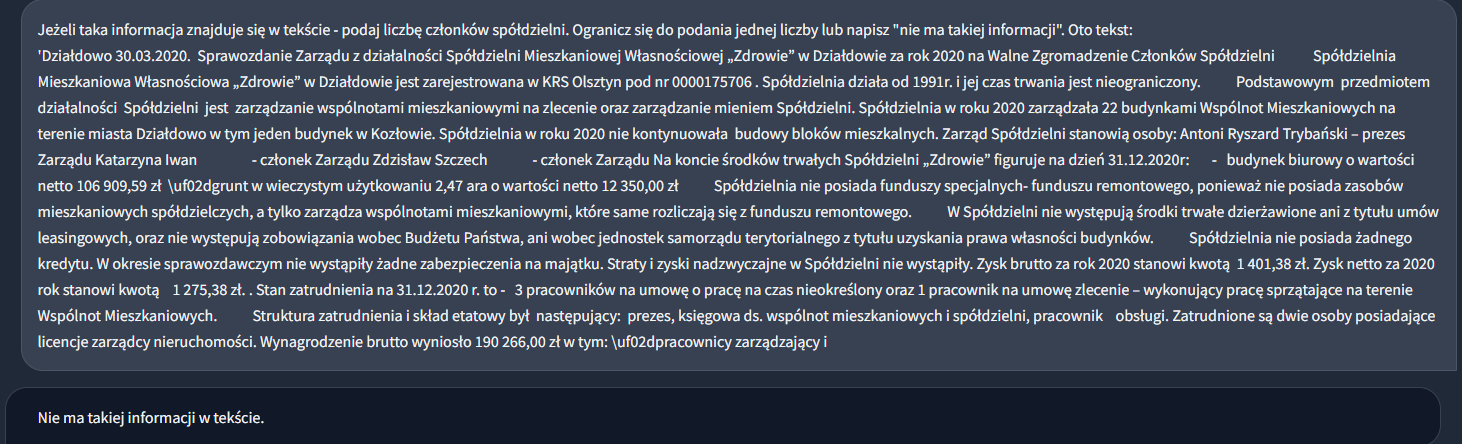